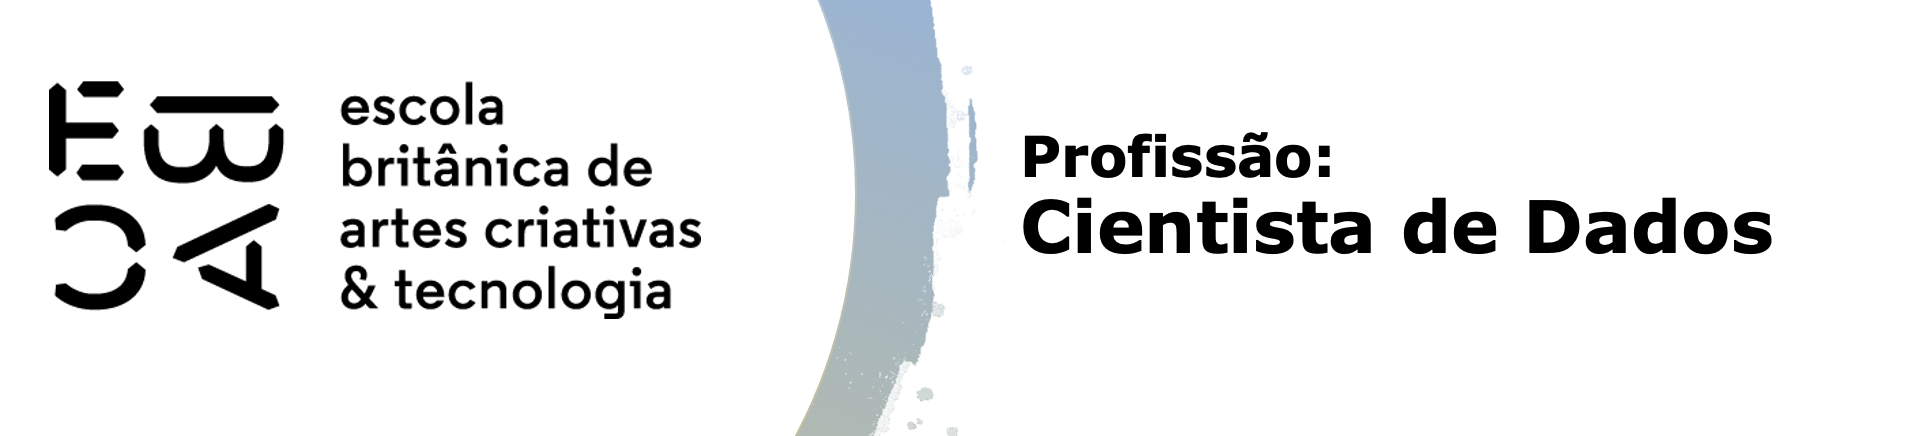

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [68]:
x_train = pd.read_csv('x_train.csv',sep=',')
x_test = pd.read_csv('x_test.csv',sep=',')
y_train = pd.read_csv('y_train.txt', sep=" ",header=None)
y_train.columns = ['atividade']
y_test = pd.read_csv('y_test.txt', sep=" ",header=None)
y_test.columns = ['atividade']

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [69]:
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(x_train, y_train)
importance = clf.feature_importances_
imp = pd.DataFrame(importance)
imp['variavel'] = x_train.columns
imp.columns = ['importancia','variavel']
var_top3 = imp.sort_values(['importancia'],ascending=False).head(3)
var_top3

,importancia,variavel
53,0.256650,tGravityAcc-min()-X
272,0.215349,fBodyAcc-mad()-X
560,0.141274,"angle(Y,gravityMean)"


In [70]:
x_treino = x_train[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]
x_teste = x_test[['tGravityAcc-min()-X','fBodyAcc-mad()-X','angle(Y,gravityMean)']]

In [71]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(x_treino, y_train)
ccp_alphas = caminho.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [73]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(x_treino, y_train) 

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
[CV 1/10; 1/256] START ccp_alpha=0.0............................................
[CV 1/10; 1/256] END .............ccp_alpha=0.0;, score=0.719 total time=   0.0s
[CV 2/10; 1/256] START ccp_alpha=0.0............................................
[CV 2/10; 1/256] END .............ccp_alpha=0.0;, score=0.736 total time=   0.0s
[CV 3/10; 1/256] START ccp_alpha=0.0............................................
[CV 3/10; 1/256] END .............ccp_alpha=0.0;, score=0.833 total time=   0.0s
[CV 4/10; 1/256] START ccp_alpha=0.0............................................
[CV 4/10; 1/256] END .............ccp_alpha=0.0;, score=0.727 total time=   0.0s
[CV 5/10; 1/256] START ccp_alpha=0.0............................................
[CV 5/10; 1/256] END .............ccp_alpha=0.0;, score=0.770 total time=   0.0s
[CV 6/10; 1/256] START ccp_alpha=0.0............................................
[CV 6/10; 1/256] END .............ccp_alpha=

[CV 10/10; 6/256] END ccp_alpha=0.00011658635162443653;, score=0.784 total time=   0.0s
[CV 1/10; 7/256] START ccp_alpha=0.00011746958156098525.........................
[CV 1/10; 7/256] END ccp_alpha=0.00011746958156098525;, score=0.719 total time=   0.0s
[CV 2/10; 7/256] START ccp_alpha=0.00011746958156098525.........................
[CV 2/10; 7/256] END ccp_alpha=0.00011746958156098525;, score=0.736 total time=   0.0s
[CV 3/10; 7/256] START ccp_alpha=0.00011746958156098525.........................
[CV 3/10; 7/256] END ccp_alpha=0.00011746958156098525;, score=0.833 total time=   0.0s
[CV 4/10; 7/256] START ccp_alpha=0.00011746958156098525.........................
[CV 4/10; 7/256] END ccp_alpha=0.00011746958156098525;, score=0.732 total time=   0.0s
[CV 5/10; 7/256] START ccp_alpha=0.00011746958156098525.........................
[CV 5/10; 7/256] END ccp_alpha=0.00011746958156098525;, score=0.770 total time=   0.0s
[CV 6/10; 7/256] START ccp_alpha=0.00011746958156098525.................

[CV 7/10; 12/256] END ccp_alpha=0.00012169978809919247;, score=0.780 total time=   0.0s
[CV 8/10; 12/256] START ccp_alpha=0.00012169978809919247........................
[CV 8/10; 12/256] END ccp_alpha=0.00012169978809919247;, score=0.736 total time=   0.0s
[CV 9/10; 12/256] START ccp_alpha=0.00012169978809919247........................
[CV 9/10; 12/256] END ccp_alpha=0.00012169978809919247;, score=0.846 total time=   0.0s
[CV 10/10; 12/256] START ccp_alpha=0.00012169978809919247.......................
[CV 10/10; 12/256] END ccp_alpha=0.00012169978809919247;, score=0.784 total time=   0.0s
[CV 1/10; 13/256] START ccp_alpha=0.00012241566920565835........................
[CV 1/10; 13/256] END ccp_alpha=0.00012241566920565835;, score=0.719 total time=   0.0s
[CV 2/10; 13/256] START ccp_alpha=0.00012241566920565835........................
[CV 2/10; 13/256] END ccp_alpha=0.00012241566920565835;, score=0.736 total time=   0.0s
[CV 3/10; 13/256] START ccp_alpha=0.00012241566920565835..........

[CV 7/10; 17/256] END ccp_alpha=0.0001263018809264729;, score=0.780 total time=   0.0s
[CV 8/10; 17/256] START ccp_alpha=0.0001263018809264729.........................
[CV 8/10; 17/256] END ccp_alpha=0.0001263018809264729;, score=0.736 total time=   0.0s
[CV 9/10; 17/256] START ccp_alpha=0.0001263018809264729.........................
[CV 9/10; 17/256] END ccp_alpha=0.0001263018809264729;, score=0.846 total time=   0.0s
[CV 10/10; 17/256] START ccp_alpha=0.0001263018809264729........................
[CV 10/10; 17/256] END ccp_alpha=0.0001263018809264729;, score=0.784 total time=   0.0s
[CV 1/10; 18/256] START ccp_alpha=0.00012674349589474724........................
[CV 1/10; 18/256] END ccp_alpha=0.00012674349589474724;, score=0.719 total time=   0.0s
[CV 2/10; 18/256] START ccp_alpha=0.00012674349589474724........................
[CV 2/10; 18/256] END ccp_alpha=0.00012674349589474724;, score=0.736 total time=   0.0s
[CV 3/10; 18/256] START ccp_alpha=0.00012674349589474724..............

[CV 6/10; 22/256] END ccp_alpha=0.00012885859916385094;, score=0.770 total time=   0.0s
[CV 7/10; 22/256] START ccp_alpha=0.00012885859916385094........................
[CV 7/10; 22/256] END ccp_alpha=0.00012885859916385094;, score=0.780 total time=   0.0s
[CV 8/10; 22/256] START ccp_alpha=0.00012885859916385094........................
[CV 8/10; 22/256] END ccp_alpha=0.00012885859916385094;, score=0.736 total time=   0.0s
[CV 9/10; 22/256] START ccp_alpha=0.00012885859916385094........................
[CV 9/10; 22/256] END ccp_alpha=0.00012885859916385094;, score=0.846 total time=   0.0s
[CV 10/10; 22/256] START ccp_alpha=0.00012885859916385094.......................
[CV 10/10; 22/256] END ccp_alpha=0.00012885859916385094;, score=0.784 total time=   0.0s
[CV 1/10; 23/256] START ccp_alpha=0.00012983480067266798........................
[CV 1/10; 23/256] END ccp_alpha=0.00012983480067266798;, score=0.719 total time=   0.0s
[CV 2/10; 23/256] START ccp_alpha=0.00012983480067266798..........

[CV 5/10; 27/256] END ccp_alpha=0.00013047823967621714;, score=0.770 total time=   0.0s
[CV 6/10; 27/256] START ccp_alpha=0.00013047823967621714........................
[CV 6/10; 27/256] END ccp_alpha=0.00013047823967621714;, score=0.770 total time=   0.0s
[CV 7/10; 27/256] START ccp_alpha=0.00013047823967621714........................
[CV 7/10; 27/256] END ccp_alpha=0.00013047823967621714;, score=0.780 total time=   0.0s
[CV 8/10; 27/256] START ccp_alpha=0.00013047823967621714........................
[CV 8/10; 27/256] END ccp_alpha=0.00013047823967621714;, score=0.736 total time=   0.0s
[CV 9/10; 27/256] START ccp_alpha=0.00013047823967621714........................
[CV 9/10; 27/256] END ccp_alpha=0.00013047823967621714;, score=0.846 total time=   0.0s
[CV 10/10; 27/256] START ccp_alpha=0.00013047823967621714.......................
[CV 10/10; 27/256] END ccp_alpha=0.00013047823967621714;, score=0.784 total time=   0.0s
[CV 1/10; 28/256] START ccp_alpha=0.00013057671381936885..........

[CV 4/10; 33/256] END ccp_alpha=0.00013201689816296484;, score=0.732 total time=   0.0s
[CV 5/10; 33/256] START ccp_alpha=0.00013201689816296484........................
[CV 5/10; 33/256] END ccp_alpha=0.00013201689816296484;, score=0.770 total time=   0.0s
[CV 6/10; 33/256] START ccp_alpha=0.00013201689816296484........................
[CV 6/10; 33/256] END ccp_alpha=0.00013201689816296484;, score=0.770 total time=   0.0s
[CV 7/10; 33/256] START ccp_alpha=0.00013201689816296484........................
[CV 7/10; 33/256] END ccp_alpha=0.00013201689816296484;, score=0.780 total time=   0.0s
[CV 8/10; 33/256] START ccp_alpha=0.00013201689816296484........................
[CV 8/10; 33/256] END ccp_alpha=0.00013201689816296484;, score=0.736 total time=   0.0s
[CV 9/10; 33/256] START ccp_alpha=0.00013201689816296484........................
[CV 9/10; 33/256] END ccp_alpha=0.00013201689816296484;, score=0.846 total time=   0.0s
[CV 10/10; 33/256] START ccp_alpha=0.00013201689816296484..........

[CV 4/10; 39/256] END ccp_alpha=0.0001337504533913675;, score=0.732 total time=   0.0s
[CV 5/10; 39/256] START ccp_alpha=0.0001337504533913675.........................
[CV 5/10; 39/256] END ccp_alpha=0.0001337504533913675;, score=0.770 total time=   0.0s
[CV 6/10; 39/256] START ccp_alpha=0.0001337504533913675.........................
[CV 6/10; 39/256] END ccp_alpha=0.0001337504533913675;, score=0.770 total time=   0.0s
[CV 7/10; 39/256] START ccp_alpha=0.0001337504533913675.........................
[CV 7/10; 39/256] END ccp_alpha=0.0001337504533913675;, score=0.780 total time=   0.0s
[CV 8/10; 39/256] START ccp_alpha=0.0001337504533913675.........................
[CV 8/10; 39/256] END ccp_alpha=0.0001337504533913675;, score=0.736 total time=   0.0s
[CV 9/10; 39/256] START ccp_alpha=0.0001337504533913675.........................
[CV 9/10; 39/256] END ccp_alpha=0.0001337504533913675;, score=0.846 total time=   0.0s
[CV 10/10; 39/256] START ccp_alpha=0.0001337504533913675.................

[CV 4/10; 45/256] END ccp_alpha=0.00013531628955722882;, score=0.732 total time=   0.0s
[CV 5/10; 45/256] START ccp_alpha=0.00013531628955722882........................
[CV 5/10; 45/256] END ccp_alpha=0.00013531628955722882;, score=0.770 total time=   0.0s
[CV 6/10; 45/256] START ccp_alpha=0.00013531628955722882........................
[CV 6/10; 45/256] END ccp_alpha=0.00013531628955722882;, score=0.770 total time=   0.0s
[CV 7/10; 45/256] START ccp_alpha=0.00013531628955722882........................
[CV 7/10; 45/256] END ccp_alpha=0.00013531628955722882;, score=0.780 total time=   0.0s
[CV 8/10; 45/256] START ccp_alpha=0.00013531628955722882........................
[CV 8/10; 45/256] END ccp_alpha=0.00013531628955722882;, score=0.736 total time=   0.0s
[CV 9/10; 45/256] START ccp_alpha=0.00013531628955722882........................
[CV 9/10; 45/256] END ccp_alpha=0.00013531628955722882;, score=0.846 total time=   0.0s
[CV 10/10; 45/256] START ccp_alpha=0.00013531628955722882..........

[CV 3/10; 50/256] END ccp_alpha=0.00013921781988094473;, score=0.833 total time=   0.0s
[CV 4/10; 50/256] START ccp_alpha=0.00013921781988094473........................
[CV 4/10; 50/256] END ccp_alpha=0.00013921781988094473;, score=0.732 total time=   0.0s
[CV 5/10; 50/256] START ccp_alpha=0.00013921781988094473........................
[CV 5/10; 50/256] END ccp_alpha=0.00013921781988094473;, score=0.770 total time=   0.0s
[CV 6/10; 50/256] START ccp_alpha=0.00013921781988094473........................
[CV 6/10; 50/256] END ccp_alpha=0.00013921781988094473;, score=0.770 total time=   0.0s
[CV 7/10; 50/256] START ccp_alpha=0.00013921781988094473........................
[CV 7/10; 50/256] END ccp_alpha=0.00013921781988094473;, score=0.780 total time=   0.0s
[CV 8/10; 50/256] START ccp_alpha=0.00013921781988094473........................
[CV 8/10; 50/256] END ccp_alpha=0.00013921781988094473;, score=0.736 total time=   0.0s
[CV 9/10; 50/256] START ccp_alpha=0.00013921781988094473...........

[CV 3/10; 55/256] END ccp_alpha=0.00014810784669326565;, score=0.833 total time=   0.0s
[CV 4/10; 55/256] START ccp_alpha=0.00014810784669326565........................
[CV 4/10; 55/256] END ccp_alpha=0.00014810784669326565;, score=0.732 total time=   0.0s
[CV 5/10; 55/256] START ccp_alpha=0.00014810784669326565........................
[CV 5/10; 55/256] END ccp_alpha=0.00014810784669326565;, score=0.770 total time=   0.0s
[CV 6/10; 55/256] START ccp_alpha=0.00014810784669326565........................
[CV 6/10; 55/256] END ccp_alpha=0.00014810784669326565;, score=0.770 total time=   0.0s
[CV 7/10; 55/256] START ccp_alpha=0.00014810784669326565........................
[CV 7/10; 55/256] END ccp_alpha=0.00014810784669326565;, score=0.780 total time=   0.0s
[CV 8/10; 55/256] START ccp_alpha=0.00014810784669326565........................
[CV 8/10; 55/256] END ccp_alpha=0.00014810784669326565;, score=0.736 total time=   0.0s
[CV 9/10; 55/256] START ccp_alpha=0.00014810784669326565...........

[CV 4/10; 61/256] END ccp_alpha=0.00015868697859992747;, score=0.732 total time=   0.0s
[CV 5/10; 61/256] START ccp_alpha=0.00015868697859992747........................
[CV 5/10; 61/256] END ccp_alpha=0.00015868697859992747;, score=0.771 total time=   0.0s
[CV 6/10; 61/256] START ccp_alpha=0.00015868697859992747........................
[CV 6/10; 61/256] END ccp_alpha=0.00015868697859992747;, score=0.770 total time=   0.0s
[CV 7/10; 61/256] START ccp_alpha=0.00015868697859992747........................
[CV 7/10; 61/256] END ccp_alpha=0.00015868697859992747;, score=0.780 total time=   0.0s
[CV 8/10; 61/256] START ccp_alpha=0.00015868697859992747........................
[CV 8/10; 61/256] END ccp_alpha=0.00015868697859992747;, score=0.736 total time=   0.0s
[CV 9/10; 61/256] START ccp_alpha=0.00015868697859992747........................
[CV 9/10; 61/256] END ccp_alpha=0.00015868697859992747;, score=0.846 total time=   0.0s
[CV 10/10; 61/256] START ccp_alpha=0.00015868697859992747..........

[CV 4/10; 67/256] END ccp_alpha=0.00017002176278563657;, score=0.732 total time=   0.0s
[CV 5/10; 67/256] START ccp_alpha=0.00017002176278563657........................
[CV 5/10; 67/256] END ccp_alpha=0.00017002176278563657;, score=0.771 total time=   0.0s
[CV 6/10; 67/256] START ccp_alpha=0.00017002176278563657........................
[CV 6/10; 67/256] END ccp_alpha=0.00017002176278563657;, score=0.770 total time=   0.0s
[CV 7/10; 67/256] START ccp_alpha=0.00017002176278563657........................
[CV 7/10; 67/256] END ccp_alpha=0.00017002176278563657;, score=0.780 total time=   0.0s
[CV 8/10; 67/256] START ccp_alpha=0.00017002176278563657........................
[CV 8/10; 67/256] END ccp_alpha=0.00017002176278563657;, score=0.736 total time=   0.0s
[CV 9/10; 67/256] START ccp_alpha=0.00017002176278563657........................
[CV 9/10; 67/256] END ccp_alpha=0.00017002176278563657;, score=0.846 total time=   0.0s
[CV 10/10; 67/256] START ccp_alpha=0.00017002176278563657..........

[CV 4/10; 73/256] END ccp_alpha=0.00018135654697134566;, score=0.732 total time=   0.0s
[CV 5/10; 73/256] START ccp_alpha=0.00018135654697134566........................
[CV 5/10; 73/256] END ccp_alpha=0.00018135654697134566;, score=0.771 total time=   0.0s
[CV 6/10; 73/256] START ccp_alpha=0.00018135654697134566........................
[CV 6/10; 73/256] END ccp_alpha=0.00018135654697134566;, score=0.770 total time=   0.0s
[CV 7/10; 73/256] START ccp_alpha=0.00018135654697134566........................
[CV 7/10; 73/256] END ccp_alpha=0.00018135654697134566;, score=0.780 total time=   0.0s
[CV 8/10; 73/256] START ccp_alpha=0.00018135654697134566........................
[CV 8/10; 73/256] END ccp_alpha=0.00018135654697134566;, score=0.736 total time=   0.0s
[CV 9/10; 73/256] START ccp_alpha=0.00018135654697134566........................
[CV 9/10; 73/256] END ccp_alpha=0.00018135654697134566;, score=0.846 total time=   0.0s
[CV 10/10; 73/256] START ccp_alpha=0.00018135654697134566..........

[CV 3/10; 79/256] END ccp_alpha=0.00019042437431991298;, score=0.833 total time=   0.0s
[CV 4/10; 79/256] START ccp_alpha=0.00019042437431991298........................
[CV 4/10; 79/256] END ccp_alpha=0.00019042437431991298;, score=0.732 total time=   0.0s
[CV 5/10; 79/256] START ccp_alpha=0.00019042437431991298........................
[CV 5/10; 79/256] END ccp_alpha=0.00019042437431991298;, score=0.771 total time=   0.0s
[CV 6/10; 79/256] START ccp_alpha=0.00019042437431991298........................
[CV 6/10; 79/256] END ccp_alpha=0.00019042437431991298;, score=0.770 total time=   0.0s
[CV 7/10; 79/256] START ccp_alpha=0.00019042437431991298........................
[CV 7/10; 79/256] END ccp_alpha=0.00019042437431991298;, score=0.780 total time=   0.0s
[CV 8/10; 79/256] START ccp_alpha=0.00019042437431991298........................
[CV 8/10; 79/256] END ccp_alpha=0.00019042437431991298;, score=0.736 total time=   0.0s
[CV 9/10; 79/256] START ccp_alpha=0.00019042437431991298...........

[CV 3/10; 85/256] END ccp_alpha=0.00019819679776154209;, score=0.833 total time=   0.0s
[CV 4/10; 85/256] START ccp_alpha=0.00019819679776154209........................
[CV 4/10; 85/256] END ccp_alpha=0.00019819679776154209;, score=0.732 total time=   0.0s
[CV 5/10; 85/256] START ccp_alpha=0.00019819679776154209........................
[CV 5/10; 85/256] END ccp_alpha=0.00019819679776154209;, score=0.771 total time=   0.0s
[CV 6/10; 85/256] START ccp_alpha=0.00019819679776154209........................
[CV 6/10; 85/256] END ccp_alpha=0.00019819679776154209;, score=0.770 total time=   0.0s
[CV 7/10; 85/256] START ccp_alpha=0.00019819679776154209........................
[CV 7/10; 85/256] END ccp_alpha=0.00019819679776154209;, score=0.780 total time=   0.0s
[CV 8/10; 85/256] START ccp_alpha=0.00019819679776154209........................
[CV 8/10; 85/256] END ccp_alpha=0.00019819679776154209;, score=0.736 total time=   0.0s
[CV 9/10; 85/256] START ccp_alpha=0.00019819679776154209...........

[CV 2/10; 91/256] END ccp_alpha=0.00020802662740830819;, score=0.736 total time=   0.0s
[CV 3/10; 91/256] START ccp_alpha=0.00020802662740830819........................
[CV 3/10; 91/256] END ccp_alpha=0.00020802662740830819;, score=0.833 total time=   0.0s
[CV 4/10; 91/256] START ccp_alpha=0.00020802662740830819........................
[CV 4/10; 91/256] END ccp_alpha=0.00020802662740830819;, score=0.732 total time=   0.0s
[CV 5/10; 91/256] START ccp_alpha=0.00020802662740830819........................
[CV 5/10; 91/256] END ccp_alpha=0.00020802662740830819;, score=0.771 total time=   0.0s
[CV 6/10; 91/256] START ccp_alpha=0.00020802662740830819........................
[CV 6/10; 91/256] END ccp_alpha=0.00020802662740830819;, score=0.770 total time=   0.0s
[CV 7/10; 91/256] START ccp_alpha=0.00020802662740830819........................
[CV 7/10; 91/256] END ccp_alpha=0.00020802662740830819;, score=0.780 total time=   0.0s
[CV 8/10; 91/256] START ccp_alpha=0.00020802662740830819...........

[CV 10/10; 96/256] END ccp_alpha=0.00021762785636561476;, score=0.784 total time=   0.0s
[CV 1/10; 97/256] START ccp_alpha=0.000218923260272553..........................
[CV 1/10; 97/256] END ccp_alpha=0.000218923260272553;, score=0.727 total time=   0.0s
[CV 2/10; 97/256] START ccp_alpha=0.000218923260272553..........................
[CV 2/10; 97/256] END ccp_alpha=0.000218923260272553;, score=0.736 total time=   0.0s
[CV 3/10; 97/256] START ccp_alpha=0.000218923260272553..........................
[CV 3/10; 97/256] END ccp_alpha=0.000218923260272553;, score=0.833 total time=   0.0s
[CV 4/10; 97/256] START ccp_alpha=0.000218923260272553..........................
[CV 4/10; 97/256] END ccp_alpha=0.000218923260272553;, score=0.732 total time=   0.0s
[CV 5/10; 97/256] START ccp_alpha=0.000218923260272553..........................
[CV 5/10; 97/256] END ccp_alpha=0.000218923260272553;, score=0.771 total time=   0.0s
[CV 6/10; 97/256] START ccp_alpha=0.000218923260272553......................

[CV 10/10; 102/256] END ccp_alpha=0.0002266956837141821;, score=0.784 total time=   0.0s
[CV 1/10; 103/256] START ccp_alpha=0.0002273433856676511........................
[CV 1/10; 103/256] END ccp_alpha=0.0002273433856676511;, score=0.727 total time=   0.0s
[CV 2/10; 103/256] START ccp_alpha=0.0002273433856676511........................
[CV 2/10; 103/256] END ccp_alpha=0.0002273433856676511;, score=0.736 total time=   0.0s
[CV 3/10; 103/256] START ccp_alpha=0.0002273433856676511........................
[CV 3/10; 103/256] END ccp_alpha=0.0002273433856676511;, score=0.833 total time=   0.0s
[CV 4/10; 103/256] START ccp_alpha=0.0002273433856676511........................
[CV 4/10; 103/256] END ccp_alpha=0.0002273433856676511;, score=0.732 total time=   0.0s
[CV 5/10; 103/256] START ccp_alpha=0.0002273433856676511........................
[CV 5/10; 103/256] END ccp_alpha=0.0002273433856676511;, score=0.771 total time=   0.0s
[CV 6/10; 103/256] START ccp_alpha=0.0002273433856676511..........

[CV 10/10; 108/256] END ccp_alpha=0.00023852328460361767;, score=0.784 total time=   0.0s
[CV 1/10; 109/256] START ccp_alpha=0.0002389639207151851........................
[CV 1/10; 109/256] END ccp_alpha=0.0002389639207151851;, score=0.727 total time=   0.0s
[CV 2/10; 109/256] START ccp_alpha=0.0002389639207151851........................
[CV 2/10; 109/256] END ccp_alpha=0.0002389639207151851;, score=0.736 total time=   0.0s
[CV 3/10; 109/256] START ccp_alpha=0.0002389639207151851........................
[CV 3/10; 109/256] END ccp_alpha=0.0002389639207151851;, score=0.833 total time=   0.0s
[CV 4/10; 109/256] START ccp_alpha=0.0002389639207151851........................
[CV 4/10; 109/256] END ccp_alpha=0.0002389639207151851;, score=0.732 total time=   0.0s
[CV 5/10; 109/256] START ccp_alpha=0.0002389639207151851........................
[CV 5/10; 109/256] END ccp_alpha=0.0002389639207151851;, score=0.771 total time=   0.0s
[CV 6/10; 109/256] START ccp_alpha=0.0002389639207151851.........

[CV 10/10; 114/256] END ccp_alpha=0.00024593046899902175;, score=0.784 total time=   0.0s
[CV 1/10; 115/256] START ccp_alpha=0.0002461267423182548........................
[CV 1/10; 115/256] END ccp_alpha=0.0002461267423182548;, score=0.727 total time=   0.0s
[CV 2/10; 115/256] START ccp_alpha=0.0002461267423182548........................
[CV 2/10; 115/256] END ccp_alpha=0.0002461267423182548;, score=0.736 total time=   0.0s
[CV 3/10; 115/256] START ccp_alpha=0.0002461267423182548........................
[CV 3/10; 115/256] END ccp_alpha=0.0002461267423182548;, score=0.833 total time=   0.0s
[CV 4/10; 115/256] START ccp_alpha=0.0002461267423182548........................
[CV 4/10; 115/256] END ccp_alpha=0.0002461267423182548;, score=0.732 total time=   0.0s
[CV 5/10; 115/256] START ccp_alpha=0.0002461267423182548........................
[CV 5/10; 115/256] END ccp_alpha=0.0002461267423182548;, score=0.771 total time=   0.0s
[CV 6/10; 115/256] START ccp_alpha=0.0002461267423182548.........

[CV 9/10; 119/256] END ccp_alpha=0.00025188409301575787;, score=0.846 total time=   0.0s
[CV 10/10; 119/256] START ccp_alpha=0.00025188409301575787......................
[CV 10/10; 119/256] END ccp_alpha=0.00025188409301575787;, score=0.784 total time=   0.0s
[CV 1/10; 120/256] START ccp_alpha=0.00025227160700501286.......................
[CV 1/10; 120/256] END ccp_alpha=0.00025227160700501286;, score=0.727 total time=   0.0s
[CV 2/10; 120/256] START ccp_alpha=0.00025227160700501286.......................
[CV 2/10; 120/256] END ccp_alpha=0.00025227160700501286;, score=0.736 total time=   0.0s
[CV 3/10; 120/256] START ccp_alpha=0.00025227160700501286.......................
[CV 3/10; 120/256] END ccp_alpha=0.00025227160700501286;, score=0.833 total time=   0.0s
[CV 4/10; 120/256] START ccp_alpha=0.00025227160700501286.......................
[CV 4/10; 120/256] END ccp_alpha=0.00025227160700501286;, score=0.732 total time=   0.0s
[CV 5/10; 120/256] START ccp_alpha=0.00025227160700501286...

[CV 8/10; 124/256] END ccp_alpha=0.00026020721956758296;, score=0.737 total time=   0.0s
[CV 9/10; 124/256] START ccp_alpha=0.00026020721956758296.......................
[CV 9/10; 124/256] END ccp_alpha=0.00026020721956758296;, score=0.846 total time=   0.0s
[CV 10/10; 124/256] START ccp_alpha=0.00026020721956758296......................
[CV 10/10; 124/256] END ccp_alpha=0.00026020721956758296;, score=0.784 total time=   0.0s
[CV 1/10; 125/256] START ccp_alpha=0.00026056855908229..........................
[CV 1/10; 125/256] END ccp_alpha=0.00026056855908229;, score=0.727 total time=   0.0s
[CV 2/10; 125/256] START ccp_alpha=0.00026056855908229..........................
[CV 2/10; 125/256] END ccp_alpha=0.00026056855908229;, score=0.736 total time=   0.0s
[CV 3/10; 125/256] START ccp_alpha=0.00026056855908229..........................
[CV 3/10; 125/256] END ccp_alpha=0.00026056855908229;, score=0.833 total time=   0.0s
[CV 4/10; 125/256] START ccp_alpha=0.00026056855908229...............

[CV 7/10; 130/256] END ccp_alpha=0.0002650278629603985;, score=0.780 total time=   0.0s
[CV 8/10; 130/256] START ccp_alpha=0.0002650278629603985........................
[CV 8/10; 130/256] END ccp_alpha=0.0002650278629603985;, score=0.737 total time=   0.0s
[CV 9/10; 130/256] START ccp_alpha=0.0002650278629603985........................
[CV 9/10; 130/256] END ccp_alpha=0.0002650278629603985;, score=0.846 total time=   0.0s
[CV 10/10; 130/256] START ccp_alpha=0.0002650278629603985.......................
[CV 10/10; 130/256] END ccp_alpha=0.0002650278629603985;, score=0.784 total time=   0.0s
[CV 1/10; 131/256] START ccp_alpha=0.000265233949945593.........................
[CV 1/10; 131/256] END ccp_alpha=0.000265233949945593;, score=0.727 total time=   0.0s
[CV 2/10; 131/256] START ccp_alpha=0.000265233949945593.........................
[CV 2/10; 131/256] END ccp_alpha=0.000265233949945593;, score=0.736 total time=   0.0s
[CV 3/10; 131/256] START ccp_alpha=0.000265233949945593.............

[CV 7/10; 136/256] END ccp_alpha=0.0002705149289412074;, score=0.780 total time=   0.0s
[CV 8/10; 136/256] START ccp_alpha=0.0002705149289412074........................
[CV 8/10; 136/256] END ccp_alpha=0.0002705149289412074;, score=0.737 total time=   0.0s
[CV 9/10; 136/256] START ccp_alpha=0.0002705149289412074........................
[CV 9/10; 136/256] END ccp_alpha=0.0002705149289412074;, score=0.846 total time=   0.0s
[CV 10/10; 136/256] START ccp_alpha=0.0002705149289412074.......................
[CV 10/10; 136/256] END ccp_alpha=0.0002705149289412074;, score=0.784 total time=   0.0s
[CV 1/10; 137/256] START ccp_alpha=0.0002706148584821053........................
[CV 1/10; 137/256] END ccp_alpha=0.0002706148584821053;, score=0.727 total time=   0.0s
[CV 2/10; 137/256] START ccp_alpha=0.0002706148584821053........................
[CV 2/10; 137/256] END ccp_alpha=0.0002706148584821053;, score=0.736 total time=   0.0s
[CV 3/10; 137/256] START ccp_alpha=0.0002706148584821053..........

[CV 7/10; 142/256] END ccp_alpha=0.0002916817797122476;, score=0.780 total time=   0.0s
[CV 8/10; 142/256] START ccp_alpha=0.0002916817797122476........................
[CV 8/10; 142/256] END ccp_alpha=0.0002916817797122476;, score=0.737 total time=   0.0s
[CV 9/10; 142/256] START ccp_alpha=0.0002916817797122476........................
[CV 9/10; 142/256] END ccp_alpha=0.0002916817797122476;, score=0.846 total time=   0.0s
[CV 10/10; 142/256] START ccp_alpha=0.0002916817797122476.......................
[CV 10/10; 142/256] END ccp_alpha=0.0002916817797122476;, score=0.784 total time=   0.0s
[CV 1/10; 143/256] START ccp_alpha=0.0002954860980826238........................
[CV 1/10; 143/256] END ccp_alpha=0.0002954860980826238;, score=0.727 total time=   0.0s
[CV 2/10; 143/256] START ccp_alpha=0.0002954860980826238........................
[CV 2/10; 143/256] END ccp_alpha=0.0002954860980826238;, score=0.735 total time=   0.0s
[CV 3/10; 143/256] START ccp_alpha=0.0002954860980826238..........

[CV 7/10; 148/256] END ccp_alpha=0.0003076086046706287;, score=0.780 total time=   0.0s
[CV 8/10; 148/256] START ccp_alpha=0.0003076086046706287........................
[CV 8/10; 148/256] END ccp_alpha=0.0003076086046706287;, score=0.737 total time=   0.0s
[CV 9/10; 148/256] START ccp_alpha=0.0003076086046706287........................
[CV 9/10; 148/256] END ccp_alpha=0.0003076086046706287;, score=0.846 total time=   0.0s
[CV 10/10; 148/256] START ccp_alpha=0.0003076086046706287.......................
[CV 10/10; 148/256] END ccp_alpha=0.0003076086046706287;, score=0.784 total time=   0.0s
[CV 1/10; 149/256] START ccp_alpha=0.000317373957199855.........................
[CV 1/10; 149/256] END ccp_alpha=0.000317373957199855;, score=0.727 total time=   0.0s
[CV 2/10; 149/256] START ccp_alpha=0.000317373957199855.........................
[CV 2/10; 149/256] END ccp_alpha=0.000317373957199855;, score=0.735 total time=   0.0s
[CV 3/10; 149/256] START ccp_alpha=0.000317373957199855.............

[CV 5/10; 154/256] END ccp_alpha=0.0003332426550598476;, score=0.771 total time=   0.0s
[CV 6/10; 154/256] START ccp_alpha=0.0003332426550598476........................
[CV 6/10; 154/256] END ccp_alpha=0.0003332426550598476;, score=0.769 total time=   0.0s
[CV 7/10; 154/256] START ccp_alpha=0.0003332426550598476........................
[CV 7/10; 154/256] END ccp_alpha=0.0003332426550598476;, score=0.780 total time=   0.0s
[CV 8/10; 154/256] START ccp_alpha=0.0003332426550598476........................
[CV 8/10; 154/256] END ccp_alpha=0.0003332426550598476;, score=0.737 total time=   0.0s
[CV 9/10; 154/256] START ccp_alpha=0.0003332426550598476........................
[CV 9/10; 154/256] END ccp_alpha=0.0003332426550598476;, score=0.846 total time=   0.0s
[CV 10/10; 154/256] START ccp_alpha=0.0003332426550598476.......................
[CV 10/10; 154/256] END ccp_alpha=0.0003332426550598476;, score=0.784 total time=   0.0s
[CV 1/10; 155/256] START ccp_alpha=0.0003380032644178455..........

[CV 2/10; 160/256] END ccp_alpha=0.0003627130939426913;, score=0.735 total time=   0.0s
[CV 3/10; 160/256] START ccp_alpha=0.0003627130939426913........................
[CV 3/10; 160/256] END ccp_alpha=0.0003627130939426913;, score=0.829 total time=   0.0s
[CV 4/10; 160/256] START ccp_alpha=0.0003627130939426913........................
[CV 4/10; 160/256] END ccp_alpha=0.0003627130939426913;, score=0.732 total time=   0.0s
[CV 5/10; 160/256] START ccp_alpha=0.0003627130939426913........................
[CV 5/10; 160/256] END ccp_alpha=0.0003627130939426913;, score=0.771 total time=   0.0s
[CV 6/10; 160/256] START ccp_alpha=0.0003627130939426913........................
[CV 6/10; 160/256] END ccp_alpha=0.0003627130939426913;, score=0.769 total time=   0.0s
[CV 7/10; 160/256] START ccp_alpha=0.0003627130939426913........................
[CV 7/10; 160/256] END ccp_alpha=0.0003627130939426913;, score=0.780 total time=   0.0s
[CV 8/10; 160/256] START ccp_alpha=0.0003627130939426913...........

[CV 8/10; 165/256] END ccp_alpha=0.0003730763251981968;, score=0.737 total time=   0.0s
[CV 9/10; 165/256] START ccp_alpha=0.0003730763251981968........................
[CV 9/10; 165/256] END ccp_alpha=0.0003730763251981968;, score=0.846 total time=   0.0s
[CV 10/10; 165/256] START ccp_alpha=0.0003730763251981968.......................
[CV 10/10; 165/256] END ccp_alpha=0.0003730763251981968;, score=0.784 total time=   0.0s
[CV 1/10; 166/256] START ccp_alpha=0.0003765999289288336........................
[CV 1/10; 166/256] END ccp_alpha=0.0003765999289288336;, score=0.727 total time=   0.0s
[CV 2/10; 166/256] START ccp_alpha=0.0003765999289288336........................
[CV 2/10; 166/256] END ccp_alpha=0.0003765999289288336;, score=0.735 total time=   0.0s
[CV 3/10; 166/256] START ccp_alpha=0.0003765999289288336........................
[CV 3/10; 166/256] END ccp_alpha=0.0003765999289288336;, score=0.829 total time=   0.0s
[CV 4/10; 166/256] START ccp_alpha=0.0003765999289288336..........

[CV 7/10; 170/256] END ccp_alpha=0.000388621172081455;, score=0.780 total time=   0.0s
[CV 8/10; 170/256] START ccp_alpha=0.000388621172081455.........................
[CV 8/10; 170/256] END ccp_alpha=0.000388621172081455;, score=0.737 total time=   0.0s
[CV 9/10; 170/256] START ccp_alpha=0.000388621172081455.........................
[CV 9/10; 170/256] END ccp_alpha=0.000388621172081455;, score=0.846 total time=   0.0s
[CV 10/10; 170/256] START ccp_alpha=0.000388621172081455........................
[CV 10/10; 170/256] END ccp_alpha=0.000388621172081455;, score=0.780 total time=   0.0s
[CV 1/10; 171/256] START ccp_alpha=0.0003898455949523968........................
[CV 1/10; 171/256] END ccp_alpha=0.0003898455949523968;, score=0.727 total time=   0.0s
[CV 2/10; 171/256] START ccp_alpha=0.0003898455949523968........................
[CV 2/10; 171/256] END ccp_alpha=0.0003898455949523968;, score=0.735 total time=   0.0s
[CV 3/10; 171/256] START ccp_alpha=0.0003898455949523968..............

[CV 7/10; 175/256] END ccp_alpha=0.00040805223068552776;, score=0.780 total time=   0.0s
[CV 8/10; 175/256] START ccp_alpha=0.00040805223068552776.......................
[CV 8/10; 175/256] END ccp_alpha=0.00040805223068552776;, score=0.737 total time=   0.0s
[CV 9/10; 175/256] START ccp_alpha=0.00040805223068552776.......................
[CV 9/10; 175/256] END ccp_alpha=0.00040805223068552776;, score=0.846 total time=   0.0s
[CV 10/10; 175/256] START ccp_alpha=0.00040805223068552776......................
[CV 10/10; 175/256] END ccp_alpha=0.00040805223068552776;, score=0.780 total time=   0.0s
[CV 1/10; 176/256] START ccp_alpha=0.0004156480081398471........................
[CV 1/10; 176/256] END ccp_alpha=0.0004156480081398471;, score=0.727 total time=   0.0s
[CV 2/10; 176/256] START ccp_alpha=0.0004156480081398471........................
[CV 2/10; 176/256] END ccp_alpha=0.0004156480081398471;, score=0.735 total time=   0.0s
[CV 3/10; 176/256] START ccp_alpha=0.0004156480081398471......

[CV 7/10; 180/256] END ccp_alpha=0.00042998231046301226;, score=0.780 total time=   0.0s
[CV 8/10; 180/256] START ccp_alpha=0.00042998231046301226.......................
[CV 8/10; 180/256] END ccp_alpha=0.00042998231046301226;, score=0.737 total time=   0.0s
[CV 9/10; 180/256] START ccp_alpha=0.00042998231046301226.......................
[CV 9/10; 180/256] END ccp_alpha=0.00042998231046301226;, score=0.846 total time=   0.0s
[CV 10/10; 180/256] START ccp_alpha=0.00042998231046301226......................
[CV 10/10; 180/256] END ccp_alpha=0.00042998231046301226;, score=0.780 total time=   0.0s
[CV 1/10; 181/256] START ccp_alpha=0.00043289228964569874.......................
[CV 1/10; 181/256] END ccp_alpha=0.00043289228964569874;, score=0.727 total time=   0.0s
[CV 2/10; 181/256] START ccp_alpha=0.00043289228964569874.......................
[CV 2/10; 181/256] END ccp_alpha=0.00043289228964569874;, score=0.735 total time=   0.0s
[CV 3/10; 181/256] START ccp_alpha=0.00043289228964569874...

[CV 6/10; 185/256] END ccp_alpha=0.00044663968396044815;, score=0.769 total time=   0.0s
[CV 7/10; 185/256] START ccp_alpha=0.00044663968396044815.......................
[CV 7/10; 185/256] END ccp_alpha=0.00044663968396044815;, score=0.758 total time=   0.0s
[CV 8/10; 185/256] START ccp_alpha=0.00044663968396044815.......................
[CV 8/10; 185/256] END ccp_alpha=0.00044663968396044815;, score=0.710 total time=   0.0s
[CV 9/10; 185/256] START ccp_alpha=0.00044663968396044815.......................
[CV 9/10; 185/256] END ccp_alpha=0.00044663968396044815;, score=0.846 total time=   0.0s
[CV 10/10; 185/256] START ccp_alpha=0.00044663968396044815......................
[CV 10/10; 185/256] END ccp_alpha=0.00044663968396044815;, score=0.778 total time=   0.0s
[CV 1/10; 186/256] START ccp_alpha=0.00047312672704392933.......................
[CV 1/10; 186/256] END ccp_alpha=0.00047312672704392933;, score=0.727 total time=   0.0s
[CV 2/10; 186/256] START ccp_alpha=0.00047312672704392933...

[CV 6/10; 191/256] END ccp_alpha=0.0005127640464963643;, score=0.769 total time=   0.0s
[CV 7/10; 191/256] START ccp_alpha=0.0005127640464963643........................
[CV 7/10; 191/256] END ccp_alpha=0.0005127640464963643;, score=0.758 total time=   0.0s
[CV 8/10; 191/256] START ccp_alpha=0.0005127640464963643........................
[CV 8/10; 191/256] END ccp_alpha=0.0005127640464963643;, score=0.710 total time=   0.0s
[CV 9/10; 191/256] START ccp_alpha=0.0005127640464963643........................
[CV 9/10; 191/256] END ccp_alpha=0.0005127640464963643;, score=0.853 total time=   0.0s
[CV 10/10; 191/256] START ccp_alpha=0.0005127640464963643.......................
[CV 10/10; 191/256] END ccp_alpha=0.0005127640464963643;, score=0.778 total time=   0.0s
[CV 1/10; 192/256] START ccp_alpha=0.0005330223261485271........................
[CV 1/10; 192/256] END ccp_alpha=0.0005330223261485271;, score=0.727 total time=   0.0s
[CV 2/10; 192/256] START ccp_alpha=0.0005330223261485271..........

[CV 5/10; 196/256] END ccp_alpha=0.0005877669111658767;, score=0.780 total time=   0.0s
[CV 6/10; 196/256] START ccp_alpha=0.0005877669111658767........................
[CV 6/10; 196/256] END ccp_alpha=0.0005877669111658767;, score=0.769 total time=   0.0s
[CV 7/10; 196/256] START ccp_alpha=0.0005877669111658767........................
[CV 7/10; 196/256] END ccp_alpha=0.0005877669111658767;, score=0.756 total time=   0.0s
[CV 8/10; 196/256] START ccp_alpha=0.0005877669111658767........................
[CV 8/10; 196/256] END ccp_alpha=0.0005877669111658767;, score=0.710 total time=   0.0s
[CV 9/10; 196/256] START ccp_alpha=0.0005877669111658767........................
[CV 9/10; 196/256] END ccp_alpha=0.0005877669111658767;, score=0.846 total time=   0.0s
[CV 10/10; 196/256] START ccp_alpha=0.0005877669111658767.......................
[CV 10/10; 196/256] END ccp_alpha=0.0005877669111658767;, score=0.778 total time=   0.0s
[CV 1/10; 197/256] START ccp_alpha=0.0005889172964997695..........

[CV 5/10; 201/256] END ccp_alpha=0.0006373171056814697;, score=0.780 total time=   0.0s
[CV 6/10; 201/256] START ccp_alpha=0.0006373171056814697........................
[CV 6/10; 201/256] END ccp_alpha=0.0006373171056814697;, score=0.769 total time=   0.0s
[CV 7/10; 201/256] START ccp_alpha=0.0006373171056814697........................
[CV 7/10; 201/256] END ccp_alpha=0.0006373171056814697;, score=0.756 total time=   0.0s
[CV 8/10; 201/256] START ccp_alpha=0.0006373171056814697........................
[CV 8/10; 201/256] END ccp_alpha=0.0006373171056814697;, score=0.710 total time=   0.0s
[CV 9/10; 201/256] START ccp_alpha=0.0006373171056814697........................
[CV 9/10; 201/256] END ccp_alpha=0.0006373171056814697;, score=0.846 total time=   0.0s
[CV 10/10; 201/256] START ccp_alpha=0.0006373171056814697.......................
[CV 10/10; 201/256] END ccp_alpha=0.0006373171056814697;, score=0.778 total time=   0.0s
[CV 1/10; 202/256] START ccp_alpha=0.0006457681447659115..........

[CV 6/10; 207/256] END ccp_alpha=0.0006896784508318784;, score=0.766 total time=   0.0s
[CV 7/10; 207/256] START ccp_alpha=0.0006896784508318784........................
[CV 7/10; 207/256] END ccp_alpha=0.0006896784508318784;, score=0.756 total time=   0.0s
[CV 8/10; 207/256] START ccp_alpha=0.0006896784508318784........................
[CV 8/10; 207/256] END ccp_alpha=0.0006896784508318784;, score=0.710 total time=   0.0s
[CV 9/10; 207/256] START ccp_alpha=0.0006896784508318784........................
[CV 9/10; 207/256] END ccp_alpha=0.0006896784508318784;, score=0.846 total time=   0.0s
[CV 10/10; 207/256] START ccp_alpha=0.0006896784508318784.......................
[CV 10/10; 207/256] END ccp_alpha=0.0006896784508318784;, score=0.778 total time=   0.0s
[CV 1/10; 208/256] START ccp_alpha=0.0006975405224755012........................
[CV 1/10; 208/256] END ccp_alpha=0.0006975405224755012;, score=0.720 total time=   0.0s
[CV 2/10; 208/256] START ccp_alpha=0.0006975405224755012..........

[CV 5/10; 212/256] END ccp_alpha=0.0007572507742529475;, score=0.797 total time=   0.0s
[CV 6/10; 212/256] START ccp_alpha=0.0007572507742529475........................
[CV 6/10; 212/256] END ccp_alpha=0.0007572507742529475;, score=0.761 total time=   0.0s
[CV 7/10; 212/256] START ccp_alpha=0.0007572507742529475........................
[CV 7/10; 212/256] END ccp_alpha=0.0007572507742529475;, score=0.755 total time=   0.0s
[CV 8/10; 212/256] START ccp_alpha=0.0007572507742529475........................
[CV 8/10; 212/256] END ccp_alpha=0.0007572507742529475;, score=0.710 total time=   0.0s
[CV 9/10; 212/256] START ccp_alpha=0.0007572507742529475........................
[CV 9/10; 212/256] END ccp_alpha=0.0007572507742529475;, score=0.846 total time=   0.0s
[CV 10/10; 212/256] START ccp_alpha=0.0007572507742529475.......................
[CV 10/10; 212/256] END ccp_alpha=0.0007572507742529475;, score=0.800 total time=   0.0s
[CV 1/10; 213/256] START ccp_alpha=0.00077724234416291............

[CV 5/10; 218/256] END ccp_alpha=0.0008717743381958881;, score=0.797 total time=   0.0s
[CV 6/10; 218/256] START ccp_alpha=0.0008717743381958881........................
[CV 6/10; 218/256] END ccp_alpha=0.0008717743381958881;, score=0.762 total time=   0.0s
[CV 7/10; 218/256] START ccp_alpha=0.0008717743381958881........................
[CV 7/10; 218/256] END ccp_alpha=0.0008717743381958881;, score=0.758 total time=   0.0s
[CV 8/10; 218/256] START ccp_alpha=0.0008717743381958881........................
[CV 8/10; 218/256] END ccp_alpha=0.0008717743381958881;, score=0.713 total time=   0.0s
[CV 9/10; 218/256] START ccp_alpha=0.0008717743381958881........................
[CV 9/10; 218/256] END ccp_alpha=0.0008717743381958881;, score=0.849 total time=   0.0s
[CV 10/10; 218/256] START ccp_alpha=0.0008717743381958881.......................
[CV 10/10; 218/256] END ccp_alpha=0.0008717743381958881;, score=0.800 total time=   0.0s
[CV 1/10; 219/256] START ccp_alpha=0.0009513025886803087..........

[CV 4/10; 223/256] END ccp_alpha=0.0010309463120738056;, score=0.777 total time=   0.0s
[CV 5/10; 223/256] START ccp_alpha=0.0010309463120738056........................
[CV 5/10; 223/256] END ccp_alpha=0.0010309463120738056;, score=0.762 total time=   0.0s
[CV 6/10; 223/256] START ccp_alpha=0.0010309463120738056........................
[CV 6/10; 223/256] END ccp_alpha=0.0010309463120738056;, score=0.785 total time=   0.0s
[CV 7/10; 223/256] START ccp_alpha=0.0010309463120738056........................
[CV 7/10; 223/256] END ccp_alpha=0.0010309463120738056;, score=0.811 total time=   0.0s
[CV 8/10; 223/256] START ccp_alpha=0.0010309463120738056........................
[CV 8/10; 223/256] END ccp_alpha=0.0010309463120738056;, score=0.697 total time=   0.0s
[CV 9/10; 223/256] START ccp_alpha=0.0010309463120738056........................
[CV 9/10; 223/256] END ccp_alpha=0.0010309463120738056;, score=0.867 total time=   0.0s
[CV 10/10; 223/256] START ccp_alpha=0.0010309463120738056..........

[CV 5/10; 229/256] END ccp_alpha=0.0012155599206741753;, score=0.741 total time=   0.0s
[CV 6/10; 229/256] START ccp_alpha=0.0012155599206741753........................
[CV 6/10; 229/256] END ccp_alpha=0.0012155599206741753;, score=0.785 total time=   0.0s
[CV 7/10; 229/256] START ccp_alpha=0.0012155599206741753........................
[CV 7/10; 229/256] END ccp_alpha=0.0012155599206741753;, score=0.810 total time=   0.0s
[CV 8/10; 229/256] START ccp_alpha=0.0012155599206741753........................
[CV 8/10; 229/256] END ccp_alpha=0.0012155599206741753;, score=0.697 total time=   0.0s
[CV 9/10; 229/256] START ccp_alpha=0.0012155599206741753........................
[CV 9/10; 229/256] END ccp_alpha=0.0012155599206741753;, score=0.850 total time=   0.0s
[CV 10/10; 229/256] START ccp_alpha=0.0012155599206741753.......................
[CV 10/10; 229/256] END ccp_alpha=0.0012155599206741753;, score=0.800 total time=   0.0s
[CV 1/10; 230/256] START ccp_alpha=0.0012615331200381275..........

[CV 5/10; 235/256] END ccp_alpha=0.0015677167485518954;, score=0.777 total time=   0.0s
[CV 6/10; 235/256] START ccp_alpha=0.0015677167485518954........................
[CV 6/10; 235/256] END ccp_alpha=0.0015677167485518954;, score=0.793 total time=   0.0s
[CV 7/10; 235/256] START ccp_alpha=0.0015677167485518954........................
[CV 7/10; 235/256] END ccp_alpha=0.0015677167485518954;, score=0.800 total time=   0.0s
[CV 8/10; 235/256] START ccp_alpha=0.0015677167485518954........................
[CV 8/10; 235/256] END ccp_alpha=0.0015677167485518954;, score=0.725 total time=   0.0s
[CV 9/10; 235/256] START ccp_alpha=0.0015677167485518954........................
[CV 9/10; 235/256] END ccp_alpha=0.0015677167485518954;, score=0.849 total time=   0.0s
[CV 10/10; 235/256] START ccp_alpha=0.0015677167485518954.......................
[CV 10/10; 235/256] END ccp_alpha=0.0015677167485518954;, score=0.797 total time=   0.0s
[CV 1/10; 236/256] START ccp_alpha=0.0018346230484412637..........

[CV 6/10; 240/256] END ccp_alpha=0.0021638598375210445;, score=0.815 total time=   0.0s
[CV 7/10; 240/256] START ccp_alpha=0.0021638598375210445........................
[CV 7/10; 240/256] END ccp_alpha=0.0021638598375210445;, score=0.826 total time=   0.0s
[CV 8/10; 240/256] START ccp_alpha=0.0021638598375210445........................
[CV 8/10; 240/256] END ccp_alpha=0.0021638598375210445;, score=0.725 total time=   0.0s
[CV 9/10; 240/256] START ccp_alpha=0.0021638598375210445........................
[CV 9/10; 240/256] END ccp_alpha=0.0021638598375210445;, score=0.873 total time=   0.0s
[CV 10/10; 240/256] START ccp_alpha=0.0021638598375210445.......................
[CV 10/10; 240/256] END ccp_alpha=0.0021638598375210445;, score=0.784 total time=   0.0s
[CV 1/10; 241/256] START ccp_alpha=0.002402507076620576.........................
[CV 1/10; 241/256] END ccp_alpha=0.002402507076620576;, score=0.827 total time=   0.0s
[CV 2/10; 241/256] START ccp_alpha=0.002402507076620576............

[CV 4/10; 246/256] END ccp_alpha=0.004293491095007443;, score=0.792 total time=   0.0s
[CV 5/10; 246/256] START ccp_alpha=0.004293491095007443.........................
[CV 5/10; 246/256] END ccp_alpha=0.004293491095007443;, score=0.771 total time=   0.0s
[CV 6/10; 246/256] START ccp_alpha=0.004293491095007443.........................
[CV 6/10; 246/256] END ccp_alpha=0.004293491095007443;, score=0.800 total time=   0.0s
[CV 7/10; 246/256] START ccp_alpha=0.004293491095007443.........................
[CV 7/10; 246/256] END ccp_alpha=0.004293491095007443;, score=0.850 total time=   0.0s
[CV 8/10; 246/256] START ccp_alpha=0.004293491095007443.........................
[CV 8/10; 246/256] END ccp_alpha=0.004293491095007443;, score=0.785 total time=   0.0s
[CV 9/10; 246/256] START ccp_alpha=0.004293491095007443.........................
[CV 9/10; 246/256] END ccp_alpha=0.004293491095007443;, score=0.871 total time=   0.0s
[CV 10/10; 246/256] START ccp_alpha=0.004293491095007443.................

[CV 2/10; 252/256] END ccp_alpha=0.04349250995260323;, score=0.783 total time=   0.0s
[CV 3/10; 252/256] START ccp_alpha=0.04349250995260323..........................
[CV 3/10; 252/256] END ccp_alpha=0.04349250995260323;, score=0.799 total time=   0.0s
[CV 4/10; 252/256] START ccp_alpha=0.04349250995260323..........................
[CV 4/10; 252/256] END ccp_alpha=0.04349250995260323;, score=0.781 total time=   0.0s
[CV 5/10; 252/256] START ccp_alpha=0.04349250995260323..........................
[CV 5/10; 252/256] END ccp_alpha=0.04349250995260323;, score=0.778 total time=   0.0s
[CV 6/10; 252/256] START ccp_alpha=0.04349250995260323..........................
[CV 6/10; 252/256] END ccp_alpha=0.04349250995260323;, score=0.833 total time=   0.0s
[CV 7/10; 252/256] START ccp_alpha=0.04349250995260323..........................
[CV 7/10; 252/256] END ccp_alpha=0.04349250995260323;, score=0.789 total time=   0.0s
[CV 8/10; 252/256] START ccp_alpha=0.04349250995260323.........................

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 9.06782735e-05, 1.02013058e-04, 1.08813928e-04,
       1.13347842e-04, 1.16586352e-04, 1.17469582e-04, 1.18205607e-04,
       1.19015234e-04, 1.20904365e-04, 1.20904365e-04, 1.21699788e-04,
       1.22415669e-04, 1.23652191e-04, 1.24682626e-04,...
       1.48212491e-03, 1.48587311e-03, 1.56771675e-03, 1.83462305e-03,
       1.99129489e-03, 2.03039989e-03, 2.12674961e-03, 2.16385984e-03,
       2.40250708e-03, 2.65096886e-03, 2.86310890e-03, 2.95825234e-03,
       3.77456884e-03, 4.29349110e-03, 4.58876943e-03, 4.87217736e-03,
       6.88407984e-03, 6.98899314e-03, 9.39406838e-03, 4.34925100e-02,
       7.62205989e-02, 1.09363718e-01, 1.67257720e-01, 1.86138242e-01])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [74]:
melhor_ccp = pd.DataFrame(grid.cv_results_).iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(x_treino, y_train)

clf.score(x_teste, y_test)

0.7322701051917204

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


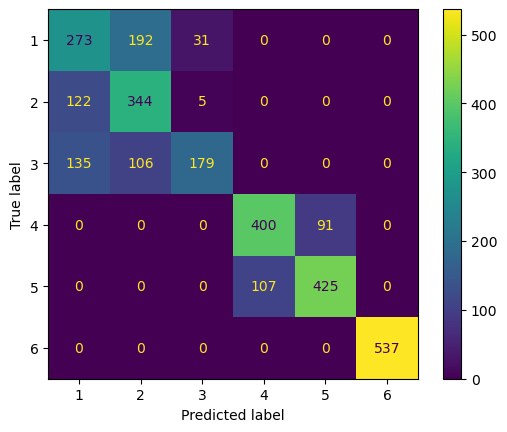

In [75]:
plot_confusion_matrix(clf, x_teste, y_test);

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [76]:
y_treino = [1 if x == 2 else 0 for x in y_train['atividade']]

In [77]:
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(x_train, y_treino)

In [78]:
importance = clf.feature_importances_
imp = pd.DataFrame(importance)
imp['variavel'] = x_train.columns
imp.columns = ['importancia','variavel']
var_top3 = imp.sort_values(['importancia'],ascending=False).head(3)
var_top3

,importancia,variavel
74,0.336007,"tGravityAcc-arCoeff()-Z,1"
331,0.308570,"fBodyAcc-bandsEnergy()-1,8.2"
124,0.066966,tBodyGyro-std()-X


In [79]:
x_treino = x_train[['tGravityAcc-arCoeff()-Z,1','fBodyAcc-bandsEnergy()-1,8.2','tBodyGyro-std()-X']]
x_teste = x_test[['tGravityAcc-arCoeff()-Z,1','fBodyAcc-bandsEnergy()-1,8.2','tBodyGyro-std()-X']]

In [80]:
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(x_train, y_train)

In [81]:
caminho = DecisionTreeClassifier(random_state=2360873).cost_complexity_pruning_path(x_treino, y_train)
ccp_alphas = caminho.ccp_alphas
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [82]:
len(ccp_alphas)

611

In [83]:
%%time
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(x_treino, y_train) 

Fitting 10 folds for each of 611 candidates, totalling 6110 fits
[CV 1/10; 1/611] START ccp_alpha=0.0............................................
[CV 1/10; 1/611] END .............ccp_alpha=0.0;, score=0.549 total time=   0.0s
[CV 2/10; 1/611] START ccp_alpha=0.0............................................
[CV 2/10; 1/611] END .............ccp_alpha=0.0;, score=0.457 total time=   0.0s
[CV 3/10; 1/611] START ccp_alpha=0.0............................................
[CV 3/10; 1/611] END .............ccp_alpha=0.0;, score=0.507 total time=   0.0s
[CV 4/10; 1/611] START ccp_alpha=0.0............................................
[CV 4/10; 1/611] END .............ccp_alpha=0.0;, score=0.514 total time=   0.0s
[CV 5/10; 1/611] START ccp_alpha=0.0............................................
[CV 5/10; 1/611] END .............ccp_alpha=0.0;, score=0.552 total time=   0.0s
[CV 6/10; 1/611] START ccp_alpha=0.0............................................
[CV 6/10; 1/611] END .............ccp_alpha=

[CV 10/10; 5/611] END ccp_alpha=0.00010881392818280738;, score=0.608 total time=   0.0s
[CV 1/10; 6/611] START ccp_alpha=0.00010881392818280739.........................
[CV 1/10; 6/611] END ccp_alpha=0.00010881392818280739;, score=0.557 total time=   0.0s
[CV 2/10; 6/611] START ccp_alpha=0.00010881392818280739.........................
[CV 2/10; 6/611] END ccp_alpha=0.00010881392818280739;, score=0.454 total time=   0.0s
[CV 3/10; 6/611] START ccp_alpha=0.00010881392818280739.........................
[CV 3/10; 6/611] END ccp_alpha=0.00010881392818280739;, score=0.510 total time=   0.0s
[CV 4/10; 6/611] START ccp_alpha=0.00010881392818280739.........................
[CV 4/10; 6/611] END ccp_alpha=0.00010881392818280739;, score=0.518 total time=   0.0s
[CV 5/10; 6/611] START ccp_alpha=0.00010881392818280739.........................
[CV 5/10; 6/611] END ccp_alpha=0.00010881392818280739;, score=0.561 total time=   0.0s
[CV 6/10; 6/611] START ccp_alpha=0.00010881392818280739.................

[CV 9/10; 10/611] END ccp_alpha=0.00011403479847440676;, score=0.603 total time=   0.0s
[CV 10/10; 10/611] START ccp_alpha=0.00011403479847440676.......................
[CV 10/10; 10/611] END ccp_alpha=0.00011403479847440676;, score=0.608 total time=   0.0s
[CV 1/10; 11/611] START ccp_alpha=0.00011561479869423284........................
[CV 1/10; 11/611] END ccp_alpha=0.00011561479869423284;, score=0.557 total time=   0.0s
[CV 2/10; 11/611] START ccp_alpha=0.00011561479869423284........................
[CV 2/10; 11/611] END ccp_alpha=0.00011561479869423284;, score=0.454 total time=   0.0s
[CV 3/10; 11/611] START ccp_alpha=0.00011561479869423284........................
[CV 3/10; 11/611] END ccp_alpha=0.00011561479869423284;, score=0.510 total time=   0.0s
[CV 4/10; 11/611] START ccp_alpha=0.00011561479869423284........................
[CV 4/10; 11/611] END ccp_alpha=0.00011561479869423284;, score=0.518 total time=   0.0s
[CV 5/10; 11/611] START ccp_alpha=0.00011561479869423284..........

[CV 6/10; 16/611] END ccp_alpha=0.00011827600889435584;, score=0.493 total time=   0.0s
[CV 7/10; 16/611] START ccp_alpha=0.00011827600889435584........................
[CV 7/10; 16/611] END ccp_alpha=0.00011827600889435584;, score=0.570 total time=   0.0s
[CV 8/10; 16/611] START ccp_alpha=0.00011827600889435584........................
[CV 8/10; 16/611] END ccp_alpha=0.00011827600889435584;, score=0.624 total time=   0.0s
[CV 9/10; 16/611] START ccp_alpha=0.00011827600889435584........................
[CV 9/10; 16/611] END ccp_alpha=0.00011827600889435584;, score=0.603 total time=   0.0s
[CV 10/10; 16/611] START ccp_alpha=0.00011827600889435584.......................
[CV 10/10; 16/611] END ccp_alpha=0.00011827600889435584;, score=0.608 total time=   0.0s
[CV 1/10; 17/611] START ccp_alpha=0.00011851256091214462........................
[CV 1/10; 17/611] END ccp_alpha=0.00011851256091214462;, score=0.557 total time=   0.0s
[CV 2/10; 17/611] START ccp_alpha=0.00011851256091214462..........

[CV 4/10; 22/611] END ccp_alpha=0.00012145836191959251;, score=0.516 total time=   0.0s
[CV 5/10; 22/611] START ccp_alpha=0.00012145836191959251........................
[CV 5/10; 22/611] END ccp_alpha=0.00012145836191959251;, score=0.561 total time=   0.0s
[CV 6/10; 22/611] START ccp_alpha=0.00012145836191959251........................
[CV 6/10; 22/611] END ccp_alpha=0.00012145836191959251;, score=0.495 total time=   0.0s
[CV 7/10; 22/611] START ccp_alpha=0.00012145836191959251........................
[CV 7/10; 22/611] END ccp_alpha=0.00012145836191959251;, score=0.566 total time=   0.0s
[CV 8/10; 22/611] START ccp_alpha=0.00012145836191959251........................
[CV 8/10; 22/611] END ccp_alpha=0.00012145836191959251;, score=0.624 total time=   0.0s
[CV 9/10; 22/611] START ccp_alpha=0.00012145836191959251........................
[CV 9/10; 22/611] END ccp_alpha=0.00012145836191959251;, score=0.603 total time=   0.0s
[CV 10/10; 22/611] START ccp_alpha=0.00012145836191959251..........

[CV 1/10; 28/611] END ccp_alpha=0.00012418980933907365;, score=0.556 total time=   0.0s
[CV 2/10; 28/611] START ccp_alpha=0.00012418980933907365........................
[CV 2/10; 28/611] END ccp_alpha=0.00012418980933907365;, score=0.454 total time=   0.0s
[CV 3/10; 28/611] START ccp_alpha=0.00012418980933907365........................
[CV 3/10; 28/611] END ccp_alpha=0.00012418980933907365;, score=0.516 total time=   0.0s
[CV 4/10; 28/611] START ccp_alpha=0.00012418980933907365........................
[CV 4/10; 28/611] END ccp_alpha=0.00012418980933907365;, score=0.516 total time=   0.0s
[CV 5/10; 28/611] START ccp_alpha=0.00012418980933907365........................
[CV 5/10; 28/611] END ccp_alpha=0.00012418980933907365;, score=0.561 total time=   0.0s
[CV 6/10; 28/611] START ccp_alpha=0.00012418980933907365........................
[CV 6/10; 28/611] END ccp_alpha=0.00012418980933907365;, score=0.495 total time=   0.0s
[CV 7/10; 28/611] START ccp_alpha=0.00012418980933907365...........

[CV 1/10; 33/611] END ccp_alpha=0.00012555453251862387;, score=0.556 total time=   0.0s
[CV 2/10; 33/611] START ccp_alpha=0.00012555453251862387........................
[CV 2/10; 33/611] END ccp_alpha=0.00012555453251862387;, score=0.454 total time=   0.0s
[CV 3/10; 33/611] START ccp_alpha=0.00012555453251862387........................
[CV 3/10; 33/611] END ccp_alpha=0.00012555453251862387;, score=0.516 total time=   0.0s
[CV 4/10; 33/611] START ccp_alpha=0.00012555453251862387........................
[CV 4/10; 33/611] END ccp_alpha=0.00012555453251862387;, score=0.516 total time=   0.0s
[CV 5/10; 33/611] START ccp_alpha=0.00012555453251862387........................
[CV 5/10; 33/611] END ccp_alpha=0.00012555453251862387;, score=0.561 total time=   0.0s
[CV 6/10; 33/611] START ccp_alpha=0.00012555453251862387........................
[CV 6/10; 33/611] END ccp_alpha=0.00012555453251862387;, score=0.495 total time=   0.0s
[CV 7/10; 33/611] START ccp_alpha=0.00012555453251862387...........

[CV 10/10; 37/611] END ccp_alpha=0.00012674349589474724;, score=0.608 total time=   0.0s
[CV 1/10; 38/611] START ccp_alpha=0.000126949582879942..........................
[CV 1/10; 38/611] END ccp_alpha=0.000126949582879942;, score=0.556 total time=   0.0s
[CV 2/10; 38/611] START ccp_alpha=0.000126949582879942..........................
[CV 2/10; 38/611] END ccp_alpha=0.000126949582879942;, score=0.454 total time=   0.0s
[CV 3/10; 38/611] START ccp_alpha=0.000126949582879942..........................
[CV 3/10; 38/611] END ccp_alpha=0.000126949582879942;, score=0.516 total time=   0.0s
[CV 4/10; 38/611] START ccp_alpha=0.000126949582879942..........................
[CV 4/10; 38/611] END ccp_alpha=0.000126949582879942;, score=0.516 total time=   0.0s
[CV 5/10; 38/611] START ccp_alpha=0.000126949582879942..........................
[CV 5/10; 38/611] END ccp_alpha=0.000126949582879942;, score=0.561 total time=   0.0s
[CV 6/10; 38/611] START ccp_alpha=0.000126949582879942......................

[CV 10/10; 42/611] END ccp_alpha=0.00012885859916385094;, score=0.608 total time=   0.0s
[CV 1/10; 43/611] START ccp_alpha=0.00012921653971708375........................
[CV 1/10; 43/611] END ccp_alpha=0.00012921653971708375;, score=0.556 total time=   0.0s
[CV 2/10; 43/611] START ccp_alpha=0.00012921653971708375........................
[CV 2/10; 43/611] END ccp_alpha=0.00012921653971708375;, score=0.454 total time=   0.0s
[CV 3/10; 43/611] START ccp_alpha=0.00012921653971708375........................
[CV 3/10; 43/611] END ccp_alpha=0.00012921653971708375;, score=0.516 total time=   0.0s
[CV 4/10; 43/611] START ccp_alpha=0.00012921653971708375........................
[CV 4/10; 43/611] END ccp_alpha=0.00012921653971708375;, score=0.516 total time=   0.0s
[CV 5/10; 43/611] START ccp_alpha=0.00012921653971708375........................
[CV 5/10; 43/611] END ccp_alpha=0.00012921653971708375;, score=0.561 total time=   0.0s
[CV 6/10; 43/611] START ccp_alpha=0.00012921653971708375..........

[CV 10/10; 47/611] END ccp_alpha=0.00012983480067266798;, score=0.608 total time=   0.0s
[CV 1/10; 48/611] START ccp_alpha=0.00013035001813565479........................
[CV 1/10; 48/611] END ccp_alpha=0.00013035001813565479;, score=0.556 total time=   0.0s
[CV 2/10; 48/611] START ccp_alpha=0.00013035001813565479........................
[CV 2/10; 48/611] END ccp_alpha=0.00013035001813565479;, score=0.454 total time=   0.0s
[CV 3/10; 48/611] START ccp_alpha=0.00013035001813565479........................
[CV 3/10; 48/611] END ccp_alpha=0.00013035001813565479;, score=0.516 total time=   0.0s
[CV 4/10; 48/611] START ccp_alpha=0.00013035001813565479........................
[CV 4/10; 48/611] END ccp_alpha=0.00013035001813565479;, score=0.516 total time=   0.0s
[CV 5/10; 48/611] START ccp_alpha=0.00013035001813565479........................
[CV 5/10; 48/611] END ccp_alpha=0.00013035001813565479;, score=0.561 total time=   0.0s
[CV 6/10; 48/611] START ccp_alpha=0.00013035001813565479..........

[CV 9/10; 52/611] END ccp_alpha=0.00013189567052461495;, score=0.603 total time=   0.0s
[CV 10/10; 52/611] START ccp_alpha=0.00013189567052461495.......................
[CV 10/10; 52/611] END ccp_alpha=0.00013189567052461495;, score=0.608 total time=   0.0s
[CV 1/10; 53/611] START ccp_alpha=0.0001321311985076947.........................
[CV 1/10; 53/611] END ccp_alpha=0.0001321311985076947;, score=0.556 total time=   0.0s
[CV 2/10; 53/611] START ccp_alpha=0.0001321311985076947.........................
[CV 2/10; 53/611] END ccp_alpha=0.0001321311985076947;, score=0.454 total time=   0.0s
[CV 3/10; 53/611] START ccp_alpha=0.0001321311985076947.........................
[CV 3/10; 53/611] END ccp_alpha=0.0001321311985076947;, score=0.516 total time=   0.0s
[CV 4/10; 53/611] START ccp_alpha=0.0001321311985076947.........................
[CV 4/10; 53/611] END ccp_alpha=0.0001321311985076947;, score=0.516 total time=   0.0s
[CV 5/10; 53/611] START ccp_alpha=0.0001321311985076947...............

[CV 6/10; 58/611] END ccp_alpha=0.00013306051000615024;, score=0.497 total time=   0.0s
[CV 7/10; 58/611] START ccp_alpha=0.00013306051000615024........................
[CV 7/10; 58/611] END ccp_alpha=0.00013306051000615024;, score=0.569 total time=   0.0s
[CV 8/10; 58/611] START ccp_alpha=0.00013306051000615024........................
[CV 8/10; 58/611] END ccp_alpha=0.00013306051000615024;, score=0.623 total time=   0.0s
[CV 9/10; 58/611] START ccp_alpha=0.00013306051000615024........................
[CV 9/10; 58/611] END ccp_alpha=0.00013306051000615024;, score=0.603 total time=   0.0s
[CV 10/10; 58/611] START ccp_alpha=0.00013306051000615024.......................
[CV 10/10; 58/611] END ccp_alpha=0.00013306051000615024;, score=0.608 total time=   0.0s
[CV 1/10; 59/611] START ccp_alpha=0.00013437864624985234........................
[CV 1/10; 59/611] END ccp_alpha=0.00013437864624985234;, score=0.556 total time=   0.0s
[CV 2/10; 59/611] START ccp_alpha=0.00013437864624985234..........

[CV 2/10; 64/611] END ccp_alpha=0.00013542859027081085;, score=0.454 total time=   0.0s
[CV 3/10; 64/611] START ccp_alpha=0.00013542859027081085........................
[CV 3/10; 64/611] END ccp_alpha=0.00013542859027081085;, score=0.516 total time=   0.0s
[CV 4/10; 64/611] START ccp_alpha=0.00013542859027081085........................
[CV 4/10; 64/611] END ccp_alpha=0.00013542859027081085;, score=0.516 total time=   0.0s
[CV 5/10; 64/611] START ccp_alpha=0.00013542859027081085........................
[CV 5/10; 64/611] END ccp_alpha=0.00013542859027081085;, score=0.561 total time=   0.0s
[CV 6/10; 64/611] START ccp_alpha=0.00013542859027081085........................
[CV 6/10; 64/611] END ccp_alpha=0.00013542859027081085;, score=0.497 total time=   0.0s
[CV 7/10; 64/611] START ccp_alpha=0.00013542859027081085........................
[CV 7/10; 64/611] END ccp_alpha=0.00013542859027081085;, score=0.569 total time=   0.0s
[CV 8/10; 64/611] START ccp_alpha=0.00013542859027081085...........

[CV 2/10; 69/611] END ccp_alpha=0.00013954466824434258;, score=0.454 total time=   0.0s
[CV 3/10; 69/611] START ccp_alpha=0.00013954466824434258........................
[CV 3/10; 69/611] END ccp_alpha=0.00013954466824434258;, score=0.510 total time=   0.0s
[CV 4/10; 69/611] START ccp_alpha=0.00013954466824434258........................
[CV 4/10; 69/611] END ccp_alpha=0.00013954466824434258;, score=0.514 total time=   0.0s
[CV 5/10; 69/611] START ccp_alpha=0.00013954466824434258........................
[CV 5/10; 69/611] END ccp_alpha=0.00013954466824434258;, score=0.563 total time=   0.0s
[CV 6/10; 69/611] START ccp_alpha=0.00013954466824434258........................
[CV 6/10; 69/611] END ccp_alpha=0.00013954466824434258;, score=0.497 total time=   0.0s
[CV 7/10; 69/611] START ccp_alpha=0.00013954466824434258........................
[CV 7/10; 69/611] END ccp_alpha=0.00013954466824434258;, score=0.570 total time=   0.0s
[CV 8/10; 69/611] START ccp_alpha=0.00013954466824434258...........

[CV 10/10; 74/611] END ccp_alpha=0.0001416848023213638;, score=0.608 total time=   0.0s
[CV 1/10; 75/611] START ccp_alpha=0.00014188022963491052........................
[CV 1/10; 75/611] END ccp_alpha=0.00014188022963491052;, score=0.556 total time=   0.0s
[CV 2/10; 75/611] START ccp_alpha=0.00014188022963491052........................
[CV 2/10; 75/611] END ccp_alpha=0.00014188022963491052;, score=0.454 total time=   0.0s
[CV 3/10; 75/611] START ccp_alpha=0.00014188022963491052........................
[CV 3/10; 75/611] END ccp_alpha=0.00014188022963491052;, score=0.507 total time=   0.0s
[CV 4/10; 75/611] START ccp_alpha=0.00014188022963491052........................
[CV 4/10; 75/611] END ccp_alpha=0.00014188022963491052;, score=0.514 total time=   0.0s
[CV 5/10; 75/611] START ccp_alpha=0.00014188022963491052........................
[CV 5/10; 75/611] END ccp_alpha=0.00014188022963491052;, score=0.563 total time=   0.0s
[CV 6/10; 75/611] START ccp_alpha=0.00014188022963491052...........

[CV 10/10; 79/611] END ccp_alpha=0.00014573293953054565;, score=0.610 total time=   0.0s
[CV 1/10; 80/611] START ccp_alpha=0.0001483826293401919.........................
[CV 1/10; 80/611] END ccp_alpha=0.0001483826293401919;, score=0.556 total time=   0.0s
[CV 2/10; 80/611] START ccp_alpha=0.0001483826293401919.........................
[CV 2/10; 80/611] END ccp_alpha=0.0001483826293401919;, score=0.454 total time=   0.0s
[CV 3/10; 80/611] START ccp_alpha=0.0001483826293401919.........................
[CV 3/10; 80/611] END ccp_alpha=0.0001483826293401919;, score=0.507 total time=   0.0s
[CV 4/10; 80/611] START ccp_alpha=0.0001483826293401919.........................
[CV 4/10; 80/611] END ccp_alpha=0.0001483826293401919;, score=0.514 total time=   0.0s
[CV 5/10; 80/611] START ccp_alpha=0.0001483826293401919.........................
[CV 5/10; 80/611] END ccp_alpha=0.0001483826293401919;, score=0.558 total time=   0.0s
[CV 6/10; 80/611] START ccp_alpha=0.0001483826293401919................

[CV 9/10; 84/611] END ccp_alpha=0.00015361966331690468;, score=0.608 total time=   0.0s
[CV 10/10; 84/611] START ccp_alpha=0.00015361966331690468.......................
[CV 10/10; 84/611] END ccp_alpha=0.00015361966331690468;, score=0.610 total time=   0.0s
[CV 1/10; 85/611] START ccp_alpha=0.00015398197384359542........................
[CV 1/10; 85/611] END ccp_alpha=0.00015398197384359542;, score=0.556 total time=   0.0s
[CV 2/10; 85/611] START ccp_alpha=0.00015398197384359542........................
[CV 2/10; 85/611] END ccp_alpha=0.00015398197384359542;, score=0.454 total time=   0.0s
[CV 3/10; 85/611] START ccp_alpha=0.00015398197384359542........................
[CV 3/10; 85/611] END ccp_alpha=0.00015398197384359542;, score=0.507 total time=   0.0s
[CV 4/10; 85/611] START ccp_alpha=0.00015398197384359542........................
[CV 4/10; 85/611] END ccp_alpha=0.00015398197384359542;, score=0.516 total time=   0.0s
[CV 5/10; 85/611] START ccp_alpha=0.00015398197384359542..........

[CV 8/10; 89/611] END ccp_alpha=0.00015544846883258198;, score=0.623 total time=   0.0s
[CV 9/10; 89/611] START ccp_alpha=0.00015544846883258198........................
[CV 9/10; 89/611] END ccp_alpha=0.00015544846883258198;, score=0.608 total time=   0.0s
[CV 10/10; 89/611] START ccp_alpha=0.00015544846883258198.......................
[CV 10/10; 89/611] END ccp_alpha=0.00015544846883258198;, score=0.611 total time=   0.0s
[CV 1/10; 90/611] START ccp_alpha=0.00015544846883258203........................
[CV 1/10; 90/611] END ccp_alpha=0.00015544846883258203;, score=0.556 total time=   0.0s
[CV 2/10; 90/611] START ccp_alpha=0.00015544846883258203........................
[CV 2/10; 90/611] END ccp_alpha=0.00015544846883258203;, score=0.454 total time=   0.0s
[CV 3/10; 90/611] START ccp_alpha=0.00015544846883258203........................
[CV 3/10; 90/611] END ccp_alpha=0.00015544846883258203;, score=0.507 total time=   0.0s
[CV 4/10; 90/611] START ccp_alpha=0.00015544846883258203..........

[CV 8/10; 94/611] END ccp_alpha=0.00015803927664645835;, score=0.623 total time=   0.0s
[CV 9/10; 94/611] START ccp_alpha=0.00015803927664645835........................
[CV 9/10; 94/611] END ccp_alpha=0.00015803927664645835;, score=0.608 total time=   0.0s
[CV 10/10; 94/611] START ccp_alpha=0.00015803927664645835.......................
[CV 10/10; 94/611] END ccp_alpha=0.00015803927664645835;, score=0.611 total time=   0.0s
[CV 1/10; 95/611] START ccp_alpha=0.00015817176113694067........................
[CV 1/10; 95/611] END ccp_alpha=0.00015817176113694067;, score=0.550 total time=   0.0s
[CV 2/10; 95/611] START ccp_alpha=0.00015817176113694067........................
[CV 2/10; 95/611] END ccp_alpha=0.00015817176113694067;, score=0.454 total time=   0.0s
[CV 3/10; 95/611] START ccp_alpha=0.00015817176113694067........................
[CV 3/10; 95/611] END ccp_alpha=0.00015817176113694067;, score=0.507 total time=   0.0s
[CV 4/10; 95/611] START ccp_alpha=0.00015817176113694067..........

[CV 7/10; 99/611] END ccp_alpha=0.00015868697859992755;, score=0.563 total time=   0.0s
[CV 8/10; 99/611] START ccp_alpha=0.00015868697859992755........................
[CV 8/10; 99/611] END ccp_alpha=0.00015868697859992755;, score=0.623 total time=   0.0s
[CV 9/10; 99/611] START ccp_alpha=0.00015868697859992755........................
[CV 9/10; 99/611] END ccp_alpha=0.00015868697859992755;, score=0.608 total time=   0.0s
[CV 10/10; 99/611] START ccp_alpha=0.00015868697859992755.......................
[CV 10/10; 99/611] END ccp_alpha=0.00015868697859992755;, score=0.611 total time=   0.0s
[CV 1/10; 100/611] START ccp_alpha=0.00015884368068544425.......................
[CV 1/10; 100/611] END ccp_alpha=0.00015884368068544425;, score=0.550 total time=   0.0s
[CV 2/10; 100/611] START ccp_alpha=0.00015884368068544425.......................
[CV 2/10; 100/611] END ccp_alpha=0.00015884368068544425;, score=0.454 total time=   0.0s
[CV 3/10; 100/611] START ccp_alpha=0.00015884368068544425.......

[CV 7/10; 104/611] END ccp_alpha=0.00016074784845187444;, score=0.563 total time=   0.0s
[CV 8/10; 104/611] START ccp_alpha=0.00016074784845187444.......................
[CV 8/10; 104/611] END ccp_alpha=0.00016074784845187444;, score=0.623 total time=   0.0s
[CV 9/10; 104/611] START ccp_alpha=0.00016074784845187444.......................
[CV 9/10; 104/611] END ccp_alpha=0.00016074784845187444;, score=0.608 total time=   0.0s
[CV 10/10; 104/611] START ccp_alpha=0.00016074784845187444......................
[CV 10/10; 104/611] END ccp_alpha=0.00016074784845187444;, score=0.611 total time=   0.0s
[CV 1/10; 105/611] START ccp_alpha=0.00016108728583925404.......................
[CV 1/10; 105/611] END ccp_alpha=0.00016108728583925404;, score=0.550 total time=   0.0s
[CV 2/10; 105/611] START ccp_alpha=0.00016108728583925404.......................
[CV 2/10; 105/611] END ccp_alpha=0.00016108728583925404;, score=0.452 total time=   0.0s
[CV 3/10; 105/611] START ccp_alpha=0.00016108728583925404...

[CV 7/10; 109/611] END ccp_alpha=0.0001632208922742111;, score=0.563 total time=   0.0s
[CV 8/10; 109/611] START ccp_alpha=0.0001632208922742111........................
[CV 8/10; 109/611] END ccp_alpha=0.0001632208922742111;, score=0.624 total time=   0.0s
[CV 9/10; 109/611] START ccp_alpha=0.0001632208922742111........................
[CV 9/10; 109/611] END ccp_alpha=0.0001632208922742111;, score=0.608 total time=   0.0s
[CV 10/10; 109/611] START ccp_alpha=0.0001632208922742111.......................
[CV 10/10; 109/611] END ccp_alpha=0.0001632208922742111;, score=0.611 total time=   0.0s
[CV 1/10; 110/611] START ccp_alpha=0.00016322089227421111.......................
[CV 1/10; 110/611] END ccp_alpha=0.00016322089227421111;, score=0.550 total time=   0.0s
[CV 2/10; 110/611] START ccp_alpha=0.00016322089227421111.......................
[CV 2/10; 110/611] END ccp_alpha=0.00016322089227421111;, score=0.452 total time=   0.0s
[CV 3/10; 110/611] START ccp_alpha=0.00016322089227421111.......

[CV 2/10; 115/611] END ccp_alpha=0.00016631616026338555;, score=0.452 total time=   0.0s
[CV 3/10; 115/611] START ccp_alpha=0.00016631616026338555.......................
[CV 3/10; 115/611] END ccp_alpha=0.00016631616026338555;, score=0.507 total time=   0.0s
[CV 4/10; 115/611] START ccp_alpha=0.00016631616026338555.......................
[CV 4/10; 115/611] END ccp_alpha=0.00016631616026338555;, score=0.516 total time=   0.0s
[CV 5/10; 115/611] START ccp_alpha=0.00016631616026338555.......................
[CV 5/10; 115/611] END ccp_alpha=0.00016631616026338555;, score=0.559 total time=   0.0s
[CV 6/10; 115/611] START ccp_alpha=0.00016631616026338555.......................
[CV 6/10; 115/611] END ccp_alpha=0.00016631616026338555;, score=0.490 total time=   0.0s
[CV 7/10; 115/611] START ccp_alpha=0.00016631616026338555.......................
[CV 7/10; 115/611] END ccp_alpha=0.00016631616026338555;, score=0.562 total time=   0.0s
[CV 8/10; 115/611] START ccp_alpha=0.00016631616026338555....

[CV 1/10; 120/611] END ccp_alpha=0.00017002176278563654;, score=0.550 total time=   0.0s
[CV 2/10; 120/611] START ccp_alpha=0.00017002176278563654.......................
[CV 2/10; 120/611] END ccp_alpha=0.00017002176278563654;, score=0.452 total time=   0.0s
[CV 3/10; 120/611] START ccp_alpha=0.00017002176278563654.......................
[CV 3/10; 120/611] END ccp_alpha=0.00017002176278563654;, score=0.507 total time=   0.0s
[CV 4/10; 120/611] START ccp_alpha=0.00017002176278563654.......................
[CV 4/10; 120/611] END ccp_alpha=0.00017002176278563654;, score=0.516 total time=   0.0s
[CV 5/10; 120/611] START ccp_alpha=0.00017002176278563654.......................
[CV 5/10; 120/611] END ccp_alpha=0.00017002176278563654;, score=0.559 total time=   0.0s
[CV 6/10; 120/611] START ccp_alpha=0.00017002176278563654.......................
[CV 6/10; 120/611] END ccp_alpha=0.00017002176278563654;, score=0.490 total time=   0.0s
[CV 7/10; 120/611] START ccp_alpha=0.00017002176278563654....

[CV 8/10; 125/611] END ccp_alpha=0.00017050615527220534;, score=0.624 total time=   0.0s
[CV 9/10; 125/611] START ccp_alpha=0.00017050615527220534.......................
[CV 9/10; 125/611] END ccp_alpha=0.00017050615527220534;, score=0.608 total time=   0.0s
[CV 10/10; 125/611] START ccp_alpha=0.00017050615527220534......................
[CV 10/10; 125/611] END ccp_alpha=0.00017050615527220534;, score=0.611 total time=   0.0s
[CV 1/10; 126/611] START ccp_alpha=0.0001715131817574403........................
[CV 1/10; 126/611] END ccp_alpha=0.0001715131817574403;, score=0.550 total time=   0.0s
[CV 2/10; 126/611] START ccp_alpha=0.0001715131817574403........................
[CV 2/10; 126/611] END ccp_alpha=0.0001715131817574403;, score=0.452 total time=   0.0s
[CV 3/10; 126/611] START ccp_alpha=0.0001715131817574403........................
[CV 3/10; 126/611] END ccp_alpha=0.0001715131817574403;, score=0.507 total time=   0.0s
[CV 4/10; 126/611] START ccp_alpha=0.0001715131817574403.......

[CV 6/10; 131/611] END ccp_alpha=0.00017255491531198823;, score=0.490 total time=   0.0s
[CV 7/10; 131/611] START ccp_alpha=0.00017255491531198823.......................
[CV 7/10; 131/611] END ccp_alpha=0.00017255491531198823;, score=0.562 total time=   0.0s
[CV 8/10; 131/611] START ccp_alpha=0.00017255491531198823.......................
[CV 8/10; 131/611] END ccp_alpha=0.00017255491531198823;, score=0.624 total time=   0.0s
[CV 9/10; 131/611] START ccp_alpha=0.00017255491531198823.......................
[CV 9/10; 131/611] END ccp_alpha=0.00017255491531198823;, score=0.608 total time=   0.0s
[CV 10/10; 131/611] START ccp_alpha=0.00017255491531198823......................
[CV 10/10; 131/611] END ccp_alpha=0.00017255491531198823;, score=0.612 total time=   0.0s
[CV 1/10; 132/611] START ccp_alpha=0.00017263748221310786.......................
[CV 1/10; 132/611] END ccp_alpha=0.00017263748221310786;, score=0.550 total time=   0.0s
[CV 2/10; 132/611] START ccp_alpha=0.00017263748221310786...

[CV 6/10; 136/611] END ccp_alpha=0.00017380002418087293;, score=0.490 total time=   0.0s
[CV 7/10; 136/611] START ccp_alpha=0.00017380002418087293.......................
[CV 7/10; 136/611] END ccp_alpha=0.00017380002418087293;, score=0.562 total time=   0.0s
[CV 8/10; 136/611] START ccp_alpha=0.00017380002418087293.......................
[CV 8/10; 136/611] END ccp_alpha=0.00017380002418087293;, score=0.624 total time=   0.0s
[CV 9/10; 136/611] START ccp_alpha=0.00017380002418087293.......................
[CV 9/10; 136/611] END ccp_alpha=0.00017380002418087293;, score=0.593 total time=   0.0s
[CV 10/10; 136/611] START ccp_alpha=0.00017380002418087293......................
[CV 10/10; 136/611] END ccp_alpha=0.00017380002418087293;, score=0.612 total time=   0.0s
[CV 1/10; 137/611] START ccp_alpha=0.000174363802370256.........................
[CV 1/10; 137/611] END ccp_alpha=0.000174363802370256;, score=0.550 total time=   0.0s
[CV 2/10; 137/611] START ccp_alpha=0.000174363802370256.......

[CV 7/10; 141/611] END ccp_alpha=0.00017682263329706207;, score=0.562 total time=   0.0s
[CV 8/10; 141/611] START ccp_alpha=0.00017682263329706207.......................
[CV 8/10; 141/611] END ccp_alpha=0.00017682263329706207;, score=0.622 total time=   0.0s
[CV 9/10; 141/611] START ccp_alpha=0.00017682263329706207.......................
[CV 9/10; 141/611] END ccp_alpha=0.00017682263329706207;, score=0.593 total time=   0.0s
[CV 10/10; 141/611] START ccp_alpha=0.00017682263329706207......................
[CV 10/10; 141/611] END ccp_alpha=0.00017682263329706207;, score=0.612 total time=   0.0s
[CV 1/10; 142/611] START ccp_alpha=0.0001774703352505311........................
[CV 1/10; 142/611] END ccp_alpha=0.0001774703352505311;, score=0.549 total time=   0.0s
[CV 2/10; 142/611] START ccp_alpha=0.0001774703352505311........................
[CV 2/10; 142/611] END ccp_alpha=0.0001774703352505311;, score=0.452 total time=   0.0s
[CV 3/10; 142/611] START ccp_alpha=0.0001774703352505311......

[CV 7/10; 146/611] END ccp_alpha=0.00017908959013420383;, score=0.562 total time=   0.0s
[CV 8/10; 146/611] START ccp_alpha=0.00017908959013420383.......................
[CV 8/10; 146/611] END ccp_alpha=0.00017908959013420383;, score=0.622 total time=   0.0s
[CV 9/10; 146/611] START ccp_alpha=0.00017908959013420383.......................
[CV 9/10; 146/611] END ccp_alpha=0.00017908959013420383;, score=0.593 total time=   0.0s
[CV 10/10; 146/611] START ccp_alpha=0.00017908959013420383......................
[CV 10/10; 146/611] END ccp_alpha=0.00017908959013420383;, score=0.614 total time=   0.0s
[CV 1/10; 147/611] START ccp_alpha=0.0001791316821709678........................
[CV 1/10; 147/611] END ccp_alpha=0.0001791316821709678;, score=0.549 total time=   0.0s
[CV 2/10; 147/611] START ccp_alpha=0.0001791316821709678........................
[CV 2/10; 147/611] END ccp_alpha=0.0001791316821709678;, score=0.452 total time=   0.0s
[CV 3/10; 147/611] START ccp_alpha=0.0001791316821709678......

[CV 7/10; 151/611] END ccp_alpha=0.00018069650783781037;, score=0.562 total time=   0.0s
[CV 8/10; 151/611] START ccp_alpha=0.00018069650783781037.......................
[CV 8/10; 151/611] END ccp_alpha=0.00018069650783781037;, score=0.622 total time=   0.0s
[CV 9/10; 151/611] START ccp_alpha=0.00018069650783781037.......................
[CV 9/10; 151/611] END ccp_alpha=0.00018069650783781037;, score=0.593 total time=   0.0s
[CV 10/10; 151/611] START ccp_alpha=0.00018069650783781037......................
[CV 10/10; 151/611] END ccp_alpha=0.00018069650783781037;, score=0.614 total time=   0.0s
[CV 1/10; 152/611] START ccp_alpha=0.00018120740507416525.......................
[CV 1/10; 152/611] END ccp_alpha=0.00018120740507416525;, score=0.549 total time=   0.0s
[CV 2/10; 152/611] START ccp_alpha=0.00018120740507416525.......................
[CV 2/10; 152/611] END ccp_alpha=0.00018120740507416525;, score=0.452 total time=   0.0s
[CV 3/10; 152/611] START ccp_alpha=0.00018120740507416525...

[CV 6/10; 156/611] END ccp_alpha=0.0001824900253899166;, score=0.490 total time=   0.0s
[CV 7/10; 156/611] START ccp_alpha=0.0001824900253899166........................
[CV 7/10; 156/611] END ccp_alpha=0.0001824900253899166;, score=0.562 total time=   0.0s
[CV 8/10; 156/611] START ccp_alpha=0.0001824900253899166........................
[CV 8/10; 156/611] END ccp_alpha=0.0001824900253899166;, score=0.622 total time=   0.0s
[CV 9/10; 156/611] START ccp_alpha=0.0001824900253899166........................
[CV 9/10; 156/611] END ccp_alpha=0.0001824900253899166;, score=0.593 total time=   0.0s
[CV 10/10; 156/611] START ccp_alpha=0.0001824900253899166.......................
[CV 10/10; 156/611] END ccp_alpha=0.0001824900253899166;, score=0.615 total time=   0.0s
[CV 1/10; 157/611] START ccp_alpha=0.00018297580185501835.......................
[CV 1/10; 157/611] END ccp_alpha=0.00018297580185501835;, score=0.549 total time=   0.0s
[CV 2/10; 157/611] START ccp_alpha=0.00018297580185501835........

[CV 6/10; 161/611] END ccp_alpha=0.00018362350380848755;, score=0.490 total time=   0.0s
[CV 7/10; 161/611] START ccp_alpha=0.00018362350380848755.......................
[CV 7/10; 161/611] END ccp_alpha=0.00018362350380848755;, score=0.562 total time=   0.0s
[CV 8/10; 161/611] START ccp_alpha=0.00018362350380848755.......................
[CV 8/10; 161/611] END ccp_alpha=0.00018362350380848755;, score=0.622 total time=   0.0s
[CV 9/10; 161/611] START ccp_alpha=0.00018362350380848755.......................
[CV 9/10; 161/611] END ccp_alpha=0.00018362350380848755;, score=0.593 total time=   0.0s
[CV 10/10; 161/611] START ccp_alpha=0.00018362350380848755......................
[CV 10/10; 161/611] END ccp_alpha=0.00018362350380848755;, score=0.615 total time=   0.0s
[CV 1/10; 162/611] START ccp_alpha=0.00018367568440064684.......................
[CV 1/10; 162/611] END ccp_alpha=0.00018367568440064684;, score=0.549 total time=   0.0s
[CV 2/10; 162/611] START ccp_alpha=0.00018367568440064684...

[CV 6/10; 166/611] END ccp_alpha=0.0001846303859361529;, score=0.494 total time=   0.0s
[CV 7/10; 166/611] START ccp_alpha=0.0001846303859361529........................
[CV 7/10; 166/611] END ccp_alpha=0.0001846303859361529;, score=0.562 total time=   0.0s
[CV 8/10; 166/611] START ccp_alpha=0.0001846303859361529........................
[CV 8/10; 166/611] END ccp_alpha=0.0001846303859361529;, score=0.622 total time=   0.0s
[CV 9/10; 166/611] START ccp_alpha=0.0001846303859361529........................
[CV 9/10; 166/611] END ccp_alpha=0.0001846303859361529;, score=0.593 total time=   0.0s
[CV 10/10; 166/611] START ccp_alpha=0.0001846303859361529.......................
[CV 10/10; 166/611] END ccp_alpha=0.0001846303859361529;, score=0.615 total time=   0.0s
[CV 1/10; 167/611] START ccp_alpha=0.00018513480836658197.......................
[CV 1/10; 167/611] END ccp_alpha=0.00018513480836658197;, score=0.549 total time=   0.0s
[CV 2/10; 167/611] START ccp_alpha=0.00018513480836658197........

[CV 6/10; 171/611] END ccp_alpha=0.00018856959145316057;, score=0.494 total time=   0.0s
[CV 7/10; 171/611] START ccp_alpha=0.00018856959145316057.......................
[CV 7/10; 171/611] END ccp_alpha=0.00018856959145316057;, score=0.561 total time=   0.0s
[CV 8/10; 171/611] START ccp_alpha=0.00018856959145316057.......................
[CV 8/10; 171/611] END ccp_alpha=0.00018856959145316057;, score=0.622 total time=   0.0s
[CV 9/10; 171/611] START ccp_alpha=0.00018856959145316057.......................
[CV 9/10; 171/611] END ccp_alpha=0.00018856959145316057;, score=0.593 total time=   0.0s
[CV 10/10; 171/611] START ccp_alpha=0.00018856959145316057......................
[CV 10/10; 171/611] END ccp_alpha=0.00018856959145316057;, score=0.615 total time=   0.0s
[CV 1/10; 172/611] START ccp_alpha=0.00018891306976181836.......................
[CV 1/10; 172/611] END ccp_alpha=0.00018891306976181836;, score=0.552 total time=   0.0s
[CV 2/10; 172/611] START ccp_alpha=0.00018891306976181836...

[CV 5/10; 176/611] END ccp_alpha=0.00018989521728630943;, score=0.558 total time=   0.0s
[CV 6/10; 176/611] START ccp_alpha=0.00018989521728630943.......................
[CV 6/10; 176/611] END ccp_alpha=0.00018989521728630943;, score=0.494 total time=   0.0s
[CV 7/10; 176/611] START ccp_alpha=0.00018989521728630943.......................
[CV 7/10; 176/611] END ccp_alpha=0.00018989521728630943;, score=0.565 total time=   0.0s
[CV 8/10; 176/611] START ccp_alpha=0.00018989521728630943.......................
[CV 8/10; 176/611] END ccp_alpha=0.00018989521728630943;, score=0.620 total time=   0.0s
[CV 9/10; 176/611] START ccp_alpha=0.00018989521728630943.......................
[CV 9/10; 176/611] END ccp_alpha=0.00018989521728630943;, score=0.593 total time=   0.0s
[CV 10/10; 176/611] START ccp_alpha=0.00018989521728630943......................
[CV 10/10; 176/611] END ccp_alpha=0.00018989521728630943;, score=0.615 total time=   0.0s
[CV 1/10; 177/611] START ccp_alpha=0.00019023414017973323...

[CV 5/10; 181/611] END ccp_alpha=0.00019042437431991298;, score=0.558 total time=   0.0s
[CV 6/10; 181/611] START ccp_alpha=0.00019042437431991298.......................
[CV 6/10; 181/611] END ccp_alpha=0.00019042437431991298;, score=0.494 total time=   0.0s
[CV 7/10; 181/611] START ccp_alpha=0.00019042437431991298.......................
[CV 7/10; 181/611] END ccp_alpha=0.00019042437431991298;, score=0.565 total time=   0.0s
[CV 8/10; 181/611] START ccp_alpha=0.00019042437431991298.......................
[CV 8/10; 181/611] END ccp_alpha=0.00019042437431991298;, score=0.620 total time=   0.0s
[CV 9/10; 181/611] START ccp_alpha=0.00019042437431991298.......................
[CV 9/10; 181/611] END ccp_alpha=0.00019042437431991298;, score=0.593 total time=   0.0s
[CV 10/10; 181/611] START ccp_alpha=0.00019042437431991298......................
[CV 10/10; 181/611] END ccp_alpha=0.00019042437431991298;, score=0.615 total time=   0.0s
[CV 1/10; 182/611] START ccp_alpha=0.000190424374319913.....

[CV 5/10; 186/611] END ccp_alpha=0.00019166089623108128;, score=0.558 total time=   0.0s
[CV 6/10; 186/611] START ccp_alpha=0.00019166089623108128.......................
[CV 6/10; 186/611] END ccp_alpha=0.00019166089623108128;, score=0.494 total time=   0.0s
[CV 7/10; 186/611] START ccp_alpha=0.00019166089623108128.......................
[CV 7/10; 186/611] END ccp_alpha=0.00019166089623108128;, score=0.565 total time=   0.0s
[CV 8/10; 186/611] START ccp_alpha=0.00019166089623108128.......................
[CV 8/10; 186/611] END ccp_alpha=0.00019166089623108128;, score=0.620 total time=   0.0s
[CV 9/10; 186/611] START ccp_alpha=0.00019166089623108128.......................
[CV 9/10; 186/611] END ccp_alpha=0.00019166089623108128;, score=0.593 total time=   0.0s
[CV 10/10; 186/611] START ccp_alpha=0.00019166089623108128......................
[CV 10/10; 186/611] END ccp_alpha=0.00019166089623108128;, score=0.615 total time=   0.0s
[CV 1/10; 187/611] START ccp_alpha=0.00019251694986188988...

[CV 5/10; 191/611] END ccp_alpha=0.0001943105860407275;, score=0.558 total time=   0.0s
[CV 6/10; 191/611] START ccp_alpha=0.0001943105860407275........................
[CV 6/10; 191/611] END ccp_alpha=0.0001943105860407275;, score=0.494 total time=   0.0s
[CV 7/10; 191/611] START ccp_alpha=0.0001943105860407275........................
[CV 7/10; 191/611] END ccp_alpha=0.0001943105860407275;, score=0.563 total time=   0.0s
[CV 8/10; 191/611] START ccp_alpha=0.0001943105860407275........................
[CV 8/10; 191/611] END ccp_alpha=0.0001943105860407275;, score=0.612 total time=   0.0s
[CV 9/10; 191/611] START ccp_alpha=0.0001943105860407275........................
[CV 9/10; 191/611] END ccp_alpha=0.0001943105860407275;, score=0.593 total time=   0.0s
[CV 10/10; 191/611] START ccp_alpha=0.0001943105860407275.......................
[CV 10/10; 191/611] END ccp_alpha=0.0001943105860407275;, score=0.615 total time=   0.0s
[CV 1/10; 192/611] START ccp_alpha=0.0001947064039011808..........

[CV 4/10; 196/611] END ccp_alpha=0.00019646959255229112;, score=0.516 total time=   0.0s
[CV 5/10; 196/611] START ccp_alpha=0.00019646959255229112.......................
[CV 5/10; 196/611] END ccp_alpha=0.00019646959255229112;, score=0.558 total time=   0.0s
[CV 6/10; 196/611] START ccp_alpha=0.00019646959255229112.......................
[CV 6/10; 196/611] END ccp_alpha=0.00019646959255229112;, score=0.494 total time=   0.0s
[CV 7/10; 196/611] START ccp_alpha=0.00019646959255229112.......................
[CV 7/10; 196/611] END ccp_alpha=0.00019646959255229112;, score=0.563 total time=   0.0s
[CV 8/10; 196/611] START ccp_alpha=0.00019646959255229112.......................
[CV 8/10; 196/611] END ccp_alpha=0.00019646959255229112;, score=0.612 total time=   0.0s
[CV 9/10; 196/611] START ccp_alpha=0.00019646959255229112.......................
[CV 9/10; 196/611] END ccp_alpha=0.00019646959255229112;, score=0.593 total time=   0.0s
[CV 10/10; 196/611] START ccp_alpha=0.00019646959255229112...

[CV 3/10; 201/611] END ccp_alpha=0.0001978435057869225;, score=0.510 total time=   0.0s
[CV 4/10; 201/611] START ccp_alpha=0.0001978435057869225........................
[CV 4/10; 201/611] END ccp_alpha=0.0001978435057869225;, score=0.516 total time=   0.0s
[CV 5/10; 201/611] START ccp_alpha=0.0001978435057869225........................
[CV 5/10; 201/611] END ccp_alpha=0.0001978435057869225;, score=0.558 total time=   0.0s
[CV 6/10; 201/611] START ccp_alpha=0.0001978435057869225........................
[CV 6/10; 201/611] END ccp_alpha=0.0001978435057869225;, score=0.494 total time=   0.0s
[CV 7/10; 201/611] START ccp_alpha=0.0001978435057869225........................
[CV 7/10; 201/611] END ccp_alpha=0.0001978435057869225;, score=0.563 total time=   0.0s
[CV 8/10; 201/611] START ccp_alpha=0.0001978435057869225........................
[CV 8/10; 201/611] END ccp_alpha=0.0001978435057869225;, score=0.612 total time=   0.0s
[CV 9/10; 201/611] START ccp_alpha=0.0001978435057869225...........

[CV 2/10; 206/611] END ccp_alpha=0.00019879467648782113;, score=0.454 total time=   0.0s
[CV 3/10; 206/611] START ccp_alpha=0.00019879467648782113.......................
[CV 3/10; 206/611] END ccp_alpha=0.00019879467648782113;, score=0.510 total time=   0.0s
[CV 4/10; 206/611] START ccp_alpha=0.00019879467648782113.......................
[CV 4/10; 206/611] END ccp_alpha=0.00019879467648782113;, score=0.516 total time=   0.0s
[CV 5/10; 206/611] START ccp_alpha=0.00019879467648782113.......................
[CV 5/10; 206/611] END ccp_alpha=0.00019879467648782113;, score=0.558 total time=   0.0s
[CV 6/10; 206/611] START ccp_alpha=0.00019879467648782113.......................
[CV 6/10; 206/611] END ccp_alpha=0.00019879467648782113;, score=0.494 total time=   0.0s
[CV 7/10; 206/611] START ccp_alpha=0.00019879467648782113.......................
[CV 7/10; 206/611] END ccp_alpha=0.00019879467648782113;, score=0.561 total time=   0.0s
[CV 8/10; 206/611] START ccp_alpha=0.00019879467648782113....

[CV 7/10; 211/611] END ccp_alpha=0.00020031654960925906;, score=0.561 total time=   0.0s
[CV 8/10; 211/611] START ccp_alpha=0.00020031654960925906.......................
[CV 8/10; 211/611] END ccp_alpha=0.00020031654960925906;, score=0.615 total time=   0.0s
[CV 9/10; 211/611] START ccp_alpha=0.00020031654960925906.......................
[CV 9/10; 211/611] END ccp_alpha=0.00020031654960925906;, score=0.593 total time=   0.0s
[CV 10/10; 211/611] START ccp_alpha=0.00020031654960925906......................
[CV 10/10; 211/611] END ccp_alpha=0.00020031654960925906;, score=0.616 total time=   0.0s
[CV 1/10; 212/611] START ccp_alpha=0.00020052846000763905.......................
[CV 1/10; 212/611] END ccp_alpha=0.00020052846000763905;, score=0.552 total time=   0.0s
[CV 2/10; 212/611] START ccp_alpha=0.00020052846000763905.......................
[CV 2/10; 212/611] END ccp_alpha=0.00020052846000763905;, score=0.454 total time=   0.0s
[CV 3/10; 212/611] START ccp_alpha=0.00020052846000763905...

[CV 7/10; 216/611] END ccp_alpha=0.00020198952973350345;, score=0.561 total time=   0.0s
[CV 8/10; 216/611] START ccp_alpha=0.00020198952973350345.......................
[CV 8/10; 216/611] END ccp_alpha=0.00020198952973350345;, score=0.615 total time=   0.0s
[CV 9/10; 216/611] START ccp_alpha=0.00020198952973350345.......................
[CV 9/10; 216/611] END ccp_alpha=0.00020198952973350345;, score=0.593 total time=   0.0s
[CV 10/10; 216/611] START ccp_alpha=0.00020198952973350345......................
[CV 10/10; 216/611] END ccp_alpha=0.00020198952973350345;, score=0.616 total time=   0.0s
[CV 1/10; 217/611] START ccp_alpha=0.00020208300948235656.......................
[CV 1/10; 217/611] END ccp_alpha=0.00020208300948235656;, score=0.552 total time=   0.0s
[CV 2/10; 217/611] START ccp_alpha=0.00020208300948235656.......................
[CV 2/10; 217/611] END ccp_alpha=0.00020208300948235656;, score=0.454 total time=   0.0s
[CV 3/10; 217/611] START ccp_alpha=0.00020208300948235656...

[CV 7/10; 221/611] END ccp_alpha=0.00020396320257207601;, score=0.561 total time=   0.0s
[CV 8/10; 221/611] START ccp_alpha=0.00020396320257207601.......................
[CV 8/10; 221/611] END ccp_alpha=0.00020396320257207601;, score=0.615 total time=   0.0s
[CV 9/10; 221/611] START ccp_alpha=0.00020396320257207601.......................
[CV 9/10; 221/611] END ccp_alpha=0.00020396320257207601;, score=0.593 total time=   0.0s
[CV 10/10; 221/611] START ccp_alpha=0.00020396320257207601......................
[CV 10/10; 221/611] END ccp_alpha=0.00020396320257207601;, score=0.616 total time=   0.0s
[CV 1/10; 222/611] START ccp_alpha=0.00020402611534276385.......................
[CV 1/10; 222/611] END ccp_alpha=0.00020402611534276385;, score=0.552 total time=   0.0s
[CV 2/10; 222/611] START ccp_alpha=0.00020402611534276385.......................
[CV 2/10; 222/611] END ccp_alpha=0.00020402611534276385;, score=0.454 total time=   0.0s
[CV 3/10; 222/611] START ccp_alpha=0.00020402611534276385...

[CV 7/10; 226/611] END ccp_alpha=0.00020545287139411183;, score=0.561 total time=   0.0s
[CV 8/10; 226/611] START ccp_alpha=0.00020545287139411183.......................
[CV 8/10; 226/611] END ccp_alpha=0.00020545287139411183;, score=0.615 total time=   0.0s
[CV 9/10; 226/611] START ccp_alpha=0.00020545287139411183.......................
[CV 9/10; 226/611] END ccp_alpha=0.00020545287139411183;, score=0.593 total time=   0.0s
[CV 10/10; 226/611] START ccp_alpha=0.00020545287139411183......................
[CV 10/10; 226/611] END ccp_alpha=0.00020545287139411183;, score=0.622 total time=   0.0s
[CV 1/10; 227/611] START ccp_alpha=0.00020561696224602122.......................
[CV 1/10; 227/611] END ccp_alpha=0.00020561696224602122;, score=0.552 total time=   0.0s
[CV 2/10; 227/611] START ccp_alpha=0.00020561696224602122.......................
[CV 2/10; 227/611] END ccp_alpha=0.00020561696224602122;, score=0.454 total time=   0.0s
[CV 3/10; 227/611] START ccp_alpha=0.00020561696224602122...

[CV 7/10; 231/611] END ccp_alpha=0.00020729053318824806;, score=0.561 total time=   0.0s
[CV 8/10; 231/611] START ccp_alpha=0.00020729053318824806.......................
[CV 8/10; 231/611] END ccp_alpha=0.00020729053318824806;, score=0.615 total time=   0.0s
[CV 9/10; 231/611] START ccp_alpha=0.00020729053318824806.......................
[CV 9/10; 231/611] END ccp_alpha=0.00020729053318824806;, score=0.593 total time=   0.0s
[CV 10/10; 231/611] START ccp_alpha=0.00020729053318824806......................
[CV 10/10; 231/611] END ccp_alpha=0.00020729053318824806;, score=0.622 total time=   0.0s
[CV 1/10; 232/611] START ccp_alpha=0.00020742655059847656.......................
[CV 1/10; 232/611] END ccp_alpha=0.00020742655059847656;, score=0.552 total time=   0.0s
[CV 2/10; 232/611] START ccp_alpha=0.00020742655059847656.......................
[CV 2/10; 232/611] END ccp_alpha=0.00020742655059847656;, score=0.454 total time=   0.0s
[CV 3/10; 232/611] START ccp_alpha=0.00020742655059847656...

[CV 7/10; 236/611] END ccp_alpha=0.00020823944926230011;, score=0.561 total time=   0.0s
[CV 8/10; 236/611] START ccp_alpha=0.00020823944926230011.......................
[CV 8/10; 236/611] END ccp_alpha=0.00020823944926230011;, score=0.615 total time=   0.0s
[CV 9/10; 236/611] START ccp_alpha=0.00020823944926230011.......................
[CV 9/10; 236/611] END ccp_alpha=0.00020823944926230011;, score=0.593 total time=   0.0s
[CV 10/10; 236/611] START ccp_alpha=0.00020823944926230011......................
[CV 10/10; 236/611] END ccp_alpha=0.00020823944926230011;, score=0.622 total time=   0.0s
[CV 1/10; 237/611] START ccp_alpha=0.0002086388796896438........................
[CV 1/10; 237/611] END ccp_alpha=0.0002086388796896438;, score=0.552 total time=   0.0s
[CV 2/10; 237/611] START ccp_alpha=0.0002086388796896438........................
[CV 2/10; 237/611] END ccp_alpha=0.0002086388796896438;, score=0.454 total time=   0.0s
[CV 3/10; 237/611] START ccp_alpha=0.0002086388796896438......

[CV 8/10; 241/611] END ccp_alpha=0.0002099202031193325;, score=0.615 total time=   0.0s
[CV 9/10; 241/611] START ccp_alpha=0.0002099202031193325........................
[CV 9/10; 241/611] END ccp_alpha=0.0002099202031193325;, score=0.593 total time=   0.0s
[CV 10/10; 241/611] START ccp_alpha=0.0002099202031193325.......................
[CV 10/10; 241/611] END ccp_alpha=0.0002099202031193325;, score=0.626 total time=   0.0s
[CV 1/10; 242/611] START ccp_alpha=0.00021100136714935405.......................
[CV 1/10; 242/611] END ccp_alpha=0.00021100136714935405;, score=0.552 total time=   0.0s
[CV 2/10; 242/611] START ccp_alpha=0.00021100136714935405.......................
[CV 2/10; 242/611] END ccp_alpha=0.00021100136714935405;, score=0.454 total time=   0.0s
[CV 3/10; 242/611] START ccp_alpha=0.00021100136714935405.......................
[CV 3/10; 242/611] END ccp_alpha=0.00021100136714935405;, score=0.510 total time=   0.0s
[CV 4/10; 242/611] START ccp_alpha=0.00021100136714935405......

[CV 1/10; 247/611] END ccp_alpha=0.00021231223343714416;, score=0.552 total time=   0.0s
[CV 2/10; 247/611] START ccp_alpha=0.00021231223343714416.......................
[CV 2/10; 247/611] END ccp_alpha=0.00021231223343714416;, score=0.458 total time=   0.0s
[CV 3/10; 247/611] START ccp_alpha=0.00021231223343714416.......................
[CV 3/10; 247/611] END ccp_alpha=0.00021231223343714416;, score=0.510 total time=   0.0s
[CV 4/10; 247/611] START ccp_alpha=0.00021231223343714416.......................
[CV 4/10; 247/611] END ccp_alpha=0.00021231223343714416;, score=0.517 total time=   0.0s
[CV 5/10; 247/611] START ccp_alpha=0.00021231223343714416.......................
[CV 5/10; 247/611] END ccp_alpha=0.00021231223343714416;, score=0.559 total time=   0.0s
[CV 6/10; 247/611] START ccp_alpha=0.00021231223343714416.......................
[CV 6/10; 247/611] END ccp_alpha=0.00021231223343714416;, score=0.499 total time=   0.0s
[CV 7/10; 247/611] START ccp_alpha=0.00021231223343714416....

[CV 4/10; 252/611] END ccp_alpha=0.00021342144362784435;, score=0.517 total time=   0.0s
[CV 5/10; 252/611] START ccp_alpha=0.00021342144362784435.......................
[CV 5/10; 252/611] END ccp_alpha=0.00021342144362784435;, score=0.555 total time=   0.0s
[CV 6/10; 252/611] START ccp_alpha=0.00021342144362784435.......................
[CV 6/10; 252/611] END ccp_alpha=0.00021342144362784435;, score=0.499 total time=   0.0s
[CV 7/10; 252/611] START ccp_alpha=0.00021342144362784435.......................
[CV 7/10; 252/611] END ccp_alpha=0.00021342144362784435;, score=0.558 total time=   0.0s
[CV 8/10; 252/611] START ccp_alpha=0.00021342144362784435.......................
[CV 8/10; 252/611] END ccp_alpha=0.00021342144362784435;, score=0.615 total time=   0.0s
[CV 9/10; 252/611] START ccp_alpha=0.00021342144362784435.......................
[CV 9/10; 252/611] END ccp_alpha=0.00021342144362784435;, score=0.593 total time=   0.0s
[CV 10/10; 252/611] START ccp_alpha=0.00021342144362784435...

[CV 4/10; 257/611] END ccp_alpha=0.00021433046460249945;, score=0.517 total time=   0.0s
[CV 5/10; 257/611] START ccp_alpha=0.00021433046460249945.......................
[CV 5/10; 257/611] END ccp_alpha=0.00021433046460249945;, score=0.555 total time=   0.0s
[CV 6/10; 257/611] START ccp_alpha=0.00021433046460249945.......................
[CV 6/10; 257/611] END ccp_alpha=0.00021433046460249945;, score=0.499 total time=   0.0s
[CV 7/10; 257/611] START ccp_alpha=0.00021433046460249945.......................
[CV 7/10; 257/611] END ccp_alpha=0.00021433046460249945;, score=0.558 total time=   0.0s
[CV 8/10; 257/611] START ccp_alpha=0.00021433046460249945.......................
[CV 8/10; 257/611] END ccp_alpha=0.00021433046460249945;, score=0.615 total time=   0.0s
[CV 9/10; 257/611] START ccp_alpha=0.00021433046460249945.......................
[CV 9/10; 257/611] END ccp_alpha=0.00021433046460249945;, score=0.593 total time=   0.0s
[CV 10/10; 257/611] START ccp_alpha=0.00021433046460249945...

[CV 3/10; 262/611] END ccp_alpha=0.00021590065115636395;, score=0.510 total time=   0.0s
[CV 4/10; 262/611] START ccp_alpha=0.00021590065115636395.......................
[CV 4/10; 262/611] END ccp_alpha=0.00021590065115636395;, score=0.517 total time=   0.0s
[CV 5/10; 262/611] START ccp_alpha=0.00021590065115636395.......................
[CV 5/10; 262/611] END ccp_alpha=0.00021590065115636395;, score=0.555 total time=   0.0s
[CV 6/10; 262/611] START ccp_alpha=0.00021590065115636395.......................
[CV 6/10; 262/611] END ccp_alpha=0.00021590065115636395;, score=0.499 total time=   0.0s
[CV 7/10; 262/611] START ccp_alpha=0.00021590065115636395.......................
[CV 7/10; 262/611] END ccp_alpha=0.00021590065115636395;, score=0.558 total time=   0.0s
[CV 8/10; 262/611] START ccp_alpha=0.00021590065115636395.......................
[CV 8/10; 262/611] END ccp_alpha=0.00021590065115636395;, score=0.615 total time=   0.0s
[CV 9/10; 262/611] START ccp_alpha=0.00021590065115636395....

[CV 2/10; 267/611] END ccp_alpha=0.00021892326027255307;, score=0.455 total time=   0.0s
[CV 3/10; 267/611] START ccp_alpha=0.00021892326027255307.......................
[CV 3/10; 267/611] END ccp_alpha=0.00021892326027255307;, score=0.512 total time=   0.0s
[CV 4/10; 267/611] START ccp_alpha=0.00021892326027255307.......................
[CV 4/10; 267/611] END ccp_alpha=0.00021892326027255307;, score=0.517 total time=   0.0s
[CV 5/10; 267/611] START ccp_alpha=0.00021892326027255307.......................
[CV 5/10; 267/611] END ccp_alpha=0.00021892326027255307;, score=0.555 total time=   0.0s
[CV 6/10; 267/611] START ccp_alpha=0.00021892326027255307.......................
[CV 6/10; 267/611] END ccp_alpha=0.00021892326027255307;, score=0.499 total time=   0.0s
[CV 7/10; 267/611] START ccp_alpha=0.00021892326027255307.......................
[CV 7/10; 267/611] END ccp_alpha=0.00021892326027255307;, score=0.556 total time=   0.0s
[CV 8/10; 267/611] START ccp_alpha=0.00021892326027255307....

[CV 2/10; 272/611] END ccp_alpha=0.00021972043190759182;, score=0.455 total time=   0.0s
[CV 3/10; 272/611] START ccp_alpha=0.00021972043190759182.......................
[CV 3/10; 272/611] END ccp_alpha=0.00021972043190759182;, score=0.512 total time=   0.0s
[CV 4/10; 272/611] START ccp_alpha=0.00021972043190759182.......................
[CV 4/10; 272/611] END ccp_alpha=0.00021972043190759182;, score=0.517 total time=   0.0s
[CV 5/10; 272/611] START ccp_alpha=0.00021972043190759182.......................
[CV 5/10; 272/611] END ccp_alpha=0.00021972043190759182;, score=0.555 total time=   0.0s
[CV 6/10; 272/611] START ccp_alpha=0.00021972043190759182.......................
[CV 6/10; 272/611] END ccp_alpha=0.00021972043190759182;, score=0.499 total time=   0.0s
[CV 7/10; 272/611] START ccp_alpha=0.00021972043190759182.......................
[CV 7/10; 272/611] END ccp_alpha=0.00021972043190759182;, score=0.556 total time=   0.0s
[CV 8/10; 272/611] START ccp_alpha=0.00021972043190759182....

[CV 4/10; 277/611] END ccp_alpha=0.0002221617700398984;, score=0.517 total time=   0.0s
[CV 5/10; 277/611] START ccp_alpha=0.0002221617700398984........................
[CV 5/10; 277/611] END ccp_alpha=0.0002221617700398984;, score=0.555 total time=   0.0s
[CV 6/10; 277/611] START ccp_alpha=0.0002221617700398984........................
[CV 6/10; 277/611] END ccp_alpha=0.0002221617700398984;, score=0.499 total time=   0.0s
[CV 7/10; 277/611] START ccp_alpha=0.0002221617700398984........................
[CV 7/10; 277/611] END ccp_alpha=0.0002221617700398984;, score=0.556 total time=   0.0s
[CV 8/10; 277/611] START ccp_alpha=0.0002221617700398984........................
[CV 8/10; 277/611] END ccp_alpha=0.0002221617700398984;, score=0.631 total time=   0.0s
[CV 9/10; 277/611] START ccp_alpha=0.0002221617700398984........................
[CV 9/10; 277/611] END ccp_alpha=0.0002221617700398984;, score=0.593 total time=   0.0s
[CV 10/10; 277/611] START ccp_alpha=0.0002221617700398984..........

[CV 5/10; 282/611] END ccp_alpha=0.00022321968323056463;, score=0.555 total time=   0.0s
[CV 6/10; 282/611] START ccp_alpha=0.00022321968323056463.......................
[CV 6/10; 282/611] END ccp_alpha=0.00022321968323056463;, score=0.499 total time=   0.0s
[CV 7/10; 282/611] START ccp_alpha=0.00022321968323056463.......................
[CV 7/10; 282/611] END ccp_alpha=0.00022321968323056463;, score=0.556 total time=   0.0s
[CV 8/10; 282/611] START ccp_alpha=0.00022321968323056463.......................
[CV 8/10; 282/611] END ccp_alpha=0.00022321968323056463;, score=0.631 total time=   0.0s
[CV 9/10; 282/611] START ccp_alpha=0.00022321968323056463.......................
[CV 9/10; 282/611] END ccp_alpha=0.00022321968323056463;, score=0.593 total time=   0.0s
[CV 10/10; 282/611] START ccp_alpha=0.00022321968323056463......................
[CV 10/10; 282/611] END ccp_alpha=0.00022321968323056463;, score=0.626 total time=   0.0s
[CV 1/10; 283/611] START ccp_alpha=0.00022393591017331386...

[CV 4/10; 287/611] END ccp_alpha=0.0002266956837141821;, score=0.517 total time=   0.0s
[CV 5/10; 287/611] START ccp_alpha=0.0002266956837141821........................
[CV 5/10; 287/611] END ccp_alpha=0.0002266956837141821;, score=0.555 total time=   0.0s
[CV 6/10; 287/611] START ccp_alpha=0.0002266956837141821........................
[CV 6/10; 287/611] END ccp_alpha=0.0002266956837141821;, score=0.499 total time=   0.0s
[CV 7/10; 287/611] START ccp_alpha=0.0002266956837141821........................
[CV 7/10; 287/611] END ccp_alpha=0.0002266956837141821;, score=0.555 total time=   0.0s
[CV 8/10; 287/611] START ccp_alpha=0.0002266956837141821........................
[CV 8/10; 287/611] END ccp_alpha=0.0002266956837141821;, score=0.631 total time=   0.0s
[CV 9/10; 287/611] START ccp_alpha=0.0002266956837141821........................
[CV 9/10; 287/611] END ccp_alpha=0.0002266956837141821;, score=0.597 total time=   0.0s
[CV 10/10; 287/611] START ccp_alpha=0.0002266956837141821..........

[CV 4/10; 292/611] END ccp_alpha=0.00022943971134500816;, score=0.516 total time=   0.0s
[CV 5/10; 292/611] START ccp_alpha=0.00022943971134500816.......................
[CV 5/10; 292/611] END ccp_alpha=0.00022943971134500816;, score=0.555 total time=   0.0s
[CV 6/10; 292/611] START ccp_alpha=0.00022943971134500816.......................
[CV 6/10; 292/611] END ccp_alpha=0.00022943971134500816;, score=0.499 total time=   0.0s
[CV 7/10; 292/611] START ccp_alpha=0.00022943971134500816.......................
[CV 7/10; 292/611] END ccp_alpha=0.00022943971134500816;, score=0.555 total time=   0.0s
[CV 8/10; 292/611] START ccp_alpha=0.00022943971134500816.......................
[CV 8/10; 292/611] END ccp_alpha=0.00022943971134500816;, score=0.631 total time=   0.0s
[CV 9/10; 292/611] START ccp_alpha=0.00022943971134500816.......................
[CV 9/10; 292/611] END ccp_alpha=0.00022943971134500816;, score=0.599 total time=   0.0s
[CV 10/10; 292/611] START ccp_alpha=0.00022943971134500816...

[CV 4/10; 297/611] END ccp_alpha=0.0002312295973884657;, score=0.516 total time=   0.0s
[CV 5/10; 297/611] START ccp_alpha=0.0002312295973884657........................
[CV 5/10; 297/611] END ccp_alpha=0.0002312295973884657;, score=0.555 total time=   0.0s
[CV 6/10; 297/611] START ccp_alpha=0.0002312295973884657........................
[CV 6/10; 297/611] END ccp_alpha=0.0002312295973884657;, score=0.499 total time=   0.0s
[CV 7/10; 297/611] START ccp_alpha=0.0002312295973884657........................
[CV 7/10; 297/611] END ccp_alpha=0.0002312295973884657;, score=0.555 total time=   0.0s
[CV 8/10; 297/611] START ccp_alpha=0.0002312295973884657........................
[CV 8/10; 297/611] END ccp_alpha=0.0002312295973884657;, score=0.631 total time=   0.0s
[CV 9/10; 297/611] START ccp_alpha=0.0002312295973884657........................
[CV 9/10; 297/611] END ccp_alpha=0.0002312295973884657;, score=0.599 total time=   0.0s
[CV 10/10; 297/611] START ccp_alpha=0.0002312295973884657..........

[CV 4/10; 302/611] END ccp_alpha=0.00023301077776050568;, score=0.516 total time=   0.0s
[CV 5/10; 302/611] START ccp_alpha=0.00023301077776050568.......................
[CV 5/10; 302/611] END ccp_alpha=0.00023301077776050568;, score=0.555 total time=   0.0s
[CV 6/10; 302/611] START ccp_alpha=0.00023301077776050568.......................
[CV 6/10; 302/611] END ccp_alpha=0.00023301077776050568;, score=0.502 total time=   0.0s
[CV 7/10; 302/611] START ccp_alpha=0.00023301077776050568.......................
[CV 7/10; 302/611] END ccp_alpha=0.00023301077776050568;, score=0.555 total time=   0.0s
[CV 8/10; 302/611] START ccp_alpha=0.00023301077776050568.......................
[CV 8/10; 302/611] END ccp_alpha=0.00023301077776050568;, score=0.631 total time=   0.0s
[CV 9/10; 302/611] START ccp_alpha=0.00023301077776050568.......................
[CV 9/10; 302/611] END ccp_alpha=0.00023301077776050568;, score=0.603 total time=   0.0s
[CV 10/10; 302/611] START ccp_alpha=0.00023301077776050568...

[CV 5/10; 307/611] END ccp_alpha=0.00023391797119409568;, score=0.567 total time=   0.0s
[CV 6/10; 307/611] START ccp_alpha=0.00023391797119409568.......................
[CV 6/10; 307/611] END ccp_alpha=0.00023391797119409568;, score=0.502 total time=   0.0s
[CV 7/10; 307/611] START ccp_alpha=0.00023391797119409568.......................
[CV 7/10; 307/611] END ccp_alpha=0.00023391797119409568;, score=0.555 total time=   0.0s
[CV 8/10; 307/611] START ccp_alpha=0.00023391797119409568.......................
[CV 8/10; 307/611] END ccp_alpha=0.00023391797119409568;, score=0.635 total time=   0.0s
[CV 9/10; 307/611] START ccp_alpha=0.00023391797119409568.......................
[CV 9/10; 307/611] END ccp_alpha=0.00023391797119409568;, score=0.603 total time=   0.0s
[CV 10/10; 307/611] START ccp_alpha=0.00023391797119409568......................
[CV 10/10; 307/611] END ccp_alpha=0.00023391797119409568;, score=0.626 total time=   0.0s
[CV 1/10; 308/611] START ccp_alpha=0.00023394994559303595...

[CV 8/10; 312/611] END ccp_alpha=0.00023514525010716499;, score=0.635 total time=   0.0s
[CV 9/10; 312/611] START ccp_alpha=0.00023514525010716499.......................
[CV 9/10; 312/611] END ccp_alpha=0.00023514525010716499;, score=0.604 total time=   0.0s
[CV 10/10; 312/611] START ccp_alpha=0.00023514525010716499......................
[CV 10/10; 312/611] END ccp_alpha=0.00023514525010716499;, score=0.626 total time=   0.0s
[CV 1/10; 313/611] START ccp_alpha=0.00023576351106274933.......................
[CV 1/10; 313/611] END ccp_alpha=0.00023576351106274933;, score=0.542 total time=   0.0s
[CV 2/10; 313/611] START ccp_alpha=0.00023576351106274933.......................
[CV 2/10; 313/611] END ccp_alpha=0.00023576351106274933;, score=0.457 total time=   0.0s
[CV 3/10; 313/611] START ccp_alpha=0.00023576351106274933.......................
[CV 3/10; 313/611] END ccp_alpha=0.00023576351106274933;, score=0.510 total time=   0.0s
[CV 4/10; 313/611] START ccp_alpha=0.00023576351106274933...

[CV 1/10; 318/611] END ccp_alpha=0.0002377398324079499;, score=0.542 total time=   0.0s
[CV 2/10; 318/611] START ccp_alpha=0.0002377398324079499........................
[CV 2/10; 318/611] END ccp_alpha=0.0002377398324079499;, score=0.457 total time=   0.0s
[CV 3/10; 318/611] START ccp_alpha=0.0002377398324079499........................
[CV 3/10; 318/611] END ccp_alpha=0.0002377398324079499;, score=0.510 total time=   0.0s
[CV 4/10; 318/611] START ccp_alpha=0.0002377398324079499........................
[CV 4/10; 318/611] END ccp_alpha=0.0002377398324079499;, score=0.516 total time=   0.0s
[CV 5/10; 318/611] START ccp_alpha=0.0002377398324079499........................
[CV 5/10; 318/611] END ccp_alpha=0.0002377398324079499;, score=0.571 total time=   0.0s
[CV 6/10; 318/611] START ccp_alpha=0.0002377398324079499........................
[CV 6/10; 318/611] END ccp_alpha=0.0002377398324079499;, score=0.502 total time=   0.0s
[CV 7/10; 318/611] START ccp_alpha=0.0002377398324079499...........

[CV 1/10; 323/611] END ccp_alpha=0.00024003072393266332;, score=0.542 total time=   0.0s
[CV 2/10; 323/611] START ccp_alpha=0.00024003072393266332.......................
[CV 2/10; 323/611] END ccp_alpha=0.00024003072393266332;, score=0.457 total time=   0.0s
[CV 3/10; 323/611] START ccp_alpha=0.00024003072393266332.......................
[CV 3/10; 323/611] END ccp_alpha=0.00024003072393266332;, score=0.509 total time=   0.0s
[CV 4/10; 323/611] START ccp_alpha=0.00024003072393266332.......................
[CV 4/10; 323/611] END ccp_alpha=0.00024003072393266332;, score=0.516 total time=   0.0s
[CV 5/10; 323/611] START ccp_alpha=0.00024003072393266332.......................
[CV 5/10; 323/611] END ccp_alpha=0.00024003072393266332;, score=0.573 total time=   0.0s
[CV 6/10; 323/611] START ccp_alpha=0.00024003072393266332.......................
[CV 6/10; 323/611] END ccp_alpha=0.00024003072393266332;, score=0.503 total time=   0.0s
[CV 7/10; 323/611] START ccp_alpha=0.00024003072393266332....

[CV 1/10; 328/611] END ccp_alpha=0.00024180872929512753;, score=0.543 total time=   0.0s
[CV 2/10; 328/611] START ccp_alpha=0.00024180872929512753.......................
[CV 2/10; 328/611] END ccp_alpha=0.00024180872929512753;, score=0.457 total time=   0.0s
[CV 3/10; 328/611] START ccp_alpha=0.00024180872929512753.......................
[CV 3/10; 328/611] END ccp_alpha=0.00024180872929512753;, score=0.509 total time=   0.0s
[CV 4/10; 328/611] START ccp_alpha=0.00024180872929512753.......................
[CV 4/10; 328/611] END ccp_alpha=0.00024180872929512753;, score=0.516 total time=   0.0s
[CV 5/10; 328/611] START ccp_alpha=0.00024180872929512753.......................
[CV 5/10; 328/611] END ccp_alpha=0.00024180872929512753;, score=0.573 total time=   0.0s
[CV 6/10; 328/611] START ccp_alpha=0.00024180872929512753.......................
[CV 6/10; 328/611] END ccp_alpha=0.00024180872929512753;, score=0.503 total time=   0.0s
[CV 7/10; 328/611] START ccp_alpha=0.00024180872929512753....

[CV 1/10; 333/611] END ccp_alpha=0.00024288823255090943;, score=0.543 total time=   0.0s
[CV 2/10; 333/611] START ccp_alpha=0.00024288823255090943.......................
[CV 2/10; 333/611] END ccp_alpha=0.00024288823255090943;, score=0.457 total time=   0.0s
[CV 3/10; 333/611] START ccp_alpha=0.00024288823255090943.......................
[CV 3/10; 333/611] END ccp_alpha=0.00024288823255090943;, score=0.509 total time=   0.0s
[CV 4/10; 333/611] START ccp_alpha=0.00024288823255090943.......................
[CV 4/10; 333/611] END ccp_alpha=0.00024288823255090943;, score=0.516 total time=   0.0s
[CV 5/10; 333/611] START ccp_alpha=0.00024288823255090943.......................
[CV 5/10; 333/611] END ccp_alpha=0.00024288823255090943;, score=0.573 total time=   0.0s
[CV 6/10; 333/611] START ccp_alpha=0.00024288823255090943.......................
[CV 6/10; 333/611] END ccp_alpha=0.00024288823255090943;, score=0.503 total time=   0.0s
[CV 7/10; 333/611] START ccp_alpha=0.00024288823255090943....

[CV 10/10; 337/611] END ccp_alpha=0.00024402171096947999;, score=0.626 total time=   0.0s
[CV 1/10; 338/611] START ccp_alpha=0.00024419499965001374.......................
[CV 1/10; 338/611] END ccp_alpha=0.00024419499965001374;, score=0.545 total time=   0.0s
[CV 2/10; 338/611] START ccp_alpha=0.00024419499965001374.......................
[CV 2/10; 338/611] END ccp_alpha=0.00024419499965001374;, score=0.459 total time=   0.0s
[CV 3/10; 338/611] START ccp_alpha=0.00024419499965001374.......................
[CV 3/10; 338/611] END ccp_alpha=0.00024419499965001374;, score=0.509 total time=   0.0s
[CV 4/10; 338/611] START ccp_alpha=0.00024419499965001374.......................
[CV 4/10; 338/611] END ccp_alpha=0.00024419499965001374;, score=0.516 total time=   0.0s
[CV 5/10; 338/611] START ccp_alpha=0.00024419499965001374.......................
[CV 5/10; 338/611] END ccp_alpha=0.00024419499965001374;, score=0.573 total time=   0.0s
[CV 6/10; 338/611] START ccp_alpha=0.00024419499965001374...

[CV 1/10; 343/611] END ccp_alpha=0.0002473043822336532;, score=0.545 total time=   0.0s
[CV 2/10; 343/611] START ccp_alpha=0.0002473043822336532........................
[CV 2/10; 343/611] END ccp_alpha=0.0002473043822336532;, score=0.459 total time=   0.0s
[CV 3/10; 343/611] START ccp_alpha=0.0002473043822336532........................
[CV 3/10; 343/611] END ccp_alpha=0.0002473043822336532;, score=0.509 total time=   0.0s
[CV 4/10; 343/611] START ccp_alpha=0.0002473043822336532........................
[CV 4/10; 343/611] END ccp_alpha=0.0002473043822336532;, score=0.517 total time=   0.0s
[CV 5/10; 343/611] START ccp_alpha=0.0002473043822336532........................
[CV 5/10; 343/611] END ccp_alpha=0.0002473043822336532;, score=0.573 total time=   0.0s
[CV 6/10; 343/611] START ccp_alpha=0.0002473043822336532........................
[CV 6/10; 343/611] END ccp_alpha=0.0002473043822336532;, score=0.503 total time=   0.0s
[CV 7/10; 343/611] START ccp_alpha=0.0002473043822336532...........

[CV 1/10; 348/611] END ccp_alpha=0.00025163220892274207;, score=0.545 total time=   0.0s
[CV 2/10; 348/611] START ccp_alpha=0.00025163220892274207.......................
[CV 2/10; 348/611] END ccp_alpha=0.00025163220892274207;, score=0.459 total time=   0.0s
[CV 3/10; 348/611] START ccp_alpha=0.00025163220892274207.......................
[CV 3/10; 348/611] END ccp_alpha=0.00025163220892274207;, score=0.509 total time=   0.0s
[CV 4/10; 348/611] START ccp_alpha=0.00025163220892274207.......................
[CV 4/10; 348/611] END ccp_alpha=0.00025163220892274207;, score=0.520 total time=   0.0s
[CV 5/10; 348/611] START ccp_alpha=0.00025163220892274207.......................
[CV 5/10; 348/611] END ccp_alpha=0.00025163220892274207;, score=0.573 total time=   0.0s
[CV 6/10; 348/611] START ccp_alpha=0.00025163220892274207.......................
[CV 6/10; 348/611] END ccp_alpha=0.00025163220892274207;, score=0.503 total time=   0.0s
[CV 7/10; 348/611] START ccp_alpha=0.00025163220892274207....

[CV 1/10; 353/611] END ccp_alpha=0.00025276173793915775;, score=0.545 total time=   0.0s
[CV 2/10; 353/611] START ccp_alpha=0.00025276173793915775.......................
[CV 2/10; 353/611] END ccp_alpha=0.00025276173793915775;, score=0.459 total time=   0.0s
[CV 3/10; 353/611] START ccp_alpha=0.00025276173793915775.......................
[CV 3/10; 353/611] END ccp_alpha=0.00025276173793915775;, score=0.509 total time=   0.0s
[CV 4/10; 353/611] START ccp_alpha=0.00025276173793915775.......................
[CV 4/10; 353/611] END ccp_alpha=0.00025276173793915775;, score=0.520 total time=   0.0s
[CV 5/10; 353/611] START ccp_alpha=0.00025276173793915775.......................
[CV 5/10; 353/611] END ccp_alpha=0.00025276173793915775;, score=0.573 total time=   0.0s
[CV 6/10; 353/611] START ccp_alpha=0.00025276173793915775.......................
[CV 6/10; 353/611] END ccp_alpha=0.00025276173793915775;, score=0.503 total time=   0.0s
[CV 7/10; 353/611] START ccp_alpha=0.00025276173793915775....

[CV 10/10; 357/611] END ccp_alpha=0.0002538991657598838;, score=0.627 total time=   0.0s
[CV 1/10; 358/611] START ccp_alpha=0.00025389916575988393.......................
[CV 1/10; 358/611] END ccp_alpha=0.00025389916575988393;, score=0.545 total time=   0.0s
[CV 2/10; 358/611] START ccp_alpha=0.00025389916575988393.......................
[CV 2/10; 358/611] END ccp_alpha=0.00025389916575988393;, score=0.459 total time=   0.0s
[CV 3/10; 358/611] START ccp_alpha=0.00025389916575988393.......................
[CV 3/10; 358/611] END ccp_alpha=0.00025389916575988393;, score=0.509 total time=   0.0s
[CV 4/10; 358/611] START ccp_alpha=0.00025389916575988393.......................
[CV 4/10; 358/611] END ccp_alpha=0.00025389916575988393;, score=0.516 total time=   0.0s
[CV 5/10; 358/611] START ccp_alpha=0.00025389916575988393.......................
[CV 5/10; 358/611] END ccp_alpha=0.00025389916575988393;, score=0.576 total time=   0.0s
[CV 6/10; 358/611] START ccp_alpha=0.00025389916575988393....

[CV 2/10; 363/611] END ccp_alpha=0.00025936284222997073;, score=0.459 total time=   0.0s
[CV 3/10; 363/611] START ccp_alpha=0.00025936284222997073.......................
[CV 3/10; 363/611] END ccp_alpha=0.00025936284222997073;, score=0.509 total time=   0.0s
[CV 4/10; 363/611] START ccp_alpha=0.00025936284222997073.......................
[CV 4/10; 363/611] END ccp_alpha=0.00025936284222997073;, score=0.516 total time=   0.0s
[CV 5/10; 363/611] START ccp_alpha=0.00025936284222997073.......................
[CV 5/10; 363/611] END ccp_alpha=0.00025936284222997073;, score=0.582 total time=   0.0s
[CV 6/10; 363/611] START ccp_alpha=0.00025936284222997073.......................
[CV 6/10; 363/611] END ccp_alpha=0.00025936284222997073;, score=0.503 total time=   0.0s
[CV 7/10; 363/611] START ccp_alpha=0.00025936284222997073.......................
[CV 7/10; 363/611] END ccp_alpha=0.00025936284222997073;, score=0.555 total time=   0.0s
[CV 8/10; 363/611] START ccp_alpha=0.00025936284222997073....

[CV 2/10; 368/611] END ccp_alpha=0.00026379134104923007;, score=0.459 total time=   0.0s
[CV 3/10; 368/611] START ccp_alpha=0.00026379134104923007.......................
[CV 3/10; 368/611] END ccp_alpha=0.00026379134104923007;, score=0.509 total time=   0.0s
[CV 4/10; 368/611] START ccp_alpha=0.00026379134104923007.......................
[CV 4/10; 368/611] END ccp_alpha=0.00026379134104923007;, score=0.516 total time=   0.0s
[CV 5/10; 368/611] START ccp_alpha=0.00026379134104923007.......................
[CV 5/10; 368/611] END ccp_alpha=0.00026379134104923007;, score=0.582 total time=   0.0s
[CV 6/10; 368/611] START ccp_alpha=0.00026379134104923007.......................
[CV 6/10; 368/611] END ccp_alpha=0.00026379134104923007;, score=0.503 total time=   0.0s
[CV 7/10; 368/611] START ccp_alpha=0.00026379134104923007.......................
[CV 7/10; 368/611] END ccp_alpha=0.00026379134104923007;, score=0.555 total time=   0.0s
[CV 8/10; 368/611] START ccp_alpha=0.00026379134104923007....

[CV 2/10; 373/611] END ccp_alpha=0.000265233949945593;, score=0.459 total time=   0.0s
[CV 3/10; 373/611] START ccp_alpha=0.000265233949945593.........................
[CV 3/10; 373/611] END ccp_alpha=0.000265233949945593;, score=0.509 total time=   0.0s
[CV 4/10; 373/611] START ccp_alpha=0.000265233949945593.........................
[CV 4/10; 373/611] END ccp_alpha=0.000265233949945593;, score=0.516 total time=   0.0s
[CV 5/10; 373/611] START ccp_alpha=0.000265233949945593.........................
[CV 5/10; 373/611] END ccp_alpha=0.000265233949945593;, score=0.582 total time=   0.0s
[CV 6/10; 373/611] START ccp_alpha=0.000265233949945593.........................
[CV 6/10; 373/611] END ccp_alpha=0.000265233949945593;, score=0.503 total time=   0.0s
[CV 7/10; 373/611] START ccp_alpha=0.000265233949945593.........................
[CV 7/10; 373/611] END ccp_alpha=0.000265233949945593;, score=0.555 total time=   0.0s
[CV 8/10; 373/611] START ccp_alpha=0.000265233949945593..................

[CV 2/10; 378/611] END ccp_alpha=0.00026848826720742274;, score=0.459 total time=   0.0s
[CV 3/10; 378/611] START ccp_alpha=0.00026848826720742274.......................
[CV 3/10; 378/611] END ccp_alpha=0.00026848826720742274;, score=0.509 total time=   0.0s
[CV 4/10; 378/611] START ccp_alpha=0.00026848826720742274.......................
[CV 4/10; 378/611] END ccp_alpha=0.00026848826720742274;, score=0.516 total time=   0.0s
[CV 5/10; 378/611] START ccp_alpha=0.00026848826720742274.......................
[CV 5/10; 378/611] END ccp_alpha=0.00026848826720742274;, score=0.582 total time=   0.0s
[CV 6/10; 378/611] START ccp_alpha=0.00026848826720742274.......................
[CV 6/10; 378/611] END ccp_alpha=0.00026848826720742274;, score=0.503 total time=   0.0s
[CV 7/10; 378/611] START ccp_alpha=0.00026848826720742274.......................
[CV 7/10; 378/611] END ccp_alpha=0.00026848826720742274;, score=0.555 total time=   0.0s
[CV 8/10; 378/611] START ccp_alpha=0.00026848826720742274....

[CV 2/10; 383/611] END ccp_alpha=0.0002717176627437141;, score=0.459 total time=   0.0s
[CV 3/10; 383/611] START ccp_alpha=0.0002717176627437141........................
[CV 3/10; 383/611] END ccp_alpha=0.0002717176627437141;, score=0.514 total time=   0.0s
[CV 4/10; 383/611] START ccp_alpha=0.0002717176627437141........................
[CV 4/10; 383/611] END ccp_alpha=0.0002717176627437141;, score=0.516 total time=   0.0s
[CV 5/10; 383/611] START ccp_alpha=0.0002717176627437141........................
[CV 5/10; 383/611] END ccp_alpha=0.0002717176627437141;, score=0.582 total time=   0.0s
[CV 6/10; 383/611] START ccp_alpha=0.0002717176627437141........................
[CV 6/10; 383/611] END ccp_alpha=0.0002717176627437141;, score=0.503 total time=   0.0s
[CV 7/10; 383/611] START ccp_alpha=0.0002717176627437141........................
[CV 7/10; 383/611] END ccp_alpha=0.0002717176627437141;, score=0.555 total time=   0.0s
[CV 8/10; 383/611] START ccp_alpha=0.0002717176627437141...........

[CV 3/10; 388/611] END ccp_alpha=0.0002736964088017021;, score=0.514 total time=   0.0s
[CV 4/10; 388/611] START ccp_alpha=0.0002736964088017021........................
[CV 4/10; 388/611] END ccp_alpha=0.0002736964088017021;, score=0.516 total time=   0.0s
[CV 5/10; 388/611] START ccp_alpha=0.0002736964088017021........................
[CV 5/10; 388/611] END ccp_alpha=0.0002736964088017021;, score=0.584 total time=   0.0s
[CV 6/10; 388/611] START ccp_alpha=0.0002736964088017021........................
[CV 6/10; 388/611] END ccp_alpha=0.0002736964088017021;, score=0.503 total time=   0.0s
[CV 7/10; 388/611] START ccp_alpha=0.0002736964088017021........................
[CV 7/10; 388/611] END ccp_alpha=0.0002736964088017021;, score=0.554 total time=   0.0s
[CV 8/10; 388/611] START ccp_alpha=0.0002736964088017021........................
[CV 8/10; 388/611] END ccp_alpha=0.0002736964088017021;, score=0.637 total time=   0.0s
[CV 9/10; 388/611] START ccp_alpha=0.0002736964088017021...........

[CV 2/10; 393/611] END ccp_alpha=0.00027896163301495186;, score=0.459 total time=   0.0s
[CV 3/10; 393/611] START ccp_alpha=0.00027896163301495186.......................
[CV 3/10; 393/611] END ccp_alpha=0.00027896163301495186;, score=0.509 total time=   0.0s
[CV 4/10; 393/611] START ccp_alpha=0.00027896163301495186.......................
[CV 4/10; 393/611] END ccp_alpha=0.00027896163301495186;, score=0.516 total time=   0.0s
[CV 5/10; 393/611] START ccp_alpha=0.00027896163301495186.......................
[CV 5/10; 393/611] END ccp_alpha=0.00027896163301495186;, score=0.588 total time=   0.0s
[CV 6/10; 393/611] START ccp_alpha=0.00027896163301495186.......................
[CV 6/10; 393/611] END ccp_alpha=0.00027896163301495186;, score=0.503 total time=   0.0s
[CV 7/10; 393/611] START ccp_alpha=0.00027896163301495186.......................
[CV 7/10; 393/611] END ccp_alpha=0.00027896163301495186;, score=0.556 total time=   0.0s
[CV 8/10; 393/611] START ccp_alpha=0.00027896163301495186....

[CV 8/10; 398/611] END ccp_alpha=0.0002813087347907804;, score=0.637 total time=   0.0s
[CV 9/10; 398/611] START ccp_alpha=0.0002813087347907804........................
[CV 9/10; 398/611] END ccp_alpha=0.0002813087347907804;, score=0.599 total time=   0.0s
[CV 10/10; 398/611] START ccp_alpha=0.0002813087347907804.......................
[CV 10/10; 398/611] END ccp_alpha=0.0002813087347907804;, score=0.631 total time=   0.0s
[CV 1/10; 399/611] START ccp_alpha=0.00028336960464272755.......................
[CV 1/10; 399/611] END ccp_alpha=0.00028336960464272755;, score=0.545 total time=   0.0s
[CV 2/10; 399/611] START ccp_alpha=0.00028336960464272755.......................
[CV 2/10; 399/611] END ccp_alpha=0.00028336960464272755;, score=0.467 total time=   0.0s
[CV 3/10; 399/611] START ccp_alpha=0.00028336960464272755.......................
[CV 3/10; 399/611] END ccp_alpha=0.00028336960464272755;, score=0.509 total time=   0.0s
[CV 4/10; 399/611] START ccp_alpha=0.00028336960464272755......

[CV 6/10; 404/611] END ccp_alpha=0.00028461654273112205;, score=0.503 total time=   0.0s
[CV 7/10; 404/611] START ccp_alpha=0.00028461654273112205.......................
[CV 7/10; 404/611] END ccp_alpha=0.00028461654273112205;, score=0.556 total time=   0.0s
[CV 8/10; 404/611] START ccp_alpha=0.00028461654273112205.......................
[CV 8/10; 404/611] END ccp_alpha=0.00028461654273112205;, score=0.639 total time=   0.0s
[CV 9/10; 404/611] START ccp_alpha=0.00028461654273112205.......................
[CV 9/10; 404/611] END ccp_alpha=0.00028461654273112205;, score=0.599 total time=   0.0s
[CV 10/10; 404/611] START ccp_alpha=0.00028461654273112205......................
[CV 10/10; 404/611] END ccp_alpha=0.00028461654273112205;, score=0.631 total time=   0.0s
[CV 1/10; 405/611] START ccp_alpha=0.0002857002941663669........................
[CV 1/10; 405/611] END ccp_alpha=0.0002857002941663669;, score=0.543 total time=   0.0s
[CV 2/10; 405/611] START ccp_alpha=0.0002857002941663669.....

[CV 6/10; 409/611] END ccp_alpha=0.0002879682885123579;, score=0.506 total time=   0.0s
[CV 7/10; 409/611] START ccp_alpha=0.0002879682885123579........................
[CV 7/10; 409/611] END ccp_alpha=0.0002879682885123579;, score=0.556 total time=   0.0s
[CV 8/10; 409/611] START ccp_alpha=0.0002879682885123579........................
[CV 8/10; 409/611] END ccp_alpha=0.0002879682885123579;, score=0.639 total time=   0.0s
[CV 9/10; 409/611] START ccp_alpha=0.0002879682885123579........................
[CV 9/10; 409/611] END ccp_alpha=0.0002879682885123579;, score=0.599 total time=   0.0s
[CV 10/10; 409/611] START ccp_alpha=0.0002879682885123579.......................
[CV 10/10; 409/611] END ccp_alpha=0.0002879682885123579;, score=0.631 total time=   0.0s
[CV 1/10; 410/611] START ccp_alpha=0.00028833158363355686.......................
[CV 1/10; 410/611] END ccp_alpha=0.00028833158363355686;, score=0.543 total time=   0.0s
[CV 2/10; 410/611] START ccp_alpha=0.00028833158363355686........

[CV 5/10; 414/611] END ccp_alpha=0.00029072004044800547;, score=0.585 total time=   0.0s
[CV 6/10; 414/611] START ccp_alpha=0.00029072004044800547.......................
[CV 6/10; 414/611] END ccp_alpha=0.00029072004044800547;, score=0.506 total time=   0.0s
[CV 7/10; 414/611] START ccp_alpha=0.00029072004044800547.......................
[CV 7/10; 414/611] END ccp_alpha=0.00029072004044800547;, score=0.558 total time=   0.0s
[CV 8/10; 414/611] START ccp_alpha=0.00029072004044800547.......................
[CV 8/10; 414/611] END ccp_alpha=0.00029072004044800547;, score=0.634 total time=   0.0s
[CV 9/10; 414/611] START ccp_alpha=0.00029072004044800547.......................
[CV 9/10; 414/611] END ccp_alpha=0.00029072004044800547;, score=0.599 total time=   0.0s
[CV 10/10; 414/611] START ccp_alpha=0.00029072004044800547......................
[CV 10/10; 414/611] END ccp_alpha=0.00029072004044800547;, score=0.629 total time=   0.0s
[CV 1/10; 415/611] START ccp_alpha=0.0002914232670904684....

[CV 4/10; 419/611] END ccp_alpha=0.000292480204761807;, score=0.522 total time=   0.0s
[CV 5/10; 419/611] START ccp_alpha=0.000292480204761807.........................
[CV 5/10; 419/611] END ccp_alpha=0.000292480204761807;, score=0.585 total time=   0.0s
[CV 6/10; 419/611] START ccp_alpha=0.000292480204761807.........................
[CV 6/10; 419/611] END ccp_alpha=0.000292480204761807;, score=0.506 total time=   0.0s
[CV 7/10; 419/611] START ccp_alpha=0.000292480204761807.........................
[CV 7/10; 419/611] END ccp_alpha=0.000292480204761807;, score=0.558 total time=   0.0s
[CV 8/10; 419/611] START ccp_alpha=0.000292480204761807.........................
[CV 8/10; 419/611] END ccp_alpha=0.000292480204761807;, score=0.634 total time=   0.0s
[CV 9/10; 419/611] START ccp_alpha=0.000292480204761807.........................
[CV 9/10; 419/611] END ccp_alpha=0.000292480204761807;, score=0.599 total time=   0.0s
[CV 10/10; 419/611] START ccp_alpha=0.000292480204761807.................

[CV 4/10; 424/611] END ccp_alpha=0.00029867156329343493;, score=0.521 total time=   0.0s
[CV 5/10; 424/611] START ccp_alpha=0.00029867156329343493.......................
[CV 5/10; 424/611] END ccp_alpha=0.00029867156329343493;, score=0.585 total time=   0.0s
[CV 6/10; 424/611] START ccp_alpha=0.00029867156329343493.......................
[CV 6/10; 424/611] END ccp_alpha=0.00029867156329343493;, score=0.506 total time=   0.0s
[CV 7/10; 424/611] START ccp_alpha=0.00029867156329343493.......................
[CV 7/10; 424/611] END ccp_alpha=0.00029867156329343493;, score=0.558 total time=   0.0s
[CV 8/10; 424/611] START ccp_alpha=0.00029867156329343493.......................
[CV 8/10; 424/611] END ccp_alpha=0.00029867156329343493;, score=0.642 total time=   0.0s
[CV 9/10; 424/611] START ccp_alpha=0.00029867156329343493.......................
[CV 9/10; 424/611] END ccp_alpha=0.00029867156329343493;, score=0.599 total time=   0.0s
[CV 10/10; 424/611] START ccp_alpha=0.00029867156329343493...

[CV 4/10; 429/611] END ccp_alpha=0.0003065369523476161;, score=0.521 total time=   0.0s
[CV 5/10; 429/611] START ccp_alpha=0.0003065369523476161........................
[CV 5/10; 429/611] END ccp_alpha=0.0003065369523476161;, score=0.586 total time=   0.0s
[CV 6/10; 429/611] START ccp_alpha=0.0003065369523476161........................
[CV 6/10; 429/611] END ccp_alpha=0.0003065369523476161;, score=0.506 total time=   0.0s
[CV 7/10; 429/611] START ccp_alpha=0.0003065369523476161........................
[CV 7/10; 429/611] END ccp_alpha=0.0003065369523476161;, score=0.558 total time=   0.0s
[CV 8/10; 429/611] START ccp_alpha=0.0003065369523476161........................
[CV 8/10; 429/611] END ccp_alpha=0.0003065369523476161;, score=0.642 total time=   0.0s
[CV 9/10; 429/611] START ccp_alpha=0.0003065369523476161........................
[CV 9/10; 429/611] END ccp_alpha=0.0003065369523476161;, score=0.596 total time=   0.0s
[CV 10/10; 429/611] START ccp_alpha=0.0003065369523476161..........

[CV 4/10; 434/611] END ccp_alpha=0.00030959800725031137;, score=0.521 total time=   0.0s
[CV 5/10; 434/611] START ccp_alpha=0.00030959800725031137.......................
[CV 5/10; 434/611] END ccp_alpha=0.00030959800725031137;, score=0.586 total time=   0.0s
[CV 6/10; 434/611] START ccp_alpha=0.00030959800725031137.......................
[CV 6/10; 434/611] END ccp_alpha=0.00030959800725031137;, score=0.506 total time=   0.0s
[CV 7/10; 434/611] START ccp_alpha=0.00030959800725031137.......................
[CV 7/10; 434/611] END ccp_alpha=0.00030959800725031137;, score=0.558 total time=   0.0s
[CV 8/10; 434/611] START ccp_alpha=0.00030959800725031137.......................
[CV 8/10; 434/611] END ccp_alpha=0.00030959800725031137;, score=0.644 total time=   0.0s
[CV 9/10; 434/611] START ccp_alpha=0.00030959800725031137.......................
[CV 9/10; 434/611] END ccp_alpha=0.00030959800725031137;, score=0.596 total time=   0.0s
[CV 10/10; 434/611] START ccp_alpha=0.00030959800725031137...

[CV 4/10; 439/611] END ccp_alpha=0.00031299781707833964;, score=0.521 total time=   0.0s
[CV 5/10; 439/611] START ccp_alpha=0.00031299781707833964.......................
[CV 5/10; 439/611] END ccp_alpha=0.00031299781707833964;, score=0.586 total time=   0.0s
[CV 6/10; 439/611] START ccp_alpha=0.00031299781707833964.......................
[CV 6/10; 439/611] END ccp_alpha=0.00031299781707833964;, score=0.506 total time=   0.0s
[CV 7/10; 439/611] START ccp_alpha=0.00031299781707833964.......................
[CV 7/10; 439/611] END ccp_alpha=0.00031299781707833964;, score=0.558 total time=   0.0s
[CV 8/10; 439/611] START ccp_alpha=0.00031299781707833964.......................
[CV 8/10; 439/611] END ccp_alpha=0.00031299781707833964;, score=0.644 total time=   0.0s
[CV 9/10; 439/611] START ccp_alpha=0.00031299781707833964.......................
[CV 9/10; 439/611] END ccp_alpha=0.00031299781707833964;, score=0.596 total time=   0.0s
[CV 10/10; 439/611] START ccp_alpha=0.00031299781707833964...

[CV 4/10; 444/611] END ccp_alpha=0.0003157547023161821;, score=0.522 total time=   0.0s
[CV 5/10; 444/611] START ccp_alpha=0.0003157547023161821........................
[CV 5/10; 444/611] END ccp_alpha=0.0003157547023161821;, score=0.586 total time=   0.0s
[CV 6/10; 444/611] START ccp_alpha=0.0003157547023161821........................
[CV 6/10; 444/611] END ccp_alpha=0.0003157547023161821;, score=0.506 total time=   0.0s
[CV 7/10; 444/611] START ccp_alpha=0.0003157547023161821........................
[CV 7/10; 444/611] END ccp_alpha=0.0003157547023161821;, score=0.566 total time=   0.0s
[CV 8/10; 444/611] START ccp_alpha=0.0003157547023161821........................
[CV 8/10; 444/611] END ccp_alpha=0.0003157547023161821;, score=0.638 total time=   0.0s
[CV 9/10; 444/611] START ccp_alpha=0.0003157547023161821........................
[CV 9/10; 444/611] END ccp_alpha=0.0003157547023161821;, score=0.596 total time=   0.0s
[CV 10/10; 444/611] START ccp_alpha=0.0003157547023161821..........

[CV 3/10; 449/611] END ccp_alpha=0.0003201950590416318;, score=0.520 total time=   0.0s
[CV 4/10; 449/611] START ccp_alpha=0.0003201950590416318........................
[CV 4/10; 449/611] END ccp_alpha=0.0003201950590416318;, score=0.522 total time=   0.0s
[CV 5/10; 449/611] START ccp_alpha=0.0003201950590416318........................
[CV 5/10; 449/611] END ccp_alpha=0.0003201950590416318;, score=0.586 total time=   0.0s
[CV 6/10; 449/611] START ccp_alpha=0.0003201950590416318........................
[CV 6/10; 449/611] END ccp_alpha=0.0003201950590416318;, score=0.503 total time=   0.0s
[CV 7/10; 449/611] START ccp_alpha=0.0003201950590416318........................
[CV 7/10; 449/611] END ccp_alpha=0.0003201950590416318;, score=0.566 total time=   0.0s
[CV 8/10; 449/611] START ccp_alpha=0.0003201950590416318........................
[CV 8/10; 449/611] END ccp_alpha=0.0003201950590416318;, score=0.623 total time=   0.0s
[CV 9/10; 449/611] START ccp_alpha=0.0003201950590416318...........

[CV 8/10; 454/611] END ccp_alpha=0.00032365894971308476;, score=0.623 total time=   0.0s
[CV 9/10; 454/611] START ccp_alpha=0.00032365894971308476.......................
[CV 9/10; 454/611] END ccp_alpha=0.00032365894971308476;, score=0.600 total time=   0.0s
[CV 10/10; 454/611] START ccp_alpha=0.00032365894971308476......................
[CV 10/10; 454/611] END ccp_alpha=0.00032365894971308476;, score=0.630 total time=   0.0s
[CV 1/10; 455/611] START ccp_alpha=0.00032644178454842223.......................
[CV 1/10; 455/611] END ccp_alpha=0.00032644178454842223;, score=0.545 total time=   0.0s
[CV 2/10; 455/611] START ccp_alpha=0.00032644178454842223.......................
[CV 2/10; 455/611] END ccp_alpha=0.00032644178454842223;, score=0.465 total time=   0.0s
[CV 3/10; 455/611] START ccp_alpha=0.00032644178454842223.......................
[CV 3/10; 455/611] END ccp_alpha=0.00032644178454842223;, score=0.518 total time=   0.0s
[CV 4/10; 455/611] START ccp_alpha=0.00032644178454842223...

[CV 1/10; 460/611] END ccp_alpha=0.0003332426550598476;, score=0.543 total time=   0.0s
[CV 2/10; 460/611] START ccp_alpha=0.0003332426550598476........................
[CV 2/10; 460/611] END ccp_alpha=0.0003332426550598476;, score=0.469 total time=   0.0s
[CV 3/10; 460/611] START ccp_alpha=0.0003332426550598476........................
[CV 3/10; 460/611] END ccp_alpha=0.0003332426550598476;, score=0.518 total time=   0.0s
[CV 4/10; 460/611] START ccp_alpha=0.0003332426550598476........................
[CV 4/10; 460/611] END ccp_alpha=0.0003332426550598476;, score=0.513 total time=   0.0s
[CV 5/10; 460/611] START ccp_alpha=0.0003332426550598476........................
[CV 5/10; 460/611] END ccp_alpha=0.0003332426550598476;, score=0.584 total time=   0.0s
[CV 6/10; 460/611] START ccp_alpha=0.0003332426550598476........................
[CV 6/10; 460/611] END ccp_alpha=0.0003332426550598476;, score=0.501 total time=   0.0s
[CV 7/10; 460/611] START ccp_alpha=0.0003332426550598476...........

[CV 8/10; 465/611] END ccp_alpha=0.00033806942918677713;, score=0.635 total time=   0.0s
[CV 9/10; 465/611] START ccp_alpha=0.00033806942918677713.......................
[CV 9/10; 465/611] END ccp_alpha=0.00033806942918677713;, score=0.610 total time=   0.0s
[CV 10/10; 465/611] START ccp_alpha=0.00033806942918677713......................
[CV 10/10; 465/611] END ccp_alpha=0.00033806942918677713;, score=0.629 total time=   0.0s
[CV 1/10; 466/611] START ccp_alpha=0.0003398030907552129........................
[CV 1/10; 466/611] END ccp_alpha=0.0003398030907552129;, score=0.543 total time=   0.0s
[CV 2/10; 466/611] START ccp_alpha=0.0003398030907552129........................
[CV 2/10; 466/611] END ccp_alpha=0.0003398030907552129;, score=0.469 total time=   0.0s
[CV 3/10; 466/611] START ccp_alpha=0.0003398030907552129........................
[CV 3/10; 466/611] END ccp_alpha=0.0003398030907552129;, score=0.518 total time=   0.0s
[CV 4/10; 466/611] START ccp_alpha=0.0003398030907552129.......

[CV 5/10; 471/611] END ccp_alpha=0.0003475568682315144;, score=0.584 total time=   0.0s
[CV 6/10; 471/611] START ccp_alpha=0.0003475568682315144........................
[CV 6/10; 471/611] END ccp_alpha=0.0003475568682315144;, score=0.510 total time=   0.0s
[CV 7/10; 471/611] START ccp_alpha=0.0003475568682315144........................
[CV 7/10; 471/611] END ccp_alpha=0.0003475568682315144;, score=0.570 total time=   0.0s
[CV 8/10; 471/611] START ccp_alpha=0.0003475568682315144........................
[CV 8/10; 471/611] END ccp_alpha=0.0003475568682315144;, score=0.634 total time=   0.0s
[CV 9/10; 471/611] START ccp_alpha=0.0003475568682315144........................
[CV 9/10; 471/611] END ccp_alpha=0.0003475568682315144;, score=0.610 total time=   0.0s
[CV 10/10; 471/611] START ccp_alpha=0.0003475568682315144.......................
[CV 10/10; 471/611] END ccp_alpha=0.0003475568682315144;, score=0.629 total time=   0.0s
[CV 1/10; 472/611] START ccp_alpha=0.0003481038165477771..........

[CV 4/10; 476/611] END ccp_alpha=0.00034946464489445995;, score=0.512 total time=   0.0s
[CV 5/10; 476/611] START ccp_alpha=0.00034946464489445995.......................
[CV 5/10; 476/611] END ccp_alpha=0.00034946464489445995;, score=0.584 total time=   0.0s
[CV 6/10; 476/611] START ccp_alpha=0.00034946464489445995.......................
[CV 6/10; 476/611] END ccp_alpha=0.00034946464489445995;, score=0.510 total time=   0.0s
[CV 7/10; 476/611] START ccp_alpha=0.00034946464489445995.......................
[CV 7/10; 476/611] END ccp_alpha=0.00034946464489445995;, score=0.570 total time=   0.0s
[CV 8/10; 476/611] START ccp_alpha=0.00034946464489445995.......................
[CV 8/10; 476/611] END ccp_alpha=0.00034946464489445995;, score=0.634 total time=   0.0s
[CV 9/10; 476/611] START ccp_alpha=0.00034946464489445995.......................
[CV 9/10; 476/611] END ccp_alpha=0.00034946464489445995;, score=0.610 total time=   0.0s
[CV 10/10; 476/611] START ccp_alpha=0.00034946464489445995...

[CV 3/10; 481/611] END ccp_alpha=0.000355870335832649;, score=0.518 total time=   0.0s
[CV 4/10; 481/611] START ccp_alpha=0.000355870335832649.........................
[CV 4/10; 481/611] END ccp_alpha=0.000355870335832649;, score=0.512 total time=   0.0s
[CV 5/10; 481/611] START ccp_alpha=0.000355870335832649.........................
[CV 5/10; 481/611] END ccp_alpha=0.000355870335832649;, score=0.584 total time=   0.0s
[CV 6/10; 481/611] START ccp_alpha=0.000355870335832649.........................
[CV 6/10; 481/611] END ccp_alpha=0.000355870335832649;, score=0.507 total time=   0.0s
[CV 7/10; 481/611] START ccp_alpha=0.000355870335832649.........................
[CV 7/10; 481/611] END ccp_alpha=0.000355870335832649;, score=0.577 total time=   0.0s
[CV 8/10; 481/611] START ccp_alpha=0.000355870335832649.........................
[CV 8/10; 481/611] END ccp_alpha=0.000355870335832649;, score=0.641 total time=   0.0s
[CV 9/10; 481/611] START ccp_alpha=0.000355870335832649..................

[CV 3/10; 486/611] END ccp_alpha=0.0003623590696945262;, score=0.518 total time=   0.0s
[CV 4/10; 486/611] START ccp_alpha=0.0003623590696945262........................
[CV 4/10; 486/611] END ccp_alpha=0.0003623590696945262;, score=0.512 total time=   0.0s
[CV 5/10; 486/611] START ccp_alpha=0.0003623590696945262........................
[CV 5/10; 486/611] END ccp_alpha=0.0003623590696945262;, score=0.584 total time=   0.0s
[CV 6/10; 486/611] START ccp_alpha=0.0003623590696945262........................
[CV 6/10; 486/611] END ccp_alpha=0.0003623590696945262;, score=0.507 total time=   0.0s
[CV 7/10; 486/611] START ccp_alpha=0.0003623590696945262........................
[CV 7/10; 486/611] END ccp_alpha=0.0003623590696945262;, score=0.574 total time=   0.0s
[CV 8/10; 486/611] START ccp_alpha=0.0003623590696945262........................
[CV 8/10; 486/611] END ccp_alpha=0.0003623590696945262;, score=0.641 total time=   0.0s
[CV 9/10; 486/611] START ccp_alpha=0.0003623590696945262...........

[CV 2/10; 491/611] END ccp_alpha=0.00036591776690424443;, score=0.466 total time=   0.0s
[CV 3/10; 491/611] START ccp_alpha=0.00036591776690424443.......................
[CV 3/10; 491/611] END ccp_alpha=0.00036591776690424443;, score=0.518 total time=   0.0s
[CV 4/10; 491/611] START ccp_alpha=0.00036591776690424443.......................
[CV 4/10; 491/611] END ccp_alpha=0.00036591776690424443;, score=0.512 total time=   0.0s
[CV 5/10; 491/611] START ccp_alpha=0.00036591776690424443.......................
[CV 5/10; 491/611] END ccp_alpha=0.00036591776690424443;, score=0.584 total time=   0.0s
[CV 6/10; 491/611] START ccp_alpha=0.00036591776690424443.......................
[CV 6/10; 491/611] END ccp_alpha=0.00036591776690424443;, score=0.507 total time=   0.0s
[CV 7/10; 491/611] START ccp_alpha=0.00036591776690424443.......................
[CV 7/10; 491/611] END ccp_alpha=0.00036591776690424443;, score=0.573 total time=   0.0s
[CV 8/10; 491/611] START ccp_alpha=0.00036591776690424443....

[CV 3/10; 496/611] END ccp_alpha=0.00037064744287268757;, score=0.518 total time=   0.0s
[CV 4/10; 496/611] START ccp_alpha=0.00037064744287268757.......................
[CV 4/10; 496/611] END ccp_alpha=0.00037064744287268757;, score=0.512 total time=   0.0s
[CV 5/10; 496/611] START ccp_alpha=0.00037064744287268757.......................
[CV 5/10; 496/611] END ccp_alpha=0.00037064744287268757;, score=0.585 total time=   0.0s
[CV 6/10; 496/611] START ccp_alpha=0.00037064744287268757.......................
[CV 6/10; 496/611] END ccp_alpha=0.00037064744287268757;, score=0.507 total time=   0.0s
[CV 7/10; 496/611] START ccp_alpha=0.00037064744287268757.......................
[CV 7/10; 496/611] END ccp_alpha=0.00037064744287268757;, score=0.573 total time=   0.0s
[CV 8/10; 496/611] START ccp_alpha=0.00037064744287268757.......................
[CV 8/10; 496/611] END ccp_alpha=0.00037064744287268757;, score=0.648 total time=   0.0s
[CV 9/10; 496/611] START ccp_alpha=0.00037064744287268757....

[CV 3/10; 501/611] END ccp_alpha=0.0003789760451656651;, score=0.513 total time=   0.0s
[CV 4/10; 501/611] START ccp_alpha=0.0003789760451656651........................
[CV 4/10; 501/611] END ccp_alpha=0.0003789760451656651;, score=0.512 total time=   0.0s
[CV 5/10; 501/611] START ccp_alpha=0.0003789760451656651........................
[CV 5/10; 501/611] END ccp_alpha=0.0003789760451656651;, score=0.582 total time=   0.0s
[CV 6/10; 501/611] START ccp_alpha=0.0003789760451656651........................
[CV 6/10; 501/611] END ccp_alpha=0.0003789760451656651;, score=0.507 total time=   0.0s
[CV 7/10; 501/611] START ccp_alpha=0.0003789760451656651........................
[CV 7/10; 501/611] END ccp_alpha=0.0003789760451656651;, score=0.573 total time=   0.0s
[CV 8/10; 501/611] START ccp_alpha=0.0003789760451656651........................
[CV 8/10; 501/611] END ccp_alpha=0.0003789760451656651;, score=0.648 total time=   0.0s
[CV 9/10; 501/611] START ccp_alpha=0.0003789760451656651...........

[CV 4/10; 506/611] END ccp_alpha=0.0003913058195824711;, score=0.521 total time=   0.0s
[CV 5/10; 506/611] START ccp_alpha=0.0003913058195824711........................
[CV 5/10; 506/611] END ccp_alpha=0.0003913058195824711;, score=0.582 total time=   0.0s
[CV 6/10; 506/611] START ccp_alpha=0.0003913058195824711........................
[CV 6/10; 506/611] END ccp_alpha=0.0003913058195824711;, score=0.507 total time=   0.0s
[CV 7/10; 506/611] START ccp_alpha=0.0003913058195824711........................
[CV 7/10; 506/611] END ccp_alpha=0.0003913058195824711;, score=0.574 total time=   0.0s
[CV 8/10; 506/611] START ccp_alpha=0.0003913058195824711........................
[CV 8/10; 506/611] END ccp_alpha=0.0003913058195824711;, score=0.642 total time=   0.0s
[CV 9/10; 506/611] START ccp_alpha=0.0003913058195824711........................
[CV 9/10; 506/611] END ccp_alpha=0.0003913058195824711;, score=0.637 total time=   0.0s
[CV 10/10; 506/611] START ccp_alpha=0.0003913058195824711..........

[CV 5/10; 511/611] END ccp_alpha=0.0004056519234462014;, score=0.593 total time=   0.0s
[CV 6/10; 511/611] START ccp_alpha=0.0004056519234462014........................
[CV 6/10; 511/611] END ccp_alpha=0.0004056519234462014;, score=0.507 total time=   0.0s
[CV 7/10; 511/611] START ccp_alpha=0.0004056519234462014........................
[CV 7/10; 511/611] END ccp_alpha=0.0004056519234462014;, score=0.574 total time=   0.0s
[CV 8/10; 511/611] START ccp_alpha=0.0004056519234462014........................
[CV 8/10; 511/611] END ccp_alpha=0.0004056519234462014;, score=0.642 total time=   0.0s
[CV 9/10; 511/611] START ccp_alpha=0.0004056519234462014........................
[CV 9/10; 511/611] END ccp_alpha=0.0004056519234462014;, score=0.637 total time=   0.0s
[CV 10/10; 511/611] START ccp_alpha=0.0004056519234462014.......................
[CV 10/10; 511/611] END ccp_alpha=0.0004056519234462014;, score=0.638 total time=   0.0s
[CV 1/10; 512/611] START ccp_alpha=0.0004092837383797097..........

[CV 9/10; 516/611] END ccp_alpha=0.00042024334182696067;, score=0.637 total time=   0.0s
[CV 10/10; 516/611] START ccp_alpha=0.00042024334182696067......................
[CV 10/10; 516/611] END ccp_alpha=0.00042024334182696067;, score=0.639 total time=   0.0s
[CV 1/10; 517/611] START ccp_alpha=0.0004214066673261449........................
[CV 1/10; 517/611] END ccp_alpha=0.0004214066673261449;, score=0.539 total time=   0.0s
[CV 2/10; 517/611] START ccp_alpha=0.0004214066673261449........................
[CV 2/10; 517/611] END ccp_alpha=0.0004214066673261449;, score=0.477 total time=   0.0s
[CV 3/10; 517/611] START ccp_alpha=0.0004214066673261449........................
[CV 3/10; 517/611] END ccp_alpha=0.0004214066673261449;, score=0.510 total time=   0.0s
[CV 4/10; 517/611] START ccp_alpha=0.0004214066673261449........................
[CV 4/10; 517/611] END ccp_alpha=0.0004214066673261449;, score=0.521 total time=   0.0s
[CV 5/10; 517/611] START ccp_alpha=0.0004214066673261449........

[CV 9/10; 521/611] END ccp_alpha=0.00042621882873968356;, score=0.637 total time=   0.0s
[CV 10/10; 521/611] START ccp_alpha=0.00042621882873968356......................
[CV 10/10; 521/611] END ccp_alpha=0.00042621882873968356;, score=0.639 total time=   0.0s
[CV 1/10; 522/611] START ccp_alpha=0.0004274816182319287........................
[CV 1/10; 522/611] END ccp_alpha=0.0004274816182319287;, score=0.538 total time=   0.0s
[CV 2/10; 522/611] START ccp_alpha=0.0004274816182319287........................
[CV 2/10; 522/611] END ccp_alpha=0.0004274816182319287;, score=0.482 total time=   0.0s
[CV 3/10; 522/611] START ccp_alpha=0.0004274816182319287........................
[CV 3/10; 522/611] END ccp_alpha=0.0004274816182319287;, score=0.512 total time=   0.0s
[CV 4/10; 522/611] START ccp_alpha=0.0004274816182319287........................
[CV 4/10; 522/611] END ccp_alpha=0.0004274816182319287;, score=0.520 total time=   0.0s
[CV 5/10; 522/611] START ccp_alpha=0.0004274816182319287........

[CV 9/10; 526/611] END ccp_alpha=0.0004408028974183364;, score=0.656 total time=   0.0s
[CV 10/10; 526/611] START ccp_alpha=0.0004408028974183364.......................
[CV 10/10; 526/611] END ccp_alpha=0.0004408028974183364;, score=0.639 total time=   0.0s
[CV 1/10; 527/611] START ccp_alpha=0.00044739059933004803.......................
[CV 1/10; 527/611] END ccp_alpha=0.00044739059933004803;, score=0.538 total time=   0.0s
[CV 2/10; 527/611] START ccp_alpha=0.00044739059933004803.......................
[CV 2/10; 527/611] END ccp_alpha=0.00044739059933004803;, score=0.481 total time=   0.0s
[CV 3/10; 527/611] START ccp_alpha=0.00044739059933004803.......................
[CV 3/10; 527/611] END ccp_alpha=0.00044739059933004803;, score=0.516 total time=   0.0s
[CV 4/10; 527/611] START ccp_alpha=0.00044739059933004803.......................
[CV 4/10; 527/611] END ccp_alpha=0.00044739059933004803;, score=0.533 total time=   0.0s
[CV 5/10; 527/611] START ccp_alpha=0.00044739059933004803.....

[CV 9/10; 531/611] END ccp_alpha=0.0004550467981787182;, score=0.654 total time=   0.0s
[CV 10/10; 531/611] START ccp_alpha=0.0004550467981787182.......................
[CV 10/10; 531/611] END ccp_alpha=0.0004550467981787182;, score=0.642 total time=   0.0s
[CV 1/10; 532/611] START ccp_alpha=0.00045698316917032814.......................
[CV 1/10; 532/611] END ccp_alpha=0.00045698316917032814;, score=0.538 total time=   0.0s
[CV 2/10; 532/611] START ccp_alpha=0.00045698316917032814.......................
[CV 2/10; 532/611] END ccp_alpha=0.00045698316917032814;, score=0.481 total time=   0.0s
[CV 3/10; 532/611] START ccp_alpha=0.00045698316917032814.......................
[CV 3/10; 532/611] END ccp_alpha=0.00045698316917032814;, score=0.516 total time=   0.0s
[CV 4/10; 532/611] START ccp_alpha=0.00045698316917032814.......................
[CV 4/10; 532/611] END ccp_alpha=0.00045698316917032814;, score=0.533 total time=   0.0s
[CV 5/10; 532/611] START ccp_alpha=0.00045698316917032814.....

[CV 8/10; 536/611] END ccp_alpha=0.0004766877441418492;, score=0.663 total time=   0.0s
[CV 9/10; 536/611] START ccp_alpha=0.0004766877441418492........................
[CV 9/10; 536/611] END ccp_alpha=0.0004766877441418492;, score=0.663 total time=   0.0s
[CV 10/10; 536/611] START ccp_alpha=0.0004766877441418492.......................
[CV 10/10; 536/611] END ccp_alpha=0.0004766877441418492;, score=0.644 total time=   0.0s
[CV 1/10; 537/611] START ccp_alpha=0.0004767478924170964........................
[CV 1/10; 537/611] END ccp_alpha=0.0004767478924170964;, score=0.542 total time=   0.0s
[CV 2/10; 537/611] START ccp_alpha=0.0004767478924170964........................
[CV 2/10; 537/611] END ccp_alpha=0.0004767478924170964;, score=0.480 total time=   0.0s
[CV 3/10; 537/611] START ccp_alpha=0.0004767478924170964........................
[CV 3/10; 537/611] END ccp_alpha=0.0004767478924170964;, score=0.510 total time=   0.0s
[CV 4/10; 537/611] START ccp_alpha=0.0004767478924170964..........

[CV 6/10; 542/611] END ccp_alpha=0.0004982033049067487;, score=0.514 total time=   0.0s
[CV 7/10; 542/611] START ccp_alpha=0.0004982033049067487........................
[CV 7/10; 542/611] END ccp_alpha=0.0004982033049067487;, score=0.563 total time=   0.0s
[CV 8/10; 542/611] START ccp_alpha=0.0004982033049067487........................
[CV 8/10; 542/611] END ccp_alpha=0.0004982033049067487;, score=0.660 total time=   0.0s
[CV 9/10; 542/611] START ccp_alpha=0.0004982033049067487........................
[CV 9/10; 542/611] END ccp_alpha=0.0004982033049067487;, score=0.663 total time=   0.0s
[CV 10/10; 542/611] START ccp_alpha=0.0004982033049067487.......................
[CV 10/10; 542/611] END ccp_alpha=0.0004982033049067487;, score=0.644 total time=   0.0s
[CV 1/10; 543/611] START ccp_alpha=0.0005032217185064222........................
[CV 1/10; 543/611] END ccp_alpha=0.0005032217185064222;, score=0.541 total time=   0.0s
[CV 2/10; 543/611] START ccp_alpha=0.0005032217185064222..........

[CV 6/10; 547/611] END ccp_alpha=0.0005212296541646979;, score=0.521 total time=   0.0s
[CV 7/10; 547/611] START ccp_alpha=0.0005212296541646979........................
[CV 7/10; 547/611] END ccp_alpha=0.0005212296541646979;, score=0.559 total time=   0.0s
[CV 8/10; 547/611] START ccp_alpha=0.0005212296541646979........................
[CV 8/10; 547/611] END ccp_alpha=0.0005212296541646979;, score=0.663 total time=   0.0s
[CV 9/10; 547/611] START ccp_alpha=0.0005212296541646979........................
[CV 9/10; 547/611] END ccp_alpha=0.0005212296541646979;, score=0.663 total time=   0.0s
[CV 10/10; 547/611] START ccp_alpha=0.0005212296541646979.......................
[CV 10/10; 547/611] END ccp_alpha=0.0005212296541646979;, score=0.635 total time=   0.0s
[CV 1/10; 548/611] START ccp_alpha=0.0005251594054118663........................
[CV 1/10; 548/611] END ccp_alpha=0.0005251594054118663;, score=0.545 total time=   0.0s
[CV 2/10; 548/611] START ccp_alpha=0.0005251594054118663..........

[CV 7/10; 552/611] END ccp_alpha=0.0005344086166852238;, score=0.559 total time=   0.0s
[CV 8/10; 552/611] START ccp_alpha=0.0005344086166852238........................
[CV 8/10; 552/611] END ccp_alpha=0.0005344086166852238;, score=0.663 total time=   0.0s
[CV 9/10; 552/611] START ccp_alpha=0.0005344086166852238........................
[CV 9/10; 552/611] END ccp_alpha=0.0005344086166852238;, score=0.663 total time=   0.0s
[CV 10/10; 552/611] START ccp_alpha=0.0005344086166852238.......................
[CV 10/10; 552/611] END ccp_alpha=0.0005344086166852238;, score=0.638 total time=   0.0s
[CV 1/10; 553/611] START ccp_alpha=0.0005371165711360827........................
[CV 1/10; 553/611] END ccp_alpha=0.0005371165711360827;, score=0.545 total time=   0.0s
[CV 2/10; 553/611] START ccp_alpha=0.0005371165711360827........................
[CV 2/10; 553/611] END ccp_alpha=0.0005371165711360827;, score=0.480 total time=   0.0s
[CV 3/10; 553/611] START ccp_alpha=0.0005371165711360827..........

[CV 8/10; 557/611] END ccp_alpha=0.0005622052956111715;, score=0.652 total time=   0.0s
[CV 9/10; 557/611] START ccp_alpha=0.0005622052956111715........................
[CV 9/10; 557/611] END ccp_alpha=0.0005622052956111715;, score=0.663 total time=   0.0s
[CV 10/10; 557/611] START ccp_alpha=0.0005622052956111715.......................
[CV 10/10; 557/611] END ccp_alpha=0.0005622052956111715;, score=0.638 total time=   0.0s
[CV 1/10; 558/611] START ccp_alpha=0.0005623172465631229........................
[CV 1/10; 558/611] END ccp_alpha=0.0005623172465631229;, score=0.545 total time=   0.0s
[CV 2/10; 558/611] START ccp_alpha=0.0005623172465631229........................
[CV 2/10; 558/611] END ccp_alpha=0.0005623172465631229;, score=0.480 total time=   0.0s
[CV 3/10; 558/611] START ccp_alpha=0.0005623172465631229........................
[CV 3/10; 558/611] END ccp_alpha=0.0005623172465631229;, score=0.510 total time=   0.0s
[CV 4/10; 558/611] START ccp_alpha=0.0005623172465631229..........

[CV 3/10; 563/611] END ccp_alpha=0.0006277726625931197;, score=0.522 total time=   0.0s
[CV 4/10; 563/611] START ccp_alpha=0.0006277726625931197........................
[CV 4/10; 563/611] END ccp_alpha=0.0006277726625931197;, score=0.541 total time=   0.0s
[CV 5/10; 563/611] START ccp_alpha=0.0006277726625931197........................
[CV 5/10; 563/611] END ccp_alpha=0.0006277726625931197;, score=0.599 total time=   0.0s
[CV 6/10; 563/611] START ccp_alpha=0.0006277726625931197........................
[CV 6/10; 563/611] END ccp_alpha=0.0006277726625931197;, score=0.535 total time=   0.0s
[CV 7/10; 563/611] START ccp_alpha=0.0006277726625931197........................
[CV 7/10; 563/611] END ccp_alpha=0.0006277726625931197;, score=0.582 total time=   0.0s
[CV 8/10; 563/611] START ccp_alpha=0.0006277726625931197........................
[CV 8/10; 563/611] END ccp_alpha=0.0006277726625931197;, score=0.650 total time=   0.0s
[CV 9/10; 563/611] START ccp_alpha=0.0006277726625931197...........

[CV 2/10; 568/611] END ccp_alpha=0.0006881609051086731;, score=0.482 total time=   0.0s
[CV 3/10; 568/611] START ccp_alpha=0.0006881609051086731........................
[CV 3/10; 568/611] END ccp_alpha=0.0006881609051086731;, score=0.522 total time=   0.0s
[CV 4/10; 568/611] START ccp_alpha=0.0006881609051086731........................
[CV 4/10; 568/611] END ccp_alpha=0.0006881609051086731;, score=0.539 total time=   0.0s
[CV 5/10; 568/611] START ccp_alpha=0.0006881609051086731........................
[CV 5/10; 568/611] END ccp_alpha=0.0006881609051086731;, score=0.596 total time=   0.0s
[CV 6/10; 568/611] START ccp_alpha=0.0006881609051086731........................
[CV 6/10; 568/611] END ccp_alpha=0.0006881609051086731;, score=0.544 total time=   0.0s
[CV 7/10; 568/611] START ccp_alpha=0.0006881609051086731........................
[CV 7/10; 568/611] END ccp_alpha=0.0006881609051086731;, score=0.586 total time=   0.0s
[CV 8/10; 568/611] START ccp_alpha=0.0006881609051086731...........

[CV 2/10; 573/611] END ccp_alpha=0.0007566006142799581;, score=0.488 total time=   0.0s
[CV 3/10; 573/611] START ccp_alpha=0.0007566006142799581........................
[CV 3/10; 573/611] END ccp_alpha=0.0007566006142799581;, score=0.518 total time=   0.0s
[CV 4/10; 573/611] START ccp_alpha=0.0007566006142799581........................
[CV 4/10; 573/611] END ccp_alpha=0.0007566006142799581;, score=0.533 total time=   0.0s
[CV 5/10; 573/611] START ccp_alpha=0.0007566006142799581........................
[CV 5/10; 573/611] END ccp_alpha=0.0007566006142799581;, score=0.593 total time=   0.0s
[CV 6/10; 573/611] START ccp_alpha=0.0007566006142799581........................
[CV 6/10; 573/611] END ccp_alpha=0.0007566006142799581;, score=0.544 total time=   0.0s
[CV 7/10; 573/611] START ccp_alpha=0.0007566006142799581........................
[CV 7/10; 573/611] END ccp_alpha=0.0007566006142799581;, score=0.590 total time=   0.0s
[CV 8/10; 573/611] START ccp_alpha=0.0007566006142799581...........

[CV 2/10; 578/611] END ccp_alpha=0.0008592689011480276;, score=0.465 total time=   0.0s
[CV 3/10; 578/611] START ccp_alpha=0.0008592689011480276........................
[CV 3/10; 578/611] END ccp_alpha=0.0008592689011480276;, score=0.513 total time=   0.0s
[CV 4/10; 578/611] START ccp_alpha=0.0008592689011480276........................
[CV 4/10; 578/611] END ccp_alpha=0.0008592689011480276;, score=0.532 total time=   0.0s
[CV 5/10; 578/611] START ccp_alpha=0.0008592689011480276........................
[CV 5/10; 578/611] END ccp_alpha=0.0008592689011480276;, score=0.597 total time=   0.0s
[CV 6/10; 578/611] START ccp_alpha=0.0008592689011480276........................
[CV 6/10; 578/611] END ccp_alpha=0.0008592689011480276;, score=0.544 total time=   0.0s
[CV 7/10; 578/611] START ccp_alpha=0.0008592689011480276........................
[CV 7/10; 578/611] END ccp_alpha=0.0008592689011480276;, score=0.595 total time=   0.0s
[CV 8/10; 578/611] START ccp_alpha=0.0008592689011480276...........

[CV 2/10; 583/611] END ccp_alpha=0.0011168024629103746;, score=0.488 total time=   0.0s
[CV 3/10; 583/611] START ccp_alpha=0.0011168024629103746........................
[CV 3/10; 583/611] END ccp_alpha=0.0011168024629103746;, score=0.537 total time=   0.0s
[CV 4/10; 583/611] START ccp_alpha=0.0011168024629103746........................
[CV 4/10; 583/611] END ccp_alpha=0.0011168024629103746;, score=0.535 total time=   0.0s
[CV 5/10; 583/611] START ccp_alpha=0.0011168024629103746........................
[CV 5/10; 583/611] END ccp_alpha=0.0011168024629103746;, score=0.597 total time=   0.0s
[CV 6/10; 583/611] START ccp_alpha=0.0011168024629103746........................
[CV 6/10; 583/611] END ccp_alpha=0.0011168024629103746;, score=0.536 total time=   0.0s
[CV 7/10; 583/611] START ccp_alpha=0.0011168024629103746........................
[CV 7/10; 583/611] END ccp_alpha=0.0011168024629103746;, score=0.600 total time=   0.0s
[CV 8/10; 583/611] START ccp_alpha=0.0011168024629103746...........

[CV 2/10; 588/611] END ccp_alpha=0.0012099584459378133;, score=0.501 total time=   0.0s
[CV 3/10; 588/611] START ccp_alpha=0.0012099584459378133........................
[CV 3/10; 588/611] END ccp_alpha=0.0012099584459378133;, score=0.541 total time=   0.0s
[CV 4/10; 588/611] START ccp_alpha=0.0012099584459378133........................
[CV 4/10; 588/611] END ccp_alpha=0.0012099584459378133;, score=0.580 total time=   0.0s
[CV 5/10; 588/611] START ccp_alpha=0.0012099584459378133........................
[CV 5/10; 588/611] END ccp_alpha=0.0012099584459378133;, score=0.597 total time=   0.0s
[CV 6/10; 588/611] START ccp_alpha=0.0012099584459378133........................
[CV 6/10; 588/611] END ccp_alpha=0.0012099584459378133;, score=0.532 total time=   0.0s
[CV 7/10; 588/611] START ccp_alpha=0.0012099584459378133........................
[CV 7/10; 588/611] END ccp_alpha=0.0012099584459378133;, score=0.603 total time=   0.0s
[CV 8/10; 588/611] START ccp_alpha=0.0012099584459378133...........

[CV 1/10; 593/611] END ccp_alpha=0.001677727715968285;, score=0.605 total time=   0.0s
[CV 2/10; 593/611] START ccp_alpha=0.001677727715968285.........................
[CV 2/10; 593/611] END ccp_alpha=0.001677727715968285;, score=0.514 total time=   0.0s
[CV 3/10; 593/611] START ccp_alpha=0.001677727715968285.........................
[CV 3/10; 593/611] END ccp_alpha=0.001677727715968285;, score=0.528 total time=   0.0s
[CV 4/10; 593/611] START ccp_alpha=0.001677727715968285.........................
[CV 4/10; 593/611] END ccp_alpha=0.001677727715968285;, score=0.586 total time=   0.0s
[CV 5/10; 593/611] START ccp_alpha=0.001677727715968285.........................
[CV 5/10; 593/611] END ccp_alpha=0.001677727715968285;, score=0.610 total time=   0.0s
[CV 6/10; 593/611] START ccp_alpha=0.001677727715968285.........................
[CV 6/10; 593/611] END ccp_alpha=0.001677727715968285;, score=0.518 total time=   0.0s
[CV 7/10; 593/611] START ccp_alpha=0.001677727715968285..................

[CV 1/10; 598/611] END ccp_alpha=0.0026920239939397517;, score=0.602 total time=   0.0s
[CV 2/10; 598/611] START ccp_alpha=0.0026920239939397517........................
[CV 2/10; 598/611] END ccp_alpha=0.0026920239939397517;, score=0.530 total time=   0.0s
[CV 3/10; 598/611] START ccp_alpha=0.0026920239939397517........................
[CV 3/10; 598/611] END ccp_alpha=0.0026920239939397517;, score=0.525 total time=   0.0s
[CV 4/10; 598/611] START ccp_alpha=0.0026920239939397517........................
[CV 4/10; 598/611] END ccp_alpha=0.0026920239939397517;, score=0.559 total time=   0.0s
[CV 5/10; 598/611] START ccp_alpha=0.0026920239939397517........................
[CV 5/10; 598/611] END ccp_alpha=0.0026920239939397517;, score=0.585 total time=   0.0s
[CV 6/10; 598/611] START ccp_alpha=0.0026920239939397517........................
[CV 6/10; 598/611] END ccp_alpha=0.0026920239939397517;, score=0.522 total time=   0.0s
[CV 7/10; 598/611] START ccp_alpha=0.0026920239939397517...........

[CV 1/10; 603/611] END ccp_alpha=0.004671060410450054;, score=0.582 total time=   0.0s
[CV 2/10; 603/611] START ccp_alpha=0.004671060410450054.........................
[CV 2/10; 603/611] END ccp_alpha=0.004671060410450054;, score=0.515 total time=   0.0s
[CV 3/10; 603/611] START ccp_alpha=0.004671060410450054.........................
[CV 3/10; 603/611] END ccp_alpha=0.004671060410450054;, score=0.522 total time=   0.0s
[CV 4/10; 603/611] START ccp_alpha=0.004671060410450054.........................
[CV 4/10; 603/611] END ccp_alpha=0.004671060410450054;, score=0.558 total time=   0.0s
[CV 5/10; 603/611] START ccp_alpha=0.004671060410450054.........................
[CV 5/10; 603/611] END ccp_alpha=0.004671060410450054;, score=0.577 total time=   0.0s
[CV 6/10; 603/611] START ccp_alpha=0.004671060410450054.........................
[CV 6/10; 603/611] END ccp_alpha=0.004671060410450054;, score=0.517 total time=   0.0s
[CV 7/10; 603/611] START ccp_alpha=0.004671060410450054..................

[CV 10/10; 607/611] END ccp_alpha=0.011658958675561618;, score=0.584 total time=   0.0s
[CV 1/10; 608/611] START ccp_alpha=0.016250076585239165.........................
[CV 1/10; 608/611] END ccp_alpha=0.016250076585239165;, score=0.500 total time=   0.0s
[CV 2/10; 608/611] START ccp_alpha=0.016250076585239165.........................
[CV 2/10; 608/611] END ccp_alpha=0.016250076585239165;, score=0.408 total time=   0.0s
[CV 3/10; 608/611] START ccp_alpha=0.016250076585239165.........................
[CV 3/10; 608/611] END ccp_alpha=0.016250076585239165;, score=0.505 total time=   0.0s
[CV 4/10; 608/611] START ccp_alpha=0.016250076585239165.........................
[CV 4/10; 608/611] END ccp_alpha=0.016250076585239165;, score=0.507 total time=   0.0s
[CV 5/10; 608/611] START ccp_alpha=0.016250076585239165.........................
[CV 5/10; 608/611] END ccp_alpha=0.016250076585239165;, score=0.533 total time=   0.0s
[CV 6/10; 608/611] START ccp_alpha=0.016250076585239165.................

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 8.59057328e-05, 9.06782735e-05, 1.02013058e-04,
       1.08813928e-04, 1.08813928e-04, 1.11286972e-04, 1.13347842e-04,
       1.13347842e-04, 1.14034798e-04, 1.15614799e-04, 1.16181538e-04,
       1.16586352e-04, 1.17469582e-04, 1.17881756e-04,...
       1.23100619e-03, 1.27759385e-03, 1.42790600e-03, 1.52261703e-03,
       1.67772772e-03, 1.80930764e-03, 1.87585589e-03, 2.40521301e-03,
       2.47695886e-03, 2.69202399e-03, 3.08525629e-03, 3.50149586e-03,
       3.56658388e-03, 3.60054296e-03, 4.67106041e-03, 4.67899349e-03,
       5.51934086e-03, 9.46813721e-03, 1.16589587e-02, 1.62500766e-02,
       1.91023833e-02, 7.40162052e-02, 1.59365746e-01])},
             verbose=100)

In [84]:
melhor_ccp = pd.DataFrame(grid.cv_results_).iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(x_treino, y_train)

clf.score(x_teste, y_test)

0.5805904309467255